In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder

# PREDICTING FUNCTION

In [158]:
# read data for experimentally determined structures in complex with active molecules
df = pd.read_csv('data/364_interaction_energies_state_function_v4.txt', sep='\t')

#drop index
df.drop('index', axis = 1, inplace=True)

#copy df to structure_df
structure_df = df.copy()
# structure_df.drop(['PDBID','State'], axis = 1, inplace = True)
structure_df.drop(['State'], axis = 1, inplace = True)

# add entry_type field to denote if entry is crystallized, docked, etc.
structure_df['entry_type'] = 'experimentally determined active'

# add isHM predictor for ED/HM delineation
structure_df['isHM'] = 0

In [159]:
structure_df['Function'].value_counts()

Antagonist           183
Agonist              148
Inverse agonist       23
Agonist (partial)     10
Name: Function, dtype: int64

In [160]:
# read data for best scoring docked poses of inactive molecules
df = pd.read_csv('data/dude_docking_data/dude_pipredock_interaction_energies.txt', sep=',')

# assign functions as inactive
df['Function'] = 'Inactive'

# rename Target field to PDBID
df.rename({'Target':'PDBID'}, axis=1, inplace = True)

#drop index
df.drop('index', axis = 1, inplace=True)

#copy df to dock_tructure_df
dock_structure_df = df.copy()

# add entry_type field
dock_structure_df['entry_type'] = 'docked inactive'

# add isHM predictor for ED/HM delineation
dock_structure_df['isHM'] = 0

In [161]:
dock_structure_df['Function'].value_counts()

Inactive    285
Name: Function, dtype: int64

In [162]:
# read data for best scoring docked poses of inactive molecules
df1 = pd.read_csv('data/selfdock_docking_data/selfdock_interaction_energies.txt', sep='\t')

#drop index
df1.drop('index', axis = 1, inplace=True)

#copy df to dock_tructure_df
selfdock_structure_df = df1.copy()
# dock_structure_df.drop(['PDBID','State'], axis = 1, inplace = True)
selfdock_structure_df.drop(['State'], axis = 1, inplace = True)

# add entry_type field
selfdock_structure_df['entry_type'] = 'self-docked active'

# add isHM predictor for ED/HM delineation
selfdock_structure_df['isHM'] = 0

In [163]:
selfdock_structure_df['Function'].value_counts()

Antagonist           54
Agonist              36
Inverse agonist      12
Agonist (partial)     3
Name: Function, dtype: int64

In [164]:
# read data for best scoring docked poses of inactive molecules that weren't in the old test set
df2 = pd.read_csv('data/selfdock_docking_data/nontestset_selfdock_interaction_energies.txt', sep='\t')

#drop index
df2.drop('index', axis = 1, inplace=True)

#copy df to dock_tructure_df
nontestset_selfdock_structure_df = df2.copy()
# dock_structure_df.drop(['PDBID','State'], axis = 1, inplace = True)
nontestset_selfdock_structure_df.drop(['State'], axis = 1, inplace = True)

# add entry_type field
nontestset_selfdock_structure_df['entry_type'] = 'self-docked active'

# add isHM predictor for ED/HM delineation
nontestset_selfdock_structure_df['isHM'] = 0

# PAM --> Agonist correction for PDBID 7FIH
nontestset_selfdock_structure_df.replace({'PAM':'Agonist'}, inplace = True)

In [165]:
nontestset_selfdock_structure_df['Function'].value_counts()

Antagonist           129
Agonist              112
Inverse agonist       11
Agonist (partial)      7
Name: Function, dtype: int64

In [166]:
# read data for best scoring docked poses of inactive molecules that weren't in the old test set
df3 = pd.read_csv('data/crossdock_docking_data/crossdock_interaction_energies.txt', sep=',')

#drop index
df3.drop('index', axis = 1, inplace=True)

#copy df to dock_tructure_df
crossdock_structure_df = df3.copy()
# dock_structure_df.drop(['PDBID','State'], axis = 1, inplace = True)
crossdock_structure_df.drop(['State'], axis = 1, inplace = True)

# add entry_type field
crossdock_structure_df['entry_type'] = 'cross-docked active'

# add isHM predictor for ED/HM delineation
crossdock_structure_df['isHM'] = 0

In [167]:
crossdock_structure_df['Function'].value_counts()

Antagonist           174
Agonist              117
Inverse agonist       27
Agonist (partial)     13
Name: Function, dtype: int64

In [168]:
# read data for best scoring docked poses of inactive molecules that weren't in the old test set
df4 = pd.read_csv('data/hm_docking_data/dude_actives_hmdock_pipredock_interaction_energies.txt', sep=',')

#drop index
df4.drop('index', axis = 1, inplace=True)

#copy df to dock_tructure_df
active_hmdock_structure_df = df4.copy()

# add entry_type field
active_hmdock_structure_df['entry_type'] = 'HM docked active'

active_hmdock_structure_df.rename({'Target':'PDBID'}, axis=1, inplace = True)

# add isHM predictor for ED/HM delineation
active_hmdock_structure_df['isHM'] = 1

In [169]:
active_hmdock_structure_df['Function'].value_counts()

Antagonist    132
Agonist       108
Name: Function, dtype: int64

In [170]:
# read data for best scoring docked poses of inactive molecules that weren't in the old test set
df5 = pd.read_csv('data/hm_docking_data/dude_inactives_hmdock_pipredock_interaction_energies.txt', sep=',')

#drop index
df5.drop('index', axis = 1, inplace=True)

#copy df to dock_tructure_df
inactive_hmdock_structure_df = df5.copy()

# add entry_type field
inactive_hmdock_structure_df['entry_type'] = 'HM docked inactive'

inactive_hmdock_structure_df.rename({'Target':'PDBID'}, axis=1, inplace = True)

# add isHM predictor for ED/HM delineation
inactive_hmdock_structure_df['isHM'] = 1

In [171]:
inactive_hmdock_structure_df['Function'].value_counts()

Inactive    285
Name: Function, dtype: int64

In [172]:
print('ED structures:', len(structure_df))
print('DUD-E docked inactives:', len(dock_structure_df))
print('test set self docked actives:', len(selfdock_structure_df))
print('non-test set self docked actives:', len(nontestset_selfdock_structure_df))
print('cross docked actives:', len(crossdock_structure_df))
print('HM docked actives:', len(active_hmdock_structure_df))
print('HM docked inactives:', len(inactive_hmdock_structure_df))
print('total structures:', len(structure_df) + len(dock_structure_df) + len(selfdock_structure_df) + len(nontestset_selfdock_structure_df) + len(crossdock_structure_df) + len(active_hmdock_structure_df) + len(inactive_hmdock_structure_df))

ED structures: 364
DUD-E docked inactives: 285
test set self docked actives: 105
non-test set self docked actives: 259
cross docked actives: 331
HM docked actives: 240
HM docked inactives: 285
total structures: 1869


In [173]:
# join all datasets
frames = [structure_df, dock_structure_df, selfdock_structure_df, nontestset_selfdock_structure_df, crossdock_structure_df, active_hmdock_structure_df, inactive_hmdock_structure_df] 
structure_df = pd.concat(frames)

# reset index of structure_df
structure_df.reset_index(inplace = True, drop = True)

In [174]:
structure_df.to_csv('structure_df_initial.csv')

In [175]:
# drop entries with bad ligand placement
PDBs_toremove = [
    '4LDL',
    '4LDO',
    '7VDL',
    '7VDM',
    '7VUY',
    '7VUZ',
    '7VV0',
    '7VV3',
    '7VV4',
    '7VV5',
    '7NA7',
    '7FIG',
    '7FIH',
    '7P02',
    '7P00',
    '4U15',
    '2YCX',
    '6YVR',
    '5T04',
    '4XEE',
    '4XES',
    '4GRV'
]

to_drop = []

for i in range(len(structure_df)):
    if structure_df.iloc[i,:]['PDBID'] in PDBs_toremove:
        to_drop.append(i)

structure_df.drop(to_drop, inplace = True)

In [176]:
len(structure_df)

1820

In [177]:
len(PDBs_toremove)

22

### Default Method of Dropping Residues (< 10 interactions across all complexes)

In [178]:
# get columns with 'sum' in their name
sum_cols = [col for col in structure_df.columns if 'sum' in col]

# create empty list for residue numbers
resnums = []

# loop through sum columns and count interactions that don't have nonzero energies
for col in sum_cols:
    resnum = col[:4]
    resnums.append(resnum)

# drop columns from df in which > 10% of entries are NaN
for resnum in resnums:
    intenergysum_col = resnum + '_intenergysum'
    inttype1_col = resnum + '_inttype1'
    intenergy1_col = resnum + '_intenergy1'
    inttype2_col = resnum + '_inttype2'
    intenergy2_col = resnum + '_intenergy2'
    
    print('structures with interactions at position', resnum, ':', structure_df[intenergysum_col][structure_df[intenergysum_col] != 0].value_counts().sum())
    print('percentage of structures with interactions at position', resnum, ':', (structure_df[intenergysum_col][structure_df[intenergysum_col] != 0].value_counts().sum()/len(structure_df[intenergysum_col])) * 100)
    if structure_df[intenergysum_col][structure_df[intenergysum_col] != 0].value_counts().sum() < 10:
        structure_df.drop([intenergysum_col, inttype1_col, intenergy1_col, inttype2_col, intenergy2_col], axis = 1, inplace = True)
        print('dropped columns for residue: ', resnum, '\n')

structures with interactions at position 1.21 : 0
percentage of structures with interactions at position 1.21 : 0.0
dropped columns for residue:  1.21 

structures with interactions at position 1.22 : 0
percentage of structures with interactions at position 1.22 : 0.0
dropped columns for residue:  1.22 

structures with interactions at position 1.23 : 0
percentage of structures with interactions at position 1.23 : 0.0
dropped columns for residue:  1.23 

structures with interactions at position 1.24 : 0
percentage of structures with interactions at position 1.24 : 0.0
dropped columns for residue:  1.24 

structures with interactions at position 1.25 : 2
percentage of structures with interactions at position 1.25 : 0.10989010989010989
dropped columns for residue:  1.25 

structures with interactions at position 1.26 : 0
percentage of structures with interactions at position 1.26 : 0.0
dropped columns for residue:  1.26 

structures with interactions at position 1.27 : 4
percentage of st

structures with interactions at position 2.49 : 1
percentage of structures with interactions at position 2.49 : 0.054945054945054944
dropped columns for residue:  2.49 

structures with interactions at position 2.50 : 6
percentage of structures with interactions at position 2.50 : 0.32967032967032966
dropped columns for residue:  2.50 

structures with interactions at position 2.51 : 0
percentage of structures with interactions at position 2.51 : 0.0
dropped columns for residue:  2.51 

structures with interactions at position 2.52 : 0
percentage of structures with interactions at position 2.52 : 0.0
dropped columns for residue:  2.52 

structures with interactions at position 2.53 : 19
percentage of structures with interactions at position 2.53 : 1.0439560439560438
structures with interactions at position 2.54 : 12
percentage of structures with interactions at position 2.54 : 0.6593406593406593
structures with interactions at position 2.55 : 0
percentage of structures with interaction

percentage of structures with interactions at position 3.62 : 0.0
dropped columns for residue:  3.62 

structures with interactions at position 3.63 : 0
percentage of structures with interactions at position 3.63 : 0.0
dropped columns for residue:  3.63 

structures with interactions at position 3.64 : 0
percentage of structures with interactions at position 3.64 : 0.0
dropped columns for residue:  3.64 

structures with interactions at position 3.65 : 0
percentage of structures with interactions at position 3.65 : 0.0
dropped columns for residue:  3.65 

structures with interactions at position 3.66 : 0
percentage of structures with interactions at position 3.66 : 0.0
dropped columns for residue:  3.66 

structures with interactions at position 3.67 : 0
percentage of structures with interactions at position 3.67 : 0.0
dropped columns for residue:  3.67 

structures with interactions at position 3.68 : 0
percentage of structures with interactions at position 3.68 : 0.0
dropped columns 

structures with interactions at position 5.44 : 9
percentage of structures with interactions at position 5.44 : 0.49450549450549447
dropped columns for residue:  5.44 

structures with interactions at position 5.45 : 3
percentage of structures with interactions at position 5.45 : 0.16483516483516483
dropped columns for residue:  5.45 

structures with interactions at position 5.46 : 273
percentage of structures with interactions at position 5.46 : 15.0
structures with interactions at position 5.47 : 98
percentage of structures with interactions at position 5.47 : 5.384615384615385
structures with interactions at position 5.48 : 2
percentage of structures with interactions at position 5.48 : 0.10989010989010989
dropped columns for residue:  5.48 

structures with interactions at position 5.49 : 1
percentage of structures with interactions at position 5.49 : 0.054945054945054944
dropped columns for residue:  5.49 

structures with interactions at position 5.50 : 1
percentage of structure

structures with interactions at position 6.44 : 22
percentage of structures with interactions at position 6.44 : 1.208791208791209
structures with interactions at position 6.45 : 1
percentage of structures with interactions at position 6.45 : 0.054945054945054944
dropped columns for residue:  6.45 

structures with interactions at position 6.46 : 0
percentage of structures with interactions at position 6.46 : 0.0
dropped columns for residue:  6.46 

structures with interactions at position 6.47 : 4
percentage of structures with interactions at position 6.47 : 0.21978021978021978
dropped columns for residue:  6.47 

structures with interactions at position 6.48 : 511
percentage of structures with interactions at position 6.48 : 28.076923076923077
structures with interactions at position 6.49 : 5
percentage of structures with interactions at position 6.49 : 0.27472527472527475
dropped columns for residue:  6.49 

structures with interactions at position 6.50 : 4
percentage of structures 

dropped columns for residue:  7.61 

structures with interactions at position 7.62 : 0
percentage of structures with interactions at position 7.62 : 0.0
dropped columns for residue:  7.62 

structures with interactions at position 7.63 : 0
percentage of structures with interactions at position 7.63 : 0.0
dropped columns for residue:  7.63 

structures with interactions at position 7.64 : 0
percentage of structures with interactions at position 7.64 : 0.0
dropped columns for residue:  7.64 

structures with interactions at position 7.65 : 0
percentage of structures with interactions at position 7.65 : 0.0
dropped columns for residue:  7.65 

structures with interactions at position 7.66 : 0
percentage of structures with interactions at position 7.66 : 0.0
dropped columns for residue:  7.66 

structures with interactions at position 7.67 : 0
percentage of structures with interactions at position 7.67 : 0.0
dropped columns for residue:  7.67 

structures with interactions at position 7.68

In [179]:
uniq_residues = []
cols = list(structure_df.columns[2:])

for col in cols:
    res = col[:4]
    if res not in uniq_residues:
        uniq_residues.append(res)
        
print('predictors:', uniq_residues)

predictors: ['1.31', '1.35', '1.39', '1.42', '2.53', '2.54', '2.56', '2.57', '2.58', '2.60', '2.61', '2.63', '2.64', '2.65', '3.25', '3.26', '3.28', '3.29', '3.30', '3.32', '3.33', '3.35', '3.36', '3.37', '3.40', '4.56', '4.57', '4.59', '4.60', '4.61', '5.31', '5.35', '5.36', '5.38', '5.39', '5.40', '5.41', '5.42', '5.43', '5.46', '5.47', '6.44', '6.48', '6.51', '6.52', '6.54', '6.55', '6.58', '6.59', '6.62', '7.31', '7.32', '7.34', '7.35', '7.36', '7.38', '7.39', '7.40', '7.42', '7.43', '7.46', 'entr', 'isHM']


In [180]:
len(uniq_residues)

63

In [181]:
cols

['1.31_intenergysum',
 '1.31_inttype1',
 '1.31_intenergy1',
 '1.31_inttype2',
 '1.31_intenergy2',
 '1.35_intenergysum',
 '1.35_inttype1',
 '1.35_intenergy1',
 '1.35_inttype2',
 '1.35_intenergy2',
 '1.39_intenergysum',
 '1.39_inttype1',
 '1.39_intenergy1',
 '1.39_inttype2',
 '1.39_intenergy2',
 '1.42_intenergysum',
 '1.42_inttype1',
 '1.42_intenergy1',
 '1.42_inttype2',
 '1.42_intenergy2',
 '2.53_intenergysum',
 '2.53_inttype1',
 '2.53_intenergy1',
 '2.53_inttype2',
 '2.53_intenergy2',
 '2.54_intenergysum',
 '2.54_inttype1',
 '2.54_intenergy1',
 '2.54_inttype2',
 '2.54_intenergy2',
 '2.56_intenergysum',
 '2.56_inttype1',
 '2.56_intenergy1',
 '2.56_inttype2',
 '2.56_intenergy2',
 '2.57_intenergysum',
 '2.57_inttype1',
 '2.57_intenergy1',
 '2.57_inttype2',
 '2.57_intenergy2',
 '2.58_intenergysum',
 '2.58_inttype1',
 '2.58_intenergy1',
 '2.58_inttype2',
 '2.58_intenergy2',
 '2.60_intenergysum',
 '2.60_inttype1',
 '2.60_intenergy1',
 '2.60_inttype2',
 '2.60_intenergy2',
 '2.61_intenergysum'

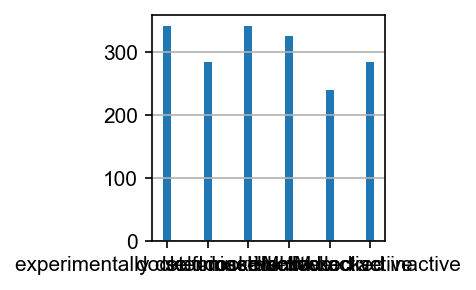

In [182]:
# plot displaying number of each entry type
structure_df['entry_type'].hist(align='mid', bins = np.arange(7) - 0.5, rwidth = 0.2).grid(axis='x')

In [183]:
structure_df['Function'].value_counts(dropna = False)

Antagonist           664
Inactive             570
Agonist              480
Inverse agonist       73
Agonist (partial)     33
Name: Function, dtype: int64

In [184]:
structure_df['entry_type'].value_counts().sort_index()

HM docked active                    240
HM docked inactive                  285
cross-docked active                 326
docked inactive                     285
experimentally determined active    342
self-docked active                  342
Name: entry_type, dtype: int64

In [185]:
structure_df['entry_type'].value_counts().sum() # number of entries in the dataset

1820

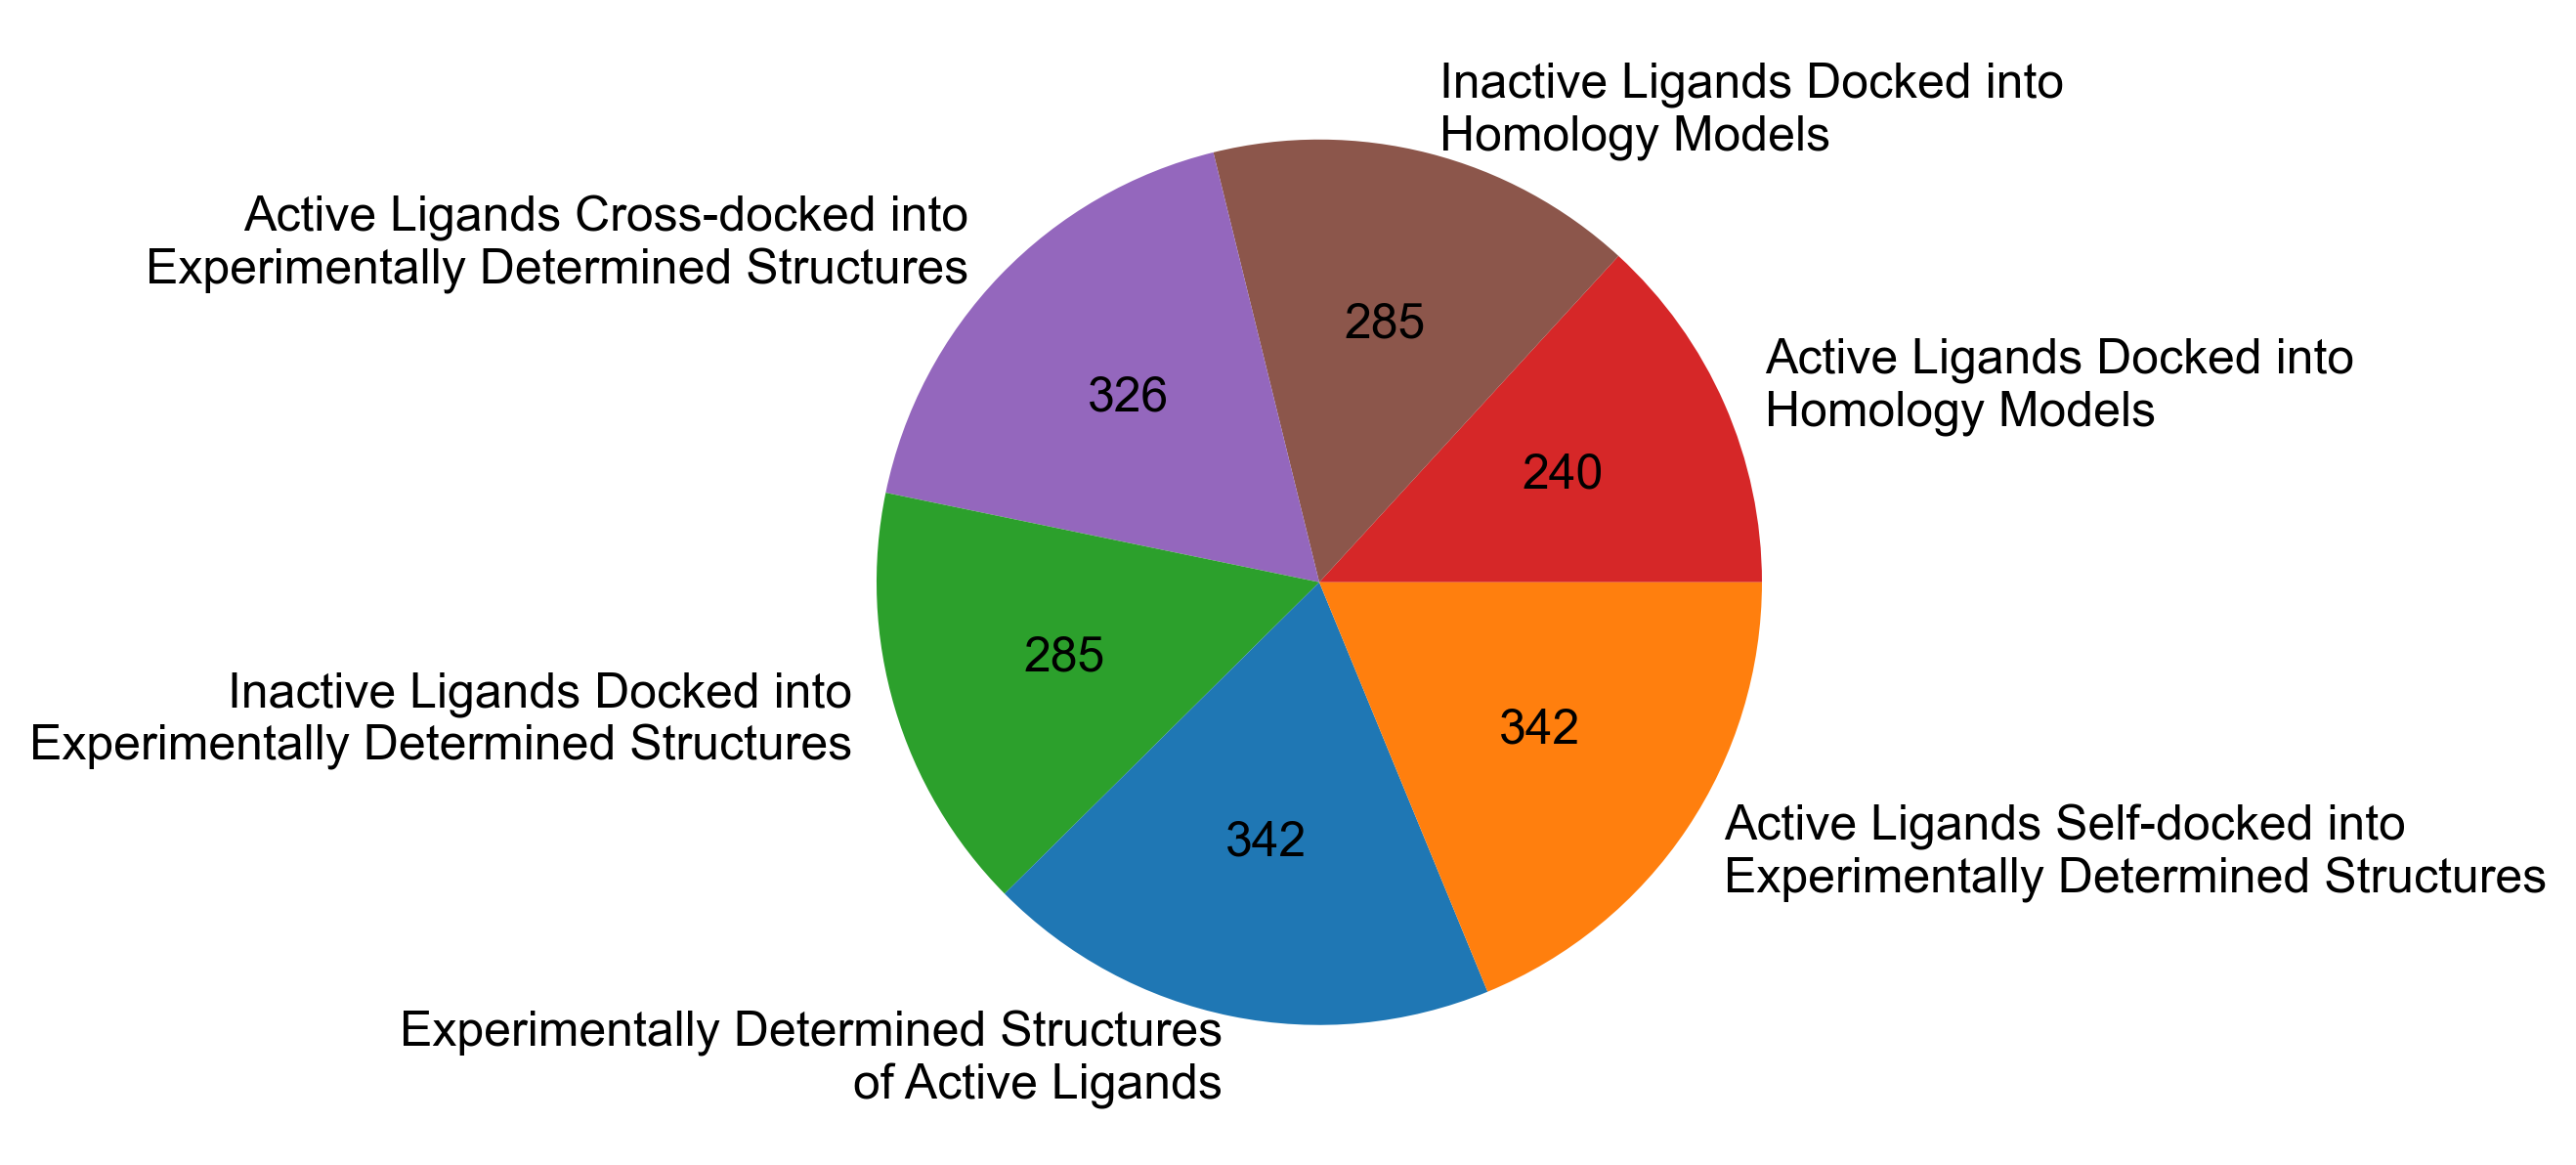

In [186]:
# pie chart

# color key
colors = {'experimentally determined active': 'tab:blue',
          'self-docked active': 'tab:orange',
          'cross-docked active': 'tab:purple',
          'docked inactive': 'tab:green',
          'HM docked active':'tab:red',
          'HM docked inactive':'tab:brown'
          
         }

import matplotlib.pyplot as plt
import numpy as np

plt.rcParams["figure.figsize"] = (5,5)
plt.rcParams['figure.dpi'] = 300
plt.rcParams["font.family"] = "arial"

values=structure_df['entry_type'].value_counts(dropna=True).sort_index()
vc = structure_df['entry_type'].value_counts(dropna=True).sort_index()
labels = vc.index

labels = ['Active Ligands Docked into\nHomology Models',
          'Inactive Ligands Docked into\nHomology Models',
          'Active Ligands Cross-docked into\nExperimentally Determined Structures',
          'Inactive Ligands Docked into\nExperimentally Determined Structures',
          'Experimentally Determined Structures\nof Active Ligands',
          'Active Ligands Self-docked into\nExperimentally Determined Structures'
         ]

# color key
colors = {'Experimentally Determined Structures\nof Active Ligands': 'tab:blue',
          'Active Ligands Self-docked into\nExperimentally Determined Structures': 'tab:orange',
          'Active Ligands Cross-docked into\nExperimentally Determined Structures': 'tab:purple',
          'Inactive Ligands Docked into\nExperimentally Determined Structures': 'tab:green',
          'Active Ligands Docked into\nHomology Models':'tab:red',
          'Inactive Ligands Docked into\nHomology Models':'tab:brown'
          
         }

plt.pie(list(structure_df['entry_type'].value_counts().sort_index()),
        labels = labels,
        autopct= lambda x: '{:.0f}'.format(x*values.sum()/100),
        colors = [colors[key] for key in labels],
        textprops={'fontsize': 12}
       )
plt.show() 

In [187]:
# drop entry_type field but save it for later
entry_types = structure_df['entry_type']
structure_df.drop(['entry_type'], axis = 1, inplace = True)

In [188]:
# simplification: replace partial agonist with agonist
structure_df = structure_df.replace('Agonist (partial)', 'Agonist')

In [189]:
actual_fxns = structure_df['Function']

In [190]:
actual_fxns.unique()

array(['Agonist', 'Antagonist', 'Inverse agonist', 'Inactive'],
      dtype=object)

In [191]:
structure_df

,PDBID,Function,1.31_intenergysum,1.31_inttype1,1.31_intenergy1,1.31_inttype2,1.31_intenergy2,1.35_intenergysum,1.35_inttype1,1.35_intenergy1,...,7.43_inttype1,7.43_intenergy1,7.43_inttype2,7.43_intenergy2,7.46_intenergysum,7.46_inttype1,7.46_intenergy1,7.46_inttype2,7.46_intenergy2,isHM
0,7EW2,Agonist,NaN,NaN,NaN,NaN,NaN,0.0,None,0.0,...,None,0.0,None,0.0,0.0,None,0.0,None,0.0,0
1,7EW3,Agonist,NaN,NaN,NaN,NaN,NaN,0.0,None,0.0,...,None,0.0,None,0.0,0.0,None,0.0,None,0.0,0
2,7EW4,Agonist,NaN,NaN,NaN,NaN,NaN,0.0,None,0.0,...,None,0.0,None,0.0,0.0,None,0.0,None,0.0,0
3,7EW1,Agonist,NaN,NaN,NaN,NaN,NaN,0.0,None,0.0,...,None,0.0,None,0.0,0.0,None,0.0,None,0.0,0
4,7LD4,Agonist,0.0,None,0.0,None,0.0,0.0,None,0.0,...,Hbond,-0.5,Hbond,-0.1,0.0,None,0.0,None,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1864,d3_nc,Inactive,NaN,NaN,NaN,NaN,NaN,0.0,None,0.0,...,Distance,0.0,None,0.0,0.0,None,0.0,None,0.0,1
1865,d3_nc,Inactive,NaN,NaN,NaN,NaN,NaN,0.0,None,0.0,...,Distance,0.0,Distance,0.0,0.0,None,0.0,None,0.0,1
1866,d3_nc,Inactive,NaN,NaN,NaN,NaN,NaN,0.0,None,0.0,...,None,0.0,None,0.0,0.0,None,0.0,None,0.0,1
1867,d3_nc,Inactive,NaN,NaN,NaN,NaN,NaN,0.0,None,0.0,...,None,0.0,None,0.0,0.0,None,0.0,None,0.0,1


## Label Encoding

In [192]:
# convert inttype columns to string and get unique interaction types
interaction_types = []
inttype_cols = [col for col in structure_df.columns if 'inttype' in col]

for col in inttype_cols:
    structure_df[col] = structure_df[col].astype(str)
    uniq_col_ints = list(structure_df[col].unique())
    for interaction in uniq_col_ints:
        if interaction not in interaction_types:
            interaction_types.append(interaction)

In [193]:
interaction_types

['nan', 'None', 'Hbond', 'Distance', 'Arene', 'Ionic', 'Covalent']

In [194]:
# custom encoding for inttypes
custom_mapping = {'nan' : 0, 'None' : 1, 'Hbond' : 2, 'Distance' : 3, 'Arene' : 4, 'Ionic' : 5, 'Covalent' : 6}

for col in inttype_cols:
    structure_df[col] = structure_df[col].map(custom_mapping)
    
# LabelEncoder for Function labels
le = LabelEncoder()

# get Function columns
cols = [col for col in structure_df.columns if 'Function' in col]

# loop though all columns and convert strings to categorical integer variable
for col in cols:
    structure_df[col] = le.fit_transform(structure_df[col])

In [195]:
structure_df

,PDBID,Function,1.31_intenergysum,1.31_inttype1,1.31_intenergy1,1.31_inttype2,1.31_intenergy2,1.35_intenergysum,1.35_inttype1,1.35_intenergy1,...,7.43_inttype1,7.43_intenergy1,7.43_inttype2,7.43_intenergy2,7.46_intenergysum,7.46_inttype1,7.46_intenergy1,7.46_inttype2,7.46_intenergy2,isHM
0,7EW2,0,NaN,0,NaN,0,NaN,0.0,1,0.0,...,1,0.0,1,0.0,0.0,1,0.0,1,0.0,0
1,7EW3,0,NaN,0,NaN,0,NaN,0.0,1,0.0,...,1,0.0,1,0.0,0.0,1,0.0,1,0.0,0
2,7EW4,0,NaN,0,NaN,0,NaN,0.0,1,0.0,...,1,0.0,1,0.0,0.0,1,0.0,1,0.0,0
3,7EW1,0,NaN,0,NaN,0,NaN,0.0,1,0.0,...,1,0.0,1,0.0,0.0,1,0.0,1,0.0,0
4,7LD4,0,0.0,1,0.0,1,0.0,0.0,1,0.0,...,2,-0.5,2,-0.1,0.0,1,0.0,1,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1864,d3_nc,2,NaN,0,NaN,0,NaN,0.0,1,0.0,...,3,0.0,1,0.0,0.0,1,0.0,1,0.0,1
1865,d3_nc,2,NaN,0,NaN,0,NaN,0.0,1,0.0,...,3,0.0,3,0.0,0.0,1,0.0,1,0.0,1
1866,d3_nc,2,NaN,0,NaN,0,NaN,0.0,1,0.0,...,1,0.0,1,0.0,0.0,1,0.0,1,0.0,1
1867,d3_nc,2,NaN,0,NaN,0,NaN,0.0,1,0.0,...,1,0.0,1,0.0,0.0,1,0.0,1,0.0,1


In [196]:
le.classes_

array(['Agonist', 'Antagonist', 'Inactive', 'Inverse agonist'],
      dtype=object)

In [197]:
# assign target classes to y
y = structure_df['Function']

# assign data to X
X = structure_df.drop(['Function'], axis = 1)

# create actual_state column with non-encoded states
X['actual_fxn'] = actual_fxns

In [198]:
X

,PDBID,1.31_intenergysum,1.31_inttype1,1.31_intenergy1,1.31_inttype2,1.31_intenergy2,1.35_intenergysum,1.35_inttype1,1.35_intenergy1,1.35_inttype2,...,7.43_intenergy1,7.43_inttype2,7.43_intenergy2,7.46_intenergysum,7.46_inttype1,7.46_intenergy1,7.46_inttype2,7.46_intenergy2,isHM,actual_fxn
0,7EW2,NaN,0,NaN,0,NaN,0.0,1,0.0,1,...,0.0,1,0.0,0.0,1,0.0,1,0.0,0,Agonist
1,7EW3,NaN,0,NaN,0,NaN,0.0,1,0.0,1,...,0.0,1,0.0,0.0,1,0.0,1,0.0,0,Agonist
2,7EW4,NaN,0,NaN,0,NaN,0.0,1,0.0,1,...,0.0,1,0.0,0.0,1,0.0,1,0.0,0,Agonist
3,7EW1,NaN,0,NaN,0,NaN,0.0,1,0.0,1,...,0.0,1,0.0,0.0,1,0.0,1,0.0,0,Agonist
4,7LD4,0.0,1,0.0,1,0.0,0.0,1,0.0,1,...,-0.5,2,-0.1,0.0,1,0.0,1,0.0,0,Agonist
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1864,d3_nc,NaN,0,NaN,0,NaN,0.0,1,0.0,1,...,0.0,1,0.0,0.0,1,0.0,1,0.0,1,Inactive
1865,d3_nc,NaN,0,NaN,0,NaN,0.0,1,0.0,1,...,0.0,3,0.0,0.0,1,0.0,1,0.0,1,Inactive
1866,d3_nc,NaN,0,NaN,0,NaN,0.0,1,0.0,1,...,0.0,1,0.0,0.0,1,0.0,1,0.0,1,Inactive
1867,d3_nc,NaN,0,NaN,0,NaN,0.0,1,0.0,1,...,0.0,1,0.0,0.0,1,0.0,1,0.0,1,Inactive


In [199]:
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

In [200]:
# function to drop columns from train_df and test_df that are all NaN in test_df
def drop_nan_cols_match(train_df, test_df):
    empty_cols = []
    train_cols = list(train_df.columns)
    test_cols = list(test_df.columns)
    
    for test_col in test_cols:
        if sum(test_df[test_col].isnull()) == test_df.shape[0]:
            empty_cols.append(test_col)

    train_df.drop(empty_cols, axis = 1, inplace = True)
    test_df.drop(empty_cols, axis = 1, inplace = True)

In [201]:
drop_nan_cols_match(X_train, X_test)

In [202]:
len(X_train.columns)

308

In [203]:
len(X_test.columns)

308

## Scaling/Imputing

In [204]:
def scale_impute(dataframe):
    # get colnames
    colnames = list(dataframe.drop(['actual_fxn', 'PDBID'], axis = 1).columns)
    fxns_df = dataframe['actual_fxn']
    #state_df.reset_index(inplace=True)
    df = dataframe.drop(['actual_fxn'], axis = 1)
    PDBIDs = list(dataframe['PDBID'])

    # impute data
    from sklearn.impute import SimpleImputer
    my_imputer = SimpleImputer()
    df_imputed = pd.DataFrame(my_imputer.fit_transform(df.iloc[:,1:]))

    # scale data
    scaler = StandardScaler()
    # scaler = MinMaxScaler()
    to_scale = [col for col in df_imputed.columns.values]
    scaler.fit(df_imputed[to_scale])

    # predict z-scores on the test set
    df_imputed[to_scale] = scaler.transform(df_imputed[to_scale]) 

    # #rename columns
    df_imputed.columns = colnames
    
    df_imputed.insert(0, 'PDBID',  PDBIDs)

    # display scaled values
    display(df_imputed)
    
    return(df_imputed, fxns_df)

In [205]:
(X_train_imputed, X_train_fxns) = scale_impute(X_train)
(X_test_imputed, X_test_fxns) = scale_impute(X_test)

,PDBID,1.31_intenergysum,1.31_inttype1,1.31_intenergy1,1.31_inttype2,1.31_intenergy2,1.35_intenergysum,1.35_inttype1,1.35_intenergy1,1.35_inttype2,...,7.43_inttype1,7.43_intenergy1,7.43_inttype2,7.43_intenergy2,7.46_intenergysum,7.46_inttype1,7.46_intenergy1,7.46_inttype2,7.46_intenergy2,isHM
0,7JVP,0.143326,0.580198,0.14116,0.554443,1.056144e-01,0.110788,-0.190786,0.103178,-0.127544,...,0.791870,0.127160,0.922086,0.073798,0.069329,-0.14273,0.06442,-0.140733,0.027885,-0.622250
1,6D27,0.000000,-1.026233,0.00000,-0.996407,-1.246373e-17,0.110788,-0.190786,0.103178,-0.127544,...,-1.141766,0.127160,-1.044550,0.073798,0.069329,-0.14273,0.06442,-0.140733,0.027885,-0.622250
2,beta2_nc,0.000000,-1.026233,0.00000,-0.996407,-1.246373e-17,0.110788,-0.190786,0.103178,-0.127544,...,-1.141766,0.127160,-1.044550,0.073798,0.069329,-0.14273,0.06442,-0.140733,0.027885,1.607071
3,beta1_bc_inactivehm,0.143326,0.580198,0.14116,0.554443,1.056144e-01,0.110788,-0.190786,0.103178,-0.127544,...,-0.174948,-0.136429,0.922086,0.073798,0.069329,-0.14273,0.06442,-0.140733,0.027885,1.607071
4,6PT0,0.143326,0.580198,0.14116,0.554443,1.056144e-01,0.110788,-0.190786,0.103178,-0.127544,...,-1.141766,0.127160,-1.044550,0.073798,0.069329,-0.14273,0.06442,-0.140733,0.027885,-0.622250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1360,6TP6,0.000000,-1.026233,0.00000,-0.996407,-1.246373e-17,0.110788,-0.190786,0.103178,-0.127544,...,0.791870,0.127160,0.922086,0.073798,0.069329,-0.14273,0.06442,-0.140733,0.027885,-0.622250
1361,beta2_nc,0.000000,-1.026233,0.00000,-0.996407,-1.246373e-17,0.110788,-0.190786,0.103178,-0.127544,...,-1.141766,0.127160,-1.044550,0.073798,0.069329,-0.14273,0.06442,-0.140733,0.027885,1.607071
1362,5WIU,0.000000,-1.026233,0.00000,-0.996407,-1.246373e-17,0.110788,-0.190786,0.103178,-0.127544,...,0.791870,0.127160,0.922086,0.073798,0.069329,-0.14273,0.06442,-0.140733,0.027885,-0.622250
1363,4PY0,0.143326,0.580198,0.14116,0.554443,1.056144e-01,0.110788,-0.190786,0.103178,-0.127544,...,-1.141766,0.127160,-1.044550,0.073798,0.069329,-0.14273,0.06442,-0.140733,0.027885,-0.622250


,PDBID,1.31_intenergysum,1.31_inttype1,1.31_intenergy1,1.31_inttype2,1.31_intenergy2,1.35_intenergysum,1.35_inttype1,1.35_intenergy1,1.35_inttype2,...,7.43_inttype1,7.43_intenergy1,7.43_inttype2,7.43_intenergy2,7.46_intenergysum,7.46_inttype1,7.46_intenergy1,7.46_inttype2,7.46_intenergy2,isHM
0,6PS6,0.183856,0.550384,1.737708e-01,0.499848,1.418905e-01,1.008556e-01,-0.171976,9.787630e-02,-0.093204,...,0.756570,0.105798,0.966758,0.12455,0.081556,-0.146215,0.066768,-0.119144,0.05282,-0.680458
1,5C1M,0.183856,0.550384,1.737708e-01,0.499848,1.418905e-01,1.008556e-01,-0.171976,9.787630e-02,-0.093204,...,0.756570,0.105798,0.966758,0.12455,0.081556,-0.146215,0.066768,-0.119144,0.05282,-0.680458
2,A2A,0.000000,-1.014771,2.380351e-17,-0.948756,4.283860e-17,1.008556e-01,-0.171976,9.787630e-02,-0.093204,...,0.756570,0.105798,-1.001363,0.12455,0.081556,-0.146215,0.066768,-0.119144,0.05282,-0.680458
3,3NYA,0.000000,-1.014771,2.380351e-17,-0.948756,4.283860e-17,1.008556e-01,-0.171976,9.787630e-02,-0.093204,...,0.756570,0.105798,0.966758,0.12455,0.081556,-0.146215,0.066768,-0.119144,0.05282,-0.680458
4,D3,0.000000,-1.014771,2.380351e-17,-0.948756,4.283860e-17,1.161821e-17,-1.706269,2.577144e-17,-1.937017,...,0.756570,0.105798,0.966758,0.12455,0.081556,-0.146215,0.066768,-0.119144,0.05282,-0.680458
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
450,d3_bc_inactivehm,0.000000,-1.014771,2.380351e-17,-0.948756,4.283860e-17,1.008556e-01,-0.171976,9.787630e-02,-0.093204,...,-1.099167,0.105798,-1.001363,0.12455,0.081556,-0.146215,0.066768,-0.119144,0.05282,1.469599
451,7V3Z,0.183856,0.550384,1.737708e-01,0.499848,1.418905e-01,1.008556e-01,-0.171976,9.787630e-02,-0.093204,...,-1.099167,0.105798,-1.001363,0.12455,0.081556,-0.146215,0.066768,-0.119144,0.05282,-0.680458
452,beta2_nc,0.000000,-1.014771,2.380351e-17,-0.948756,4.283860e-17,1.008556e-01,-0.171976,9.787630e-02,-0.093204,...,-1.099167,0.105798,-1.001363,0.12455,0.081556,-0.146215,0.066768,-0.119144,0.05282,1.469599
453,3SN6,0.183856,0.550384,1.737708e-01,0.499848,1.418905e-01,1.008556e-01,-0.171976,9.787630e-02,-0.093204,...,0.756570,0.105798,0.966758,0.12455,0.081556,-0.146215,0.066768,-0.119144,0.05282,-0.680458


<AxesSubplot:>

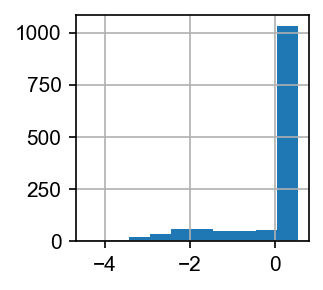

In [206]:
plt.rcParams["figure.figsize"] = (2,2)
plt.rcParams['figure.dpi'] = 150
X_train_imputed['3.32_intenergysum'].hist()

In [207]:
X_train_fxns = X_train_fxns.reset_index()
X_train_fxns.drop(['index'], axis = 1, inplace = True)

X_test_fxns = X_test_fxns.reset_index()
X_test_fxns.drop(['index'], axis = 1, inplace = True)

## Model Development

In [208]:
def train_test_predict(train_df, train_y, test_df, test_y, encoder):
    #Import Random Forest Model
    from sklearn.ensemble import RandomForestClassifier

    #Create a Gaussian Classifier
    clf=RandomForestClassifier(n_estimators=500,
                               random_state=1,
                               class_weight = 'balanced_subsample',
                               bootstrap = False,
                               max_depth = 30,
                               max_features = 'auto',
                               min_samples_leaf = 1,
                               min_samples_split = 2,
                               n_jobs = -1
                              )

    #Train the model using the training sets y_pred=clf.predict(X_test)
    clf.fit(train_df.iloc[:, 1:], train_y)
    
    # print classes able to be predicted by the model (check 8/1/22)
    # print(clf.classes_)
    
    from sklearn.ensemble import RandomForestClassifier
    from sklearn.model_selection import cross_val_score, KFold
    import numpy as np

    # cross-validation
    scores = cross_val_score(clf, train_df.iloc[:, 1:], train_y, cv=5)
    print("Mean cross-validation score: %.2f" % scores.mean())

    # k-fold CV
    kfold = KFold(n_splits=10, shuffle=True, random_state = 1)
    kf_cv_scores = cross_val_score(clf, train_df.iloc[:, 1:], train_y, cv=kfold)
    print("K-fold CV average score: %.2f" % kf_cv_scores.mean())
    
    # test set predictions
    y_pred = clf.predict(test_df.iloc[:, 1:])
    
    # print unique classes predicted on the testing data (check 8/1/22)
    # print(np.unique(y_pred))

    #Import scikit-learn metrics module for accuracy calculation
    from sklearn import metrics

    # reverse label encoding
    y_pred_actual = encoder.inverse_transform(y_pred)
    y_test_actual = encoder.inverse_transform(test_y)

    data = {'y_Actual':    y_test_actual,
            'y_Predicted': y_pred_actual
            }

    df = pd.DataFrame(data, columns=['y_Actual','y_Predicted'])

    confusion_matrix = pd.crosstab(df['y_Actual'], df['y_Predicted'], rownames=['Actual'], colnames=['Predicted'])
    print ('\n', confusion_matrix, '\n')
    
     # Model Accuracy, how often is the classifier correct?
    acc = metrics.accuracy_score(test_y, y_pred)
    precision = metrics.precision_score(test_y, y_pred, average = 'weighted', labels=np.unique(y_pred))
    recall = metrics.recall_score(test_y, y_pred, average = 'weighted', labels=np.unique(y_pred))
    print("Accuracy:","{:.2f}".format(acc))
    print("Precision:","{:.2f}".format(precision))
    print("Recall:","{:.2f}".format(recall), '\n')
    return y_pred_actual, y_test_actual, clf

In [209]:
y_pred_actual, y_test_actual, rf_model = train_test_predict(X_train_imputed, y_train, X_test_imputed, y_test, le)

Mean cross-validation score: 0.79
K-fold CV average score: 0.79

 Predicted        Agonist  Antagonist  Inactive  Inverse agonist
Actual                                                         
Agonist               97          12        20                0
Antagonist            18         125        35                1
Inactive               8           6       116                0
Inverse agonist        2           6         0                9 

Accuracy: 0.76
Precision: 0.78
Recall: 0.76 



In [210]:
pd.options.mode.chained_assignment = None

# X_test['function'] = y_test_actual
X_test['pred_function'] = y_pred_actual
X_test['entry_type'] = entry_types

X_train['entry_type'] = entry_types

In [213]:
X_test_ED = X_test.loc[\
    (X_test['entry_type'] == 'experimentally determined active')\
    |(X_test['entry_type'] == 'docked inactive')\
    |(X_test['entry_type'] == 'self-docked active')\
    |(X_test['entry_type'] == 'cross-docked active')\
    ]

# confusion matrix and classification metrics for ED merged binder dataset
confusion_matrix = pd.crosstab(X_test_ED['actual_fxn'], X_test_ED['pred_function'], rownames=['Actual'], colnames=['Predicted'])
print ('\n', confusion_matrix, '\n')

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

test_y = X_test_ED['actual_fxn']
y_pred = X_test_ED['pred_function']
acc = metrics.accuracy_score(test_y, y_pred)
precision = metrics.precision_score(test_y, y_pred, average = 'weighted', labels=np.unique(y_pred))
recall = metrics.recall_score(test_y, y_pred, average = 'weighted', labels=np.unique(y_pred))
print("Accuracy:","{:.2f}".format(acc))
print("Precision:","{:.2f}".format(precision))
print("Recall:","{:.2f}".format(recall), '\n')


 Predicted        Agonist  Antagonist  Inactive  Inverse agonist
Actual                                                         
Agonist               85           9         1                0
Antagonist            11         118         3                1
Inactive               4           1        61                0
Inverse agonist        2           6         0                9 

Accuracy: 0.88
Precision: 0.88
Recall: 0.88 



In [214]:
X_test_HM = X_test.loc[(X_test['entry_type'] == 'HM docked active') | (X_test['entry_type'] == 'HM docked inactive')]

# confusion matrix and classification metrics for HM merged binder dataset
confusion_matrix = pd.crosstab(X_test_HM['actual_fxn'], X_test_HM['pred_function'], rownames=['Actual'], colnames=['Predicted'])
print ('\n', confusion_matrix, '\n')


#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

test_y = X_test_HM['actual_fxn']
y_pred = X_test_HM['pred_function']
acc = metrics.accuracy_score(test_y, y_pred)
precision = metrics.precision_score(test_y, y_pred, average = 'weighted', labels=np.unique(y_pred))
recall = metrics.recall_score(test_y, y_pred, average = 'weighted', labels=np.unique(y_pred))
print("Accuracy:","{:.2f}".format(acc))
print("Precision:","{:.2f}".format(precision))
print("Recall:","{:.2f}".format(recall), '\n')


 Predicted   Agonist  Antagonist  Inactive
Actual                                   
Agonist          12           3        19
Antagonist        7           7        32
Inactive          4           5        55 

Accuracy: 0.51
Precision: 0.50
Recall: 0.51 



In [215]:
X_train['entry_type'].value_counts().sort_index()

HM docked active                    160
HM docked inactive                  221
cross-docked active                 247
docked inactive                     219
experimentally determined active    252
self-docked active                  266
Name: entry_type, dtype: int64

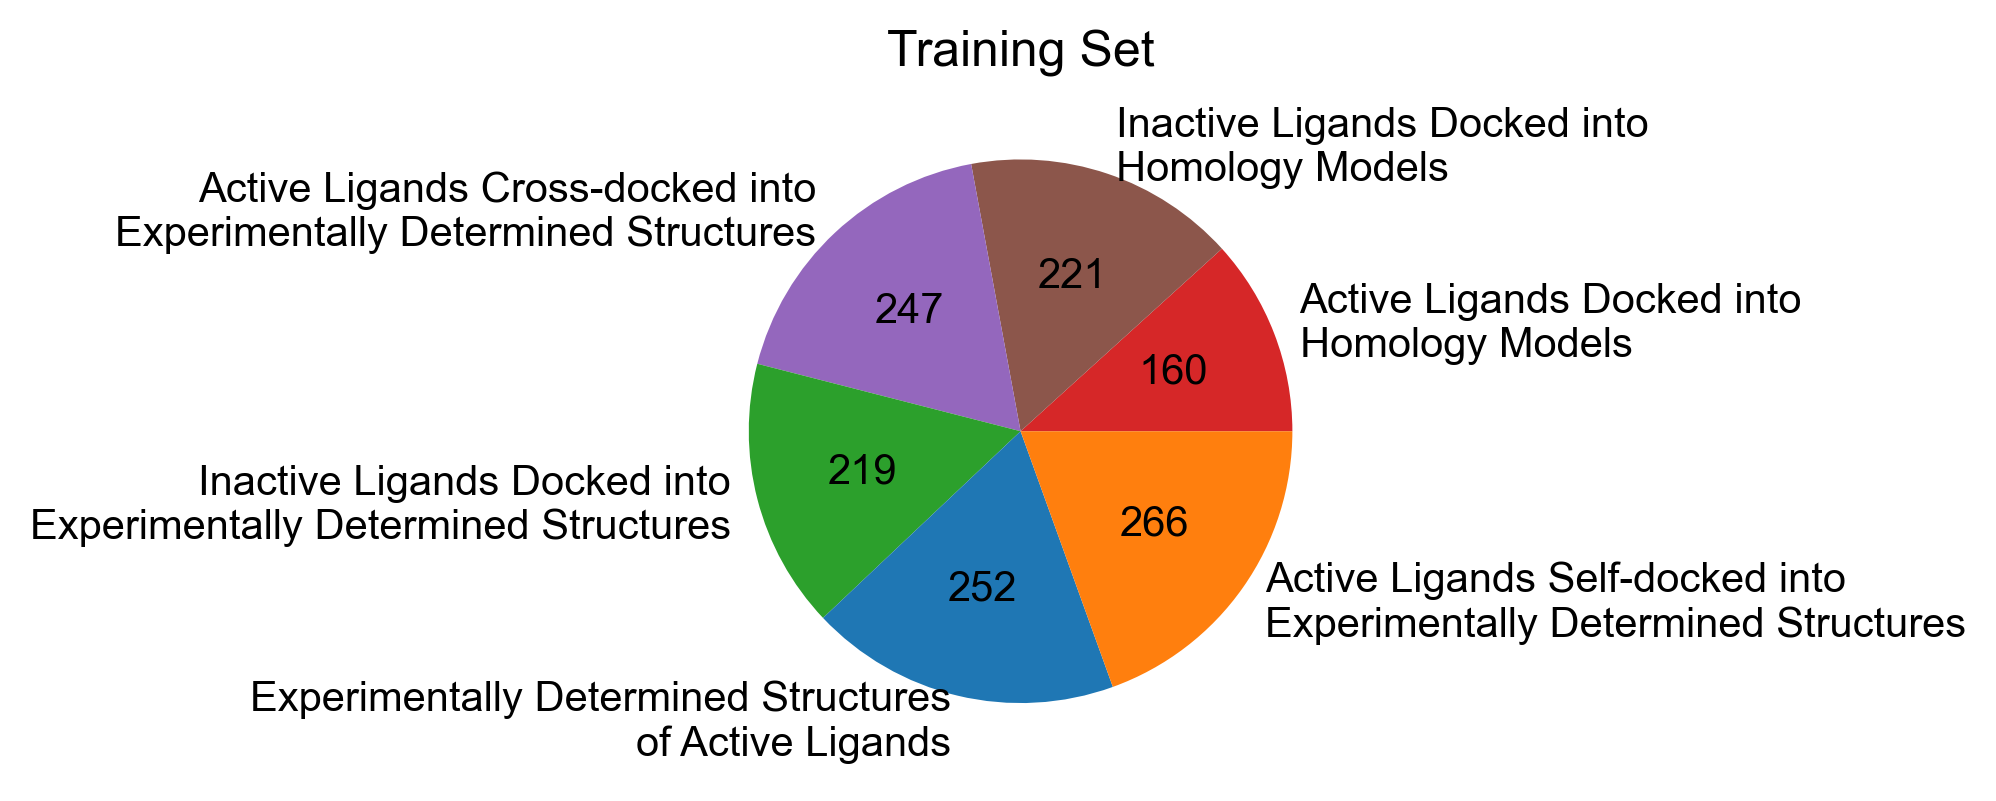

In [216]:
# plot to show training set size
plt.rcParams["figure.figsize"] = (3,3)
plt.rcParams['figure.dpi'] = 300
plt.rcParams["font.family"] = "arial"

values=X_train['entry_type'].value_counts(dropna=True).sort_index()
vc = X_train['entry_type'].value_counts().sort_index()
labels = vc.index

labels = ['Active Ligands Docked into\nHomology Models',
          'Inactive Ligands Docked into\nHomology Models',
          'Active Ligands Cross-docked into\nExperimentally Determined Structures',
          'Inactive Ligands Docked into\nExperimentally Determined Structures',
          'Experimentally Determined Structures\nof Active Ligands',
          'Active Ligands Self-docked into\nExperimentally Determined Structures'
         ]

# color key
colors = {'Experimentally Determined Structures\nof Active Ligands': 'tab:blue',
          'Active Ligands Self-docked into\nExperimentally Determined Structures': 'tab:orange',
          'Active Ligands Cross-docked into\nExperimentally Determined Structures': 'tab:purple',
          'Inactive Ligands Docked into\nExperimentally Determined Structures': 'tab:green',
          'Active Ligands Docked into\nHomology Models':'tab:red',
          'Inactive Ligands Docked into\nHomology Models':'tab:brown'
          
         }

plt.pie(vc,
        labels = labels,
        autopct= lambda x: '{:.0f}'.format(x*values.sum()/100),
        colors = [colors[key] for key in labels]
       )
plt.title('Training Set')
plt.show() 

In [217]:
X_test['entry_type'].value_counts().sort_index()

HM docked active                    80
HM docked inactive                  64
cross-docked active                 79
docked inactive                     66
experimentally determined active    90
self-docked active                  76
Name: entry_type, dtype: int64

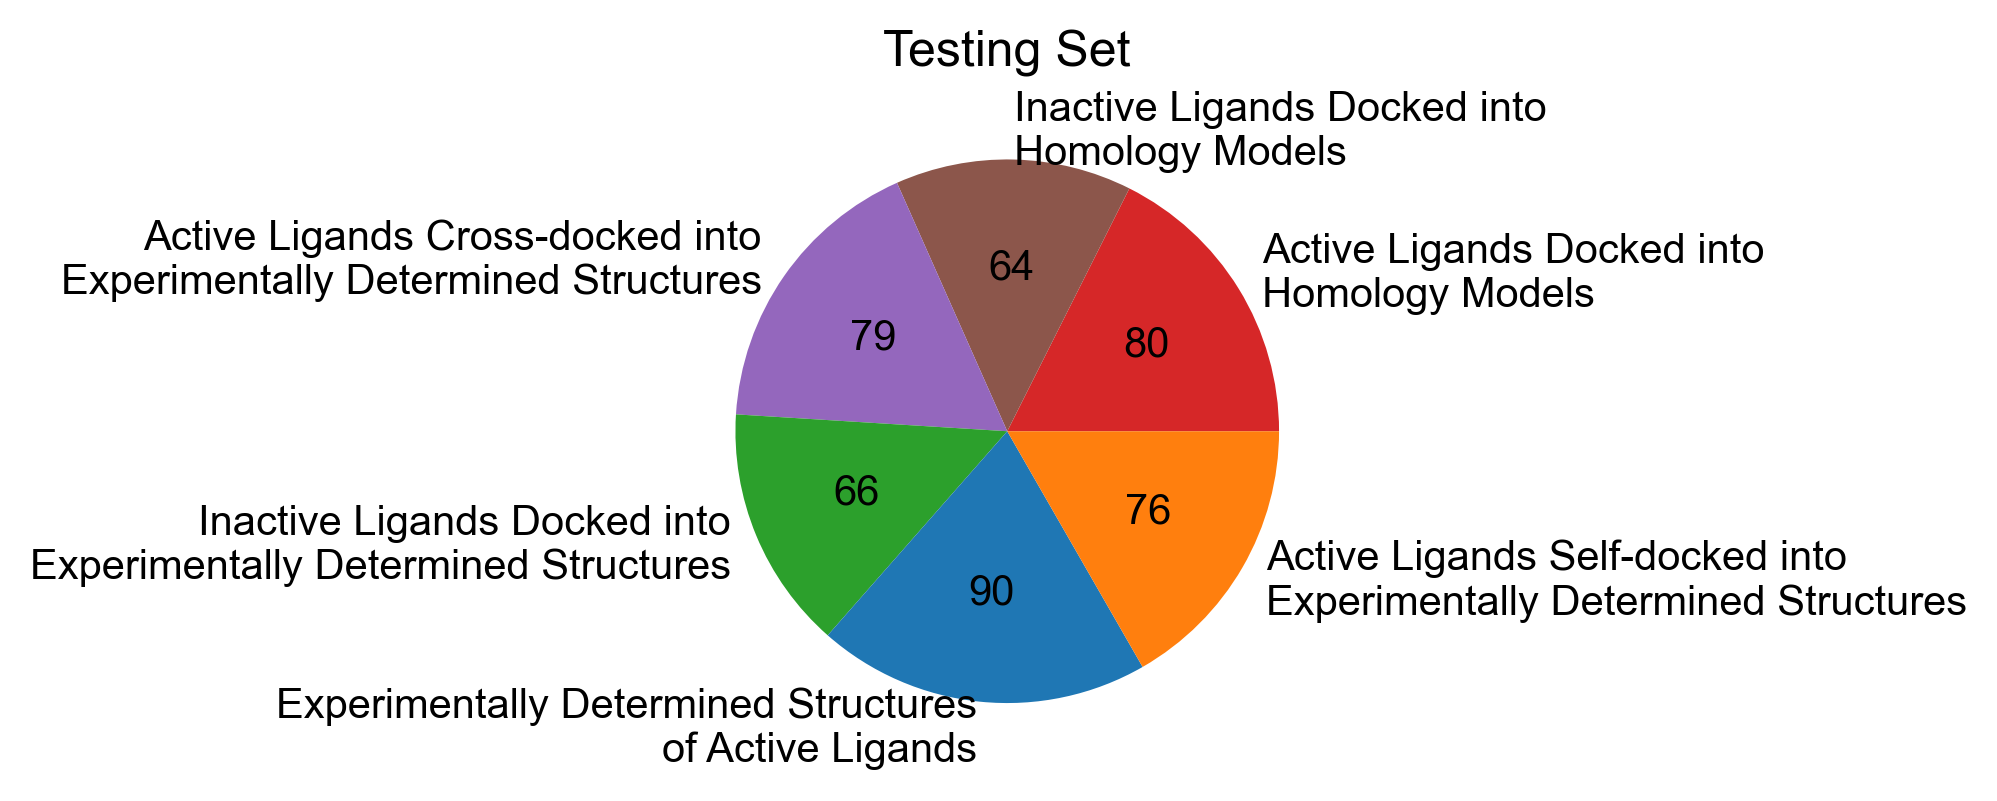

In [218]:
# plot to show testing set size
plt.rcParams["figure.figsize"] = (3,3)
plt.rcParams['figure.dpi'] = 300
plt.rcParams["font.family"] = "arial"

values=X_test['entry_type'].value_counts(dropna=True).sort_index()
vc = X_test['entry_type'].value_counts().sort_index()
labels = vc.index

labels = ['Active Ligands Docked into\nHomology Models',
          'Inactive Ligands Docked into\nHomology Models',
          'Active Ligands Cross-docked into\nExperimentally Determined Structures',
          'Inactive Ligands Docked into\nExperimentally Determined Structures',
          'Experimentally Determined Structures\nof Active Ligands',
          'Active Ligands Self-docked into\nExperimentally Determined Structures'
         ]

# color key
colors = {'Experimentally Determined Structures\nof Active Ligands': 'tab:blue',
          'Active Ligands Self-docked into\nExperimentally Determined Structures': 'tab:orange',
          'Active Ligands Cross-docked into\nExperimentally Determined Structures': 'tab:purple',
          'Inactive Ligands Docked into\nExperimentally Determined Structures': 'tab:green',
          'Active Ligands Docked into\nHomology Models':'tab:red',
          'Inactive Ligands Docked into\nHomology Models':'tab:brown'
          
         }

plt.pie(vc,
        labels = labels,
        autopct= lambda x: '{:.0f}'.format(x*values.sum()/100),
        colors = [colors[key] for key in labels],
       )
plt.title('Testing Set')
plt.show() 

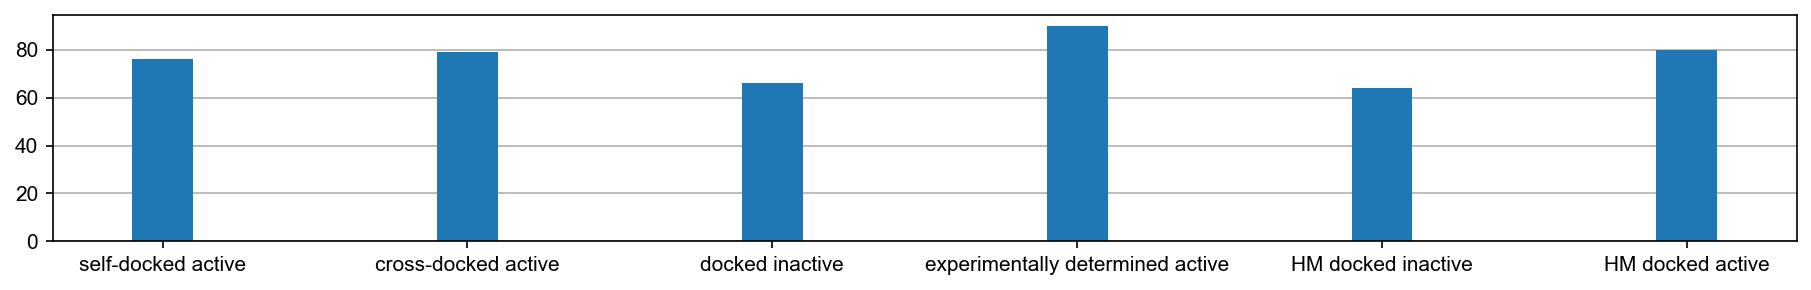

In [219]:
plt.rcParams['axes.axisbelow'] = True
plt.rcParams["figure.figsize"] = (15,2)
plt.rcParams['figure.dpi'] = 150
X_test['entry_type'].hist(align='mid', bins = np.arange(7) - 0.5, rwidth = 0.2).grid(axis='x')

In [220]:
# get incorrect predictions in test set

entries = []
for i in range(len(X_test)):
    if X_test['actual_fxn'].iloc[i] != X_test['pred_function'].iloc[i]:
        entries.append(i)

wrong_preds_df = X_test.iloc[entries,:]

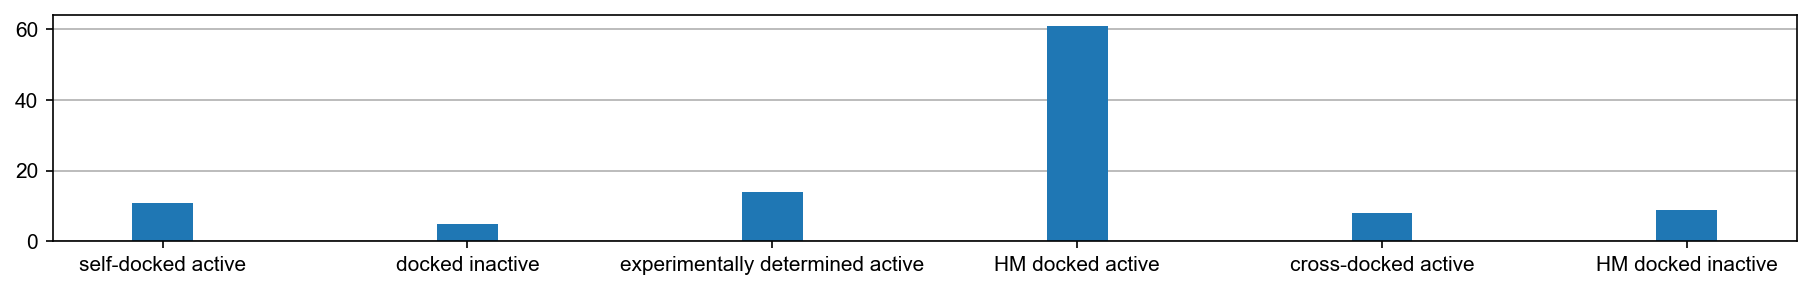

In [221]:
# histogram denoting which entry type is most frequently predicted incorrectly
wrong_preds_df['entry_type'].hist(align='mid', bins = np.arange(7) - 0.5, rwidth = 0.2).grid(axis='x')

In [222]:
# print('Entry Type\tIncorrect\tNum. Entries\tPercent Incorrect\tPercent Correct')

entry_types_uniq = []
incorrects = []
num_entries = []
percent_incorrect = []
percent_correct = []
for x in ['experimentally determined active', 'docked inactive', 'self-docked active', 'cross-docked active', 'HM docked active', 'HM docked inactive']:
    num_test_entries = len(X_test.loc[X_test['entry_type'] == x])
    incorrect_test_entries = len(wrong_preds_df.loc[X_test['entry_type'] == x])
    percent = (incorrect_test_entries / num_test_entries) * 100
    
    # append each value to lists to be used for df construction
    entry_types_uniq.append(x)
    incorrects.append(incorrect_test_entries)
    num_entries.append(num_test_entries)
    percent_incorrect.append("{:.2f}".format(percent))
    percent_correct.append("{:.2f}".format(100 - percent))
#     print(x, '\t', incorrect_test_entries, '\t\t', num_test_entries, '\t\t', percent, '\t', 100 - percent)

# dataframe construction/display
results_df = pd.DataFrame({
    'Entry Type': entry_types_uniq,
    'Incorrect': incorrects,
    'Num. Entries' : num_entries,
    'Percent Incorrect' : percent_incorrect,
    'Percent Correct' : percent_correct
})

display(results_df)

,Entry Type,Incorrect,Num. Entries,Percent Incorrect,Percent Correct
0,experimentally determined active,14,90,15.56,84.44
1,docked inactive,5,66,7.58,92.42
2,self-docked active,11,76,14.47,85.53
3,cross-docked active,8,79,10.13,89.87
4,HM docked active,61,80,76.25,23.75
5,HM docked inactive,9,64,14.06,85.94


In [223]:
X_test_mergedbinders = X_test.copy()

## Merging Binders

In [224]:
# remap actual/predicted values so that agonist/inv. agonist/antagonists are just considered as actives
X_test_mergedbinders['actual_fxn'] = X_test_mergedbinders['actual_fxn'].map({'Antagonist': 'active', 'Agonist': 'active', 'Inverse agonist' : 'active', 'Inactive' : 'inactive'})
X_test_mergedbinders['pred_function'] = X_test_mergedbinders['pred_function'].map({'Antagonist': 'active', 'Agonist': 'active', 'Inverse agonist' : 'active', 'Inactive' : 'inactive'})

In [225]:
# get incorrect predictions in test set w/ merged binders
entries = []
for i in range(len(X_test)):
    if X_test_mergedbinders['actual_fxn'].iloc[i] != X_test_mergedbinders['pred_function'].iloc[i]:
        entries.append(i)

wrong_preds_df_MB = X_test_mergedbinders.iloc[entries,:]

# table for incorrect predictions after merging binders
entry_types_uniq = []
incorrects = []
num_entries = []
percent_incorrect = []
percent_correct = []
for x in ['experimentally determined active', 'docked inactive', 'self-docked active', 'cross-docked active', 'HM docked active', 'HM docked inactive']:
    num_test_entries = len(X_test_mergedbinders.loc[X_test_mergedbinders['entry_type'] == x])
    incorrect_test_entries = len(wrong_preds_df_MB.loc[X_test_mergedbinders['entry_type'] == x])
    percent = (incorrect_test_entries / num_test_entries) * 100
    
    # append each value to lists to be used for df construction
    entry_types_uniq.append(x)
    incorrects.append(incorrect_test_entries)
    num_entries.append(num_test_entries)
    percent_incorrect.append("{:.2f}".format(percent))
    percent_correct.append("{:.2f}".format(100 - percent))
#     print(x, '\t', incorrect_test_entries, '\t\t', num_test_entries, '\t\t', percent, '\t', 100 - percent)

# dataframe construction/display
results_df = pd.DataFrame({
    'Entry Type': entry_types_uniq,
    'Incorrect': incorrects,
    'Num. Entries' : num_entries,
    'Percent Incorrect' : percent_incorrect,
    'Percent Correct' : percent_correct
})

display(results_df)

,Entry Type,Incorrect,Num. Entries,Percent Incorrect,Percent Correct
0,experimentally determined active,1,90,1.11,98.89
1,docked inactive,5,66,7.58,92.42
2,self-docked active,0,76,0.00,100.00
3,cross-docked active,3,79,3.80,96.20
4,HM docked active,51,80,63.75,36.25
5,HM docked inactive,9,64,14.06,85.94


In [226]:
# confusion matrix and classification metrics for merged binder dataset
confusion_matrix = pd.crosstab(X_test_mergedbinders['actual_fxn'], X_test_mergedbinders['pred_function'], rownames=['Actual'], colnames=['Predicted'])
print ('\n', confusion_matrix, '\n')
act_binders = confusion_matrix.iloc[0,0]
pred_binders = confusion_matrix.iloc[0,0] + confusion_matrix.iloc[1,0]
print('Binder hit rate:', "{:.2f}".format(100 * (act_binders/pred_binders)))

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

test_y = X_test_mergedbinders['actual_fxn']
y_pred = X_test_mergedbinders['pred_function']
acc = metrics.accuracy_score(test_y, y_pred)
precision = metrics.precision_score(test_y, y_pred, average = 'weighted', labels=np.unique(y_pred))
recall = metrics.recall_score(test_y, y_pred, average = 'weighted', labels=np.unique(y_pred))
print("Accuracy:","{:.2f}".format(acc))
print("Precision:","{:.2f}".format(precision))
print("Recall:","{:.2f}".format(recall), '\n')


 Predicted  active  inactive
Actual                     
active        270        55
inactive       14       116 

Binder hit rate: 95.07
Accuracy: 0.85
Precision: 0.87
Recall: 0.85 



In [227]:
X_test_mergedbinders_ED = X_test_mergedbinders.loc[\
    (X_test_mergedbinders['entry_type'] == 'experimentally determined active')\
    |(X_test_mergedbinders['entry_type'] == 'docked inactive')\
    |(X_test_mergedbinders['entry_type'] == 'self-docked active')\
    |(X_test_mergedbinders['entry_type'] == 'cross-docked active')\
    ]

# confusion matrix and classification metrics for ED merged binder dataset
confusion_matrix = pd.crosstab(X_test_mergedbinders_ED['actual_fxn'], X_test_mergedbinders_ED['pred_function'], rownames=['Actual'], colnames=['Predicted'])
print ('\n', confusion_matrix, '\n')
act_binders = confusion_matrix.iloc[0,0]
pred_binders = confusion_matrix.iloc[0,0] + confusion_matrix.iloc[1,0]
print('Binder hit rate:', "{:.2f}".format(100 * (act_binders/pred_binders)))

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

test_y = X_test_mergedbinders_ED['actual_fxn']
y_pred = X_test_mergedbinders_ED['pred_function']
acc = metrics.accuracy_score(test_y, y_pred)
precision = metrics.precision_score(test_y, y_pred, average = 'weighted', labels=np.unique(y_pred))
recall = metrics.recall_score(test_y, y_pred, average = 'weighted', labels=np.unique(y_pred))
print("Accuracy:","{:.2f}".format(acc))
print("Precision:","{:.2f}".format(precision))
print("Recall:","{:.2f}".format(recall), '\n')


 Predicted  active  inactive
Actual                     
active        241         4
inactive        5        61 

Binder hit rate: 97.97
Accuracy: 0.97
Precision: 0.97
Recall: 0.97 



In [228]:
X_test_mergedbinders_HM = X_test_mergedbinders.loc[(X_test_mergedbinders['entry_type'] == 'HM docked active') | (X_test_mergedbinders['entry_type'] == 'HM docked inactive')]

# confusion matrix and classification metrics for HM merged binder dataset
confusion_matrix = pd.crosstab(X_test_mergedbinders_HM['actual_fxn'], X_test_mergedbinders_HM['pred_function'], rownames=['Actual'], colnames=['Predicted'])
print ('\n', confusion_matrix, '\n')
act_binders = confusion_matrix.iloc[0,0]
pred_binders = confusion_matrix.iloc[0,0] + confusion_matrix.iloc[1,0]
print('Binder hit rate:', "{:.2f}".format(100 * (act_binders/pred_binders)))

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

test_y = X_test_mergedbinders_HM['actual_fxn']
y_pred = X_test_mergedbinders_HM['pred_function']
acc = metrics.accuracy_score(test_y, y_pred)
precision = metrics.precision_score(test_y, y_pred, average = 'weighted', labels=np.unique(y_pred))
recall = metrics.recall_score(test_y, y_pred, average = 'weighted', labels=np.unique(y_pred))
print("Accuracy:","{:.2f}".format(acc))
print("Precision:","{:.2f}".format(precision))
print("Recall:","{:.2f}".format(recall), '\n')


 Predicted  active  inactive
Actual                     
active         29        51
inactive        9        55 

Binder hit rate: 76.32
Accuracy: 0.58
Precision: 0.65
Recall: 0.58 



In [229]:
X_test_ED_active = X_test[X_test['entry_type'] == 'experimentally determined active']
X_test_docked_inactive = X_test[X_test['entry_type'] == 'docked inactive']
X_test_self_docked_active = X_test[X_test['entry_type'] == 'self-docked active']
X_test_cross_docked_active = X_test[X_test['entry_type'] == 'cross-docked active']
X_test_HM_docked_active = X_test[X_test['entry_type'] == 'HM docked active']
X_test_HM_docked_inactive = X_test[X_test['entry_type'] == 'HM docked inactive']

In [230]:
# get incorrect predictions of actives
X_test_ED_active_incorrect_preds = X_test_ED_active.loc[~(X_test_ED_active['actual_fxn'] == X_test_ED_active['pred_function'])]
X_test_self_docked_active_incorrect_preds = X_test_self_docked_active.loc[~(X_test_self_docked_active['actual_fxn'] == X_test_self_docked_active['pred_function'])]
X_test_cross_docked_active_incorrect_preds = X_test_cross_docked_active.loc[~(X_test_cross_docked_active['actual_fxn'] == X_test_cross_docked_active['pred_function'])]
X_test_HM_docked_active_incorrect_preds = X_test_HM_docked_active.loc[~(X_test_HM_docked_active['actual_fxn'] == X_test_HM_docked_active['pred_function'])]

In [231]:
# CM for incorrect predictions for ED actives
pd.crosstab(X_test_ED_active_incorrect_preds['actual_fxn'], X_test_ED_active_incorrect_preds['pred_function'], rownames=['Actual'], colnames=['Predicted'])

Predicted,Agonist,Antagonist,Inactive
Actual,,,
Agonist,0,3,1
Antagonist,6,0,0
Inverse agonist,1,3,0


In [232]:
# CM for incorrect predictions for HM docked actives
pd.crosstab(X_test_HM_docked_active_incorrect_preds['actual_fxn'], X_test_HM_docked_active_incorrect_preds['pred_function'], rownames=['Actual'], colnames=['Predicted'])

Predicted,Agonist,Antagonist,Inactive
Actual,,,
Agonist,0,3,19
Antagonist,7,0,32


In [233]:
# CM for all predictions for HM docked actives
pd.crosstab(X_test_HM_docked_active['actual_fxn'], X_test_HM_docked_active['pred_function'], rownames=['Actual'], colnames=['Predicted'])

Predicted,Agonist,Antagonist,Inactive
Actual,,,
Agonist,12,3,19
Antagonist,7,7,32


In [234]:
# CM for all predictions for HM docked inactives
pd.crosstab(X_test_HM_docked_inactive['actual_fxn'], X_test_HM_docked_inactive['pred_function'], rownames=['Actual'], colnames=['Predicted'])

Predicted,Agonist,Antagonist,Inactive
Actual,,,
Inactive,4,5,55


## Dump Model and Label Encoder

In [235]:
import joblib
joblib.dump(rf_model, 'LFP_rf_model.pkl') 

['LFP_rf_model.pkl']

In [236]:
joblib.dump(le, 'LFP_label_encoder.pkl')

['LFP_label_encoder.pkl']

## GridSearch for best RF parameters

In [2675]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

In [1600]:
params_to_test = {
    'n_estimators':[100, 250, 500, 750, 1000],
    'max_depth': [10, 20, 30, 40, 50, None],
    'bootstrap': [True, False],
    'max_features': ['auto', 'sqrt'],
    'min_samples_leaf': [1, 2, 4],
    'min_samples_split': [2, 5, 10],
    'class_weight' : ['balanced_subsample'],
}

In [1601]:
rf_model = RandomForestClassifier(random_state=1, n_jobs = -1)

grid_search = GridSearchCV(rf_model, param_grid=params_to_test, cv=10, scoring='accuracy', verbose = 2)

grid_search.fit(X_train_imputed.iloc[:, 1:], y_train)

best_params = grid_search.best_params_ 

print(best_params)

Fitting 10 folds for each of 1080 candidates, totalling 10800 fits
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.3s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.3s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.3s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=10, max_features=aut

[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=1000; total time=   1.0s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.3s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.3s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.4s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.4s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=100; tota

[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=1000; total time=   0.9s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=1000; total time=   0.9s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   0.4s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   0.4s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   0.2s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=100;

[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=1000; total time=   0.9s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=1000; total time=   0.9s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=1000; total time=   0.8s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.4s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.4s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=100;

[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=1000; total time=   1.0s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=1000; total time=   0.9s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=1000; total time=   1.0s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=1000; total time=   1.1s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.3s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=100; t

[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=1000; total time=   0.9s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=1000; total time=   0.9s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=1000; total time=   0.9s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=1000; total time=   0.9s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=1000; total time=   0.9s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=100;

[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=1000; total time=   0.9s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=1000; total time=   1.0s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=1000; total time=   1.0s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=1000; total time=   1.0s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=1000; total time=   0.9s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators

[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=1000; total time=   0.9s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=1000; total time=   0.9s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=1000; total time=   1.0s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=1000; total time=   0.9s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=1000; total time=   0.9s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=1000;

[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=1000; total time=   0.8s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=1000; total time=   0.8s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=1000; total time=   0.9s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=1000; total time=   0.8s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=1000; total time=   0.9s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=1000;

[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=1000; total time=   0.9s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=1000; total time=   0.9s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=1000; total time=   0.9s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=1000; total time=   0.9s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=1000; total time=   0.9s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators

[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1000; total time=   1.0s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1000; total time=   0.9s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1000; total time=   0.9s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1000; total time=   0.9s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1000; total time=   0.9s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1000;

[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=750; total time=   0.7s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=1000; total time=   0.9s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=1000; total time=   1.1s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=1000; total time=   0.9s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=1000; total time=   1.2s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=1000; 

[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=750; total time=   0.7s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=750; total time=   0.7s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=1000; total time=   0.9s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=1000; total time=   0.9s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=1000; total time=   0.9s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=1

[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=750; total time=   0.7s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=750; total time=   0.8s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=750; total time=   0.8s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=1000; total time=   1.0s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=1000; total time=   1.0s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=1000; to

[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=750; total time=   0.7s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=750; total time=   0.7s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=750; total time=   0.7s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=750; total time=   0.7s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=1000; total time=   0.9s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=1000; tot

[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=750; total time=   0.7s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=750; total time=   0.7s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=750; total time=   0.7s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=750; total time=   0.7s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=750; total time=   0.7s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1000

[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=750; total time=   0.7s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=750; total time=   0.7s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=750; total time=   0.7s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=750; total time=   0.7s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=750; total time=   0.7s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=750; total

[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=750; total time=   0.9s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=750; total time=   0.7s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=750; total time=   0.7s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=750; total time=   0.7s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=750; total time=   0.9s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=750; total

[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=750; total time=   1.1s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=750; total time=   0.7s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=750; total time=   0.7s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=750; total time=   0.8s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=750; total time=   0.7s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=750;

[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=750; total time=   0.8s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=750; total time=   0.8s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=750; total time=   0.8s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=750; total time=   0.8s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=750; total time=   0.9s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=750; total

[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=750; total time=   0.7s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=750; total time=   0.7s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=750; total time=   0.7s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=750; total time=   0.7s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=750; total time=   0.7s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=750; total

[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=500; total time=   0.7s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=750; total time=   0.7s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=750; total time=   0.8s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=750; total time=   0.8s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=750; total time=   0.8s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=750;

[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=500; total time=   0.8s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=500; total time=   0.8s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=750; total time=   0.8s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=750; total time=   0.7s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=750; total time=   0.7s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=750; total

[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=500; total time=   0.7s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=500; total time=   0.5s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=500; total time=   0.5s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=750; total time=   0.8s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=750; total time=   0.9s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=750; total

[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=500; total time=   0.7s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=500; total time=   0.9s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=500; total time=   0.7s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=500; total time=   0.5s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=750; total time=   0.7s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=750;

[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=500; total time=   0.7s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=500; total time=   0.7s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=500; total time=   0.7s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=500; total time=   0.5s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=500; total time=   0.7s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=750; total

[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=500; total time=   0.5s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=500; total time=   0.6s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=500; total time=   0.6s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=500; total time=   0.6s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=500; total time=   0.5s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=500; total

[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=500; total time=   0.6s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=500; total time=   0.7s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=500; total time=   0.6s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=500; total time=   0.7s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=500; total time=   0.6s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=500;

[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=500; total time=   0.6s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=500; total time=   0.8s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=500; total time=   0.6s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=500; total time=   0.6s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=500; total time=   0.8s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=500; total

[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=500; total time=   0.7s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=500; total time=   0.8s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=500; total time=   0.6s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=500; total time=   0.9s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=500; total time=   0.6s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=500; total

[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=500; total time=   0.6s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=500; total time=   0.5s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=500; total time=   0.5s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=500; total time=   0.6s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=500; total time=   0.6s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=500;

[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=250; total time=   0.5s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=500; total time=   0.5s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=500; total time=   0.4s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=500; total time=   0.7s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=500; total time=   0.8s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=500; total

[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=250; total time=   0.4s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=250; total time=   0.5s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=500; total time=   0.6s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=500; total time=   0.5s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=500; total time=   0.6s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=500; total

[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=250; total time=   0.5s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=250; total time=   0.6s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=250; total time=   0.5s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=500; total time=   0.7s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=500; total time=   0.9s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=500;

[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=250; total time=   0.5s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=250; total time=   0.4s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=250; total time=   0.4s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=250; total time=   0.5s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=500; total time=   0.6s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=500; total

[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=250; total time=   0.5s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=250; total time=   0.4s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=250; total time=   0.3s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=250; total time=   0.4s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=250; total time=   0.4s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=500; total

[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=250; total time=   0.5s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=250; total time=   0.4s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=250; total time=   0.4s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=250; total time=   0.4s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=250; total time=   0.5s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=250;

[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=250; total time=   0.5s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=250; total time=   0.3s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=250; total time=   0.5s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=250; total time=   0.3s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=250; total time=   0.3s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=250; total

[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=250; total time=   0.6s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=250; total time=   0.3s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=250; total time=   0.5s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=250; total time=   0.3s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=250; total time=   0.5s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=250; total

[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=250; total time=   0.4s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=250; total time=   0.5s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=250; total time=   0.4s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=250; total time=   0.4s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=250; total time=   0.4s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=250;

[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=250; total time=   0.3s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=250; total time=   0.3s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=250; total time=   0.4s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=250; total time=   0.4s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=250; total time=   0.5s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=250; total

[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.2s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=250; total time=   0.4s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=250; total time=   0.5s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=250; total time=   0.6s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=250; total time=   0.5s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=250; total

[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   0.2s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   0.2s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=250; total time=   0.4s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=250; total time=   0.4s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=250; total time=   0.5s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=250;

[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.4s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.4s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.4s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=250; total time=   0.4s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=250; total time=   0.4s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=250; total

[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=   0.3s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=   0.3s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=   0.2s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=   0.3s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=250; total time=   0.3s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=250; total

[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   0.4s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   0.4s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   0.4s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   0.3s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   0.3s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=250;

[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.4s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.3s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.4s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total

[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.2s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.3s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.3s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.4s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.2s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total

[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   0.3s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   0.4s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   0.2s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   0.2s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   0.3s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=100;

[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.4s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.4s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.3s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total

[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.3s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.3s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.2s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.2s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.2s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total

[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=1000; total time=   0.9s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   0.4s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   0.2s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   0.2s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   0.4s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=100;

[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1000; total time=   0.9s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1000; total time=   0.9s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.4s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.4s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=100; t

[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=1000; total time=   0.9s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=1000; total time=   0.9s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=1000; total time=   0.9s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=   0.4s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=   0.2s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=100; to

[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=1000; total time=   0.9s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=1000; total time=   0.9s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=1000; total time=   0.9s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=1000; total time=   0.9s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   0.4s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=100;

[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=1000; total time=   0.9s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=1000; total time=   0.9s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=1000; total time=   0.9s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=1000; total time=   0.9s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=1000; total time=   0.9s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=40, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=

[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=40, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=1000; total time=   1.0s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=40, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=1000; total time=   0.9s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=40, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=1000; total time=   0.9s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=40, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=1000; total time=   1.0s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=40, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=1000; total time=   0.9s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=40, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=1000;

[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=40, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=1000; total time=   0.9s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=40, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=1000; total time=   0.9s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=40, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=1000; total time=   0.9s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=40, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=1000; total time=   0.9s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=40, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=1000; total time=   0.9s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=40, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=1000;

[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=40, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=1000; total time=   0.9s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=40, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=1000; total time=   0.9s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=40, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=1000; total time=   0.9s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=40, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=1000; total time=   0.9s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=40, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=1000; total time=   0.9s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=40, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators

[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=40, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=1000; total time=   0.9s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=40, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=1000; total time=   0.9s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=40, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=1000; total time=   0.9s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=40, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=1000; total time=   0.9s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=40, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=1000; total time=   0.9s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=40, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=1000;

[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=40, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=1000; total time=   0.9s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=40, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=1000; total time=   0.9s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=40, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=1000; total time=   0.9s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=40, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=1000; total time=   0.9s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=40, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=1000; total time=   0.9s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=40, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=1000;

[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=40, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=750; total time=   0.6s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=40, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=1000; total time=   0.9s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=40, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=1000; total time=   0.9s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=40, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=1000; total time=   0.9s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=40, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=1000; total time=   0.9s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=40, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=

[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=40, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=750; total time=   0.8s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=40, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=750; total time=   0.7s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=40, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=1000; total time=   0.9s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=40, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=1000; total time=   0.8s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=40, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=1000; total time=   0.9s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=40, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=1000; t

[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=40, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=750; total time=   0.7s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=40, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=750; total time=   0.7s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=40, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=750; total time=   0.8s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=40, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=1000; total time=   0.9s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=40, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=1000; total time=   0.9s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=40, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=1000; to

[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=40, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=750; total time=   0.8s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=40, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=750; total time=   0.8s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=40, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=750; total time=   0.8s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=40, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=750; total time=   0.9s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=40, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=1000; total time=   1.0s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=40, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=100

[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=40, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=750; total time=   0.8s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=40, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=750; total time=   0.8s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=40, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=750; total time=   0.8s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=40, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=750; total time=   0.8s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=40, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=750; total time=   0.8s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=40, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1000; tota

[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=40, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=750; total time=   0.7s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=40, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=750; total time=   0.7s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=40, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=750; total time=   0.8s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=40, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=750; total time=   0.7s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=40, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=750; total time=   0.7s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=40, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=750; total

[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=40, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=750; total time=   0.9s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=40, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=750; total time=   0.8s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=40, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=750; total time=   0.8s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=40, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=750; total time=   0.6s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=40, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=750; total time=   0.7s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=40, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=750;

[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=40, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=750; total time=   0.7s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=40, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=750; total time=   0.7s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=40, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=750; total time=   0.7s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=40, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=750; total time=   0.8s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=40, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=750; total time=   0.7s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=40, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=750; total

[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=40, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=750; total time=   0.8s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=40, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=750; total time=   0.8s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=40, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=750; total time=   0.8s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=40, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=750; total time=   0.8s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=40, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=750; total time=   0.7s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=40, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=750; total

[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=40, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=750; total time=   0.7s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=40, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=750; total time=   0.7s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=40, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=750; total time=   0.7s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=40, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=750; total time=   0.7s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=40, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=750; total time=   0.7s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=40, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=750;

[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=40, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=500; total time=   0.5s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=40, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=750; total time=   0.7s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=40, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=750; total time=   0.7s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=40, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=750; total time=   0.9s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=40, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=750; total time=   0.8s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=40, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=750; total

[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=40, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=500; total time=   0.6s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=40, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=500; total time=   0.5s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=40, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=750; total time=   0.7s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=40, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=750; total time=   0.7s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=40, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=750; total time=   0.7s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=40, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=750; total

[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=40, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=500; total time=   0.5s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=40, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=500; total time=   0.6s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=40, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=500; total time=   0.7s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=40, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=750; total time=   0.8s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=40, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=750; total time=   0.8s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=40, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=750;

[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=50, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=500; total time=   0.7s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=50, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=500; total time=   0.7s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=50, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=500; total time=   0.6s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=50, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=500; total time=   0.5s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=50, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=750; total time=   0.7s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=50, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=750; total

[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=50, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=500; total time=   0.7s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=50, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=500; total time=   0.7s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=50, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=500; total time=   0.5s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=50, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=500; total time=   0.5s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=50, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=500; total time=   0.7s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=50, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=750; total

[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=50, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=500; total time=   0.6s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=50, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=500; total time=   1.0s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=50, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=500; total time=   0.6s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=50, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=500; total time=   0.6s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=50, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=500; total time=   0.6s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=50, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=500;

[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=50, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=500; total time=   0.6s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=50, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=500; total time=   0.7s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=50, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=500; total time=   0.6s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=50, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=500; total time=   0.6s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=50, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=500; total time=   0.7s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=50, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=500; total

[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=50, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=500; total time=   0.7s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=50, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=500; total time=   0.7s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=50, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=500; total time=   0.6s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=50, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=500; total time=   0.7s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=50, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=500; total time=   0.7s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=50, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=500; total

[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=50, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=500; total time=   0.6s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=50, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=500; total time=   0.7s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=50, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=500; total time=   0.5s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=50, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=500; total time=   0.6s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=50, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=500; total time=   0.6s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=50, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=500;

[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=50, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=500; total time=   0.6s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=50, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=500; total time=   0.7s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=50, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=500; total time=   0.7s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=50, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=500; total time=   0.6s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=50, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=500; total time=   0.7s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=50, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=500; total

[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=50, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=250; total time=   0.5s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=50, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=500; total time=   0.6s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=50, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=500; total time=   0.5s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=50, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=500; total time=   0.7s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=50, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=500; total time=   0.6s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=50, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=500; total

[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=50, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=250; total time=   0.4s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=50, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=250; total time=   0.5s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=50, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=500; total time=   0.6s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=50, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=500; total time=   0.7s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=50, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=500; total time=   0.7s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=50, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=500;

[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=50, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=250; total time=   0.5s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=50, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=250; total time=   0.5s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=50, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=250; total time=   0.5s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=50, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=500; total time=   0.5s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=50, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=500; total time=   0.7s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=50, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=500; total

[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=50, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=250; total time=   0.3s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=50, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=250; total time=   0.5s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=50, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=250; total time=   0.3s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=50, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=250; total time=   0.6s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=50, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=500; total time=   0.5s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=50, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=500; total

[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=50, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=250; total time=   0.4s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=50, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=250; total time=   0.5s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=50, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=250; total time=   0.5s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=50, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=250; total time=   0.5s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=50, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=250; total time=   0.5s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=50, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=500;

[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=50, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=250; total time=   0.3s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=50, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=250; total time=   0.6s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=50, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=250; total time=   0.6s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=50, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=250; total time=   0.5s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=50, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=250; total time=   0.5s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=50, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=250; total

[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=50, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=250; total time=   0.5s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=50, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=250; total time=   0.4s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=50, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=250; total time=   0.4s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=50, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=250; total time=   0.3s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=50, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=250; total time=   0.3s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=50, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=250; total

[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=50, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=250; total time=   0.4s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=50, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=250; total time=   0.4s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=50, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=250; total time=   0.4s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=50, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=250; total time=   0.3s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=50, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=250; total time=   0.4s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=50, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=250;

[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=50, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=250; total time=   0.3s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=50, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=250; total time=   0.4s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=50, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=250; total time=   0.5s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=50, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=250; total time=   0.4s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=50, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=250; total time=   0.5s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=50, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=250; total

[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=50, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=250; total time=   0.4s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=50, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=250; total time=   0.4s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=50, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=250; total time=   0.4s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=50, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=250; total time=   0.4s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=50, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=250; total time=   0.4s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=50, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=250; total

[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=50, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   0.4s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=50, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=250; total time=   0.3s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=50, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=250; total time=   0.5s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=50, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=250; total time=   0.4s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=50, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=250; total time=   0.5s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=50, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=250;

[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=250; total time=   0.5s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=250; total time=   0.6s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=250; total time=   0.4s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimator

[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.3s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.2s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.2s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.2s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=250; total time=   0.5s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimator

[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   0.4s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   0.3s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   0.3s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   0.3s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   0.2s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_est

[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.4s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.3s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimator

[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.3s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.3s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.2s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.2s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.3s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimator

[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=1000; total time=   0.9s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=1000; total time=   0.9s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   0.2s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   0.3s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   0.2s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_est

[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=1000; total time=   0.9s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=1000; total time=   0.9s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=1000; total time=   0.9s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=1000; total time=   0.9s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.4s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_e

[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=1000; total time=   1.0s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=1000; total time=   1.0s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=1000; total time=   0.9s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=1000; total time=   1.0s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=1000; total time=   1.0s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_esti

[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=1000; total time=   1.0s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=1000; total time=   1.0s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=1000; total time=   0.9s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=1000; total time=   0.9s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=1000; total time=   0.9s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_esti

[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=1000; total time=   0.9s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=1000; total time=   0.9s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=1000; total time=   0.9s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=1000; total time=   0.9s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=1000; total time=   0.9s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=10, 

[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=750; total time=   0.9s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=750; total time=   0.8s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1000; total time=   1.0s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1000; total time=   1.0s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1000; total time=   1.1s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estima

[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=750; total time=   0.7s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=750; total time=   0.8s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=750; total time=   0.8s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=750; total time=   0.8s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=1000; total time=   1.0s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimato

[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=750; total time=   0.7s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=750; total time=   0.8s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=750; total time=   0.8s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=750; total time=   0.8s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=750; total time=   0.8s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_est

[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=750; total time=   0.7s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=750; total time=   0.7s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=750; total time=   0.8s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=750; total time=   0.8s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=750; total time=   0.7s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimator

[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=750; total time=   0.8s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=750; total time=   0.8s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=750; total time=   0.7s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=750; total time=   0.8s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=750; total time=   0.8s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimator

[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=500; total time=   0.7s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=500; total time=   0.6s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=750; total time=   0.7s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=750; total time=   0.7s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=750; total time=   0.9s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_est

[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=500; total time=   0.8s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=500; total time=   0.7s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=500; total time=   0.7s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=500; total time=   0.6s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=750; total time=   0.9s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimator

[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=500; total time=   0.7s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=500; total time=   0.8s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=500; total time=   0.7s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=500; total time=   0.8s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=500; total time=   0.7s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimator

[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=500; total time=   0.8s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=500; total time=   0.5s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=500; total time=   0.7s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=500; total time=   0.7s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=500; total time=   0.5s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_est

[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=500; total time=   0.7s
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=500; total time=   0.7s
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=500; total time=   0.8s
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=500; total time=   0.7s
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=500; total time=   0.7s
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=500;

[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=250; total time=   0.5s
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=500; total time=   0.6s
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=500; total time=   0.5s
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=500; total time=   0.5s
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=500; total time=   0.5s
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=500;

[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=250; total time=   0.6s
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=250; total time=   0.3s
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=500; total time=   0.6s
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=500; total time=   0.6s
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=500; total time=   0.6s
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimator

[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=250; total time=   0.5s
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=250; total time=   0.3s
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=250; total time=   0.4s
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=250; total time=   0.4s
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=500; total time=   0.6s
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=500;

[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=250; total time=   0.6s
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=250; total time=   0.5s
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=250; total time=   0.5s
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=250; total time=   0.5s
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=250; total time=   0.4s
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=500;

[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=250; total time=   0.5s
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=250; total time=   0.5s
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=250; total time=   0.4s
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=250; total time=   0.4s
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=250; total time=   0.6s
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimator

[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=250; total time=   0.5s
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=250; total time=   0.5s
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=250; total time=   0.3s
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=250; total time=   0.5s
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=250; total time=   0.5s
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=250;

[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=250; total time=   0.5s
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=250; total time=   0.3s
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=250; total time=   0.4s
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=250; total time=   0.4s
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=250; total time=   0.4s
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=250;

[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=250; total time=   0.4s
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=250; total time=   0.5s
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=250; total time=   0.5s
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=250; total time=   0.4s
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=250; total time=   0.3s
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimator

[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.3s
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.3s
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=250; total time=   0.6s
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=250; total time=   0.6s
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=250; total time=   0.6s
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=250;

[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.4s
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.3s
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.2s
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=250; total time=   0.4s
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=250; total time=   0.3s
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=250;

[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   0.3s
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   0.4s
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   0.2s
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   0.3s
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=250; total time=   0.5s
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimator

[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.4s
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.3s
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.3s
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.3s
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100;

[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.4s
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.4s
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.4s
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.3s
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.2s
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=100;

[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   0.4s
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   0.4s
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   0.2s
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   0.4s
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   0.4s
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimator

[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.4s
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.4s
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.3s
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.4s
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.3s
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=100;

[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=1000; total time=   0.9s
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=   0.4s
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=   0.3s
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=   0.4s
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=   0.2s
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=100

[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=1000; total time=   1.1s
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=1000; total time=   0.9s
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   0.4s
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   0.3s
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   0.4s
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimator

[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=1000; total time=   0.9s
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=1000; total time=   0.9s
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=1000; total time=   0.9s
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=1000; total time=   0.9s
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimat

[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=1000; total time=   1.1s
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=1000; total time=   1.0s
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=1000; total time=   1.0s
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=1000; total time=   1.0s
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=1000; total time=   1.0s
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators

[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=1000; total time=   1.0s
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=1000; total time=   1.0s
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=1000; total time=   1.0s
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=1000; total time=   1.4s
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=1000; total time=   0.9s
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators

[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=1000; total time=   0.9s
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=1000; total time=   0.9s
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=1000; total time=   0.9s
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=1000; total time=   0.9s
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=1000; total time=   0.9s
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_esti

[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=1000; total time=   0.9s
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=1000; total time=   1.0s
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=1000; total time=   1.0s
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=1000; total time=   1.0s
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=1000; total time=   1.0s
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators

[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=1000; total time=   1.0s
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=1000; total time=   1.0s
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=1000; total time=   1.0s
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=1000; total time=   1.0s
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=1000; total time=   1.0s
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators

[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=750; total time=   0.7s
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=750; total time=   0.7s
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=1000; total time=   0.9s
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=1000; total time=   0.9s
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=1000; total time=   0.9s
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estima

[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=750; total time=   0.7s
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=750; total time=   0.8s
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=750; total time=   0.8s
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=1000; total time=   0.9s
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=1000; total time=   0.9s
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=10

[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=750; total time=   0.7s
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=750; total time=   0.8s
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=750; total time=   0.8s
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=750; total time=   0.7s
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=1000; total time=   1.0s
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=100

[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=750; total time=   0.7s
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=750; total time=   0.7s
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=750; total time=   0.7s
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=750; total time=   0.7s
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=750; total time=   0.7s
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimator

[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=750; total time=   0.9s
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=750; total time=   1.0s
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=750; total time=   0.8s
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=750; total time=   0.8s
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=750; total time=   1.1s
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=750;

[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=750; total time=   0.9s
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=750; total time=   0.9s
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=750; total time=   0.8s
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=750; total time=   0.8s
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=750; total time=   0.8s
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=750;

[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=750; total time=   0.7s
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=750; total time=   0.7s
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=750; total time=   0.7s
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=750; total time=   0.7s
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=750; total time=   0.7s
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimator

[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=500; total time=   0.7s
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=750; total time=   0.7s
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=750; total time=   0.7s
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=750; total time=   0.8s
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=750; total time=   0.8s
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=750;

[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=500; total time=   0.5s
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=500; total time=   0.5s
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=750; total time=   0.8s
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=750; total time=   0.7s
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=750; total time=   0.8s
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=750;

[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=500; total time=   0.7s
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=500; total time=   0.7s
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=500; total time=   0.7s
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=500; total time=   0.7s
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=750; total time=   0.7s
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimator

[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=500; total time=   0.6s
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=500; total time=   0.8s
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=500; total time=   0.6s
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=500; total time=   0.7s
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=500; total time=   0.6s
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=500;

[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=500; total time=   0.6s
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=500; total time=   0.5s
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=500; total time=   1.2s
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=500; total time=   1.0s
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=500; total time=   0.6s
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=500;

[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=500; total time=   0.7s
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=500; total time=   0.7s
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=500; total time=   0.7s
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=500; total time=   0.6s
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=500; total time=   0.5s
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimator

[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=500; total time=   0.8s
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=500; total time=   0.6s
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=500; total time=   0.7s
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=500; total time=   0.6s
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=500; total time=   0.7s
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=500;

[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=250; total time=   0.5s
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=500; total time=   0.8s
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=500; total time=   0.6s
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=500; total time=   0.7s
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=500; total time=   0.7s
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=500;

[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=250; total time=   0.4s
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=250; total time=   0.6s
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=500; total time=   0.7s
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=500; total time=   0.5s
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=500; total time=   0.6s
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimator

[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=250; total time=   0.6s
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=250; total time=   0.3s
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=250; total time=   0.5s
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=250; total time=   0.6s
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=500; total time=   0.5s
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=500;

[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=250; total time=   0.5s
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=250; total time=   0.5s
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=250; total time=   0.5s
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=250; total time=   0.4s
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=250; total time=   0.3s
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=500;

[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=250; total time=   0.4s
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=250; total time=   0.3s
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=250; total time=   0.4s
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=250; total time=   0.4s
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=250; total time=   0.4s
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimator

[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=250; total time=   0.5s
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=250; total time=   0.5s
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=250; total time=   0.5s
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=250; total time=   0.6s
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=250; total time=   0.5s
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=250;

[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=250; total time=   0.4s
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=250; total time=   0.4s
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=250; total time=   0.5s
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=250; total time=   0.4s
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=250; total time=   0.5s
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=250;

[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=250; total time=   0.3s
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=250; total time=   0.3s
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=250; total time=   0.6s
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=250; total time=   0.5s
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=250; total time=   0.6s
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimator

[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.4s
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=250; total time=   0.4s
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=250; total time=   0.4s
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=250; total time=   0.4s
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=250;

[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.3s
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.2s
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.2s
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=250; total time=   0.6s
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=250; total time=   0.6s
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=250;

[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   0.2s
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   0.4s
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   0.3s
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   0.4s
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=250; total time=   0.5s
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimator

[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.3s
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.4s
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.4s
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100;

[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.2s
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.2s
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.4s
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.2s
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.4s
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=100;

[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   0.4s
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   0.2s
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   0.2s
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   0.2s
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   0.3s
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimator

[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.3s
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.3s
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.4s
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.4s
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.3s
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=100;

[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=1000; total time=   0.9s
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=   0.3s
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=   0.2s
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=   0.4s
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=   0.3s
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=100

[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=1000; total time=   0.9s
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=1000; total time=   0.9s
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   0.2s
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   0.2s
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   0.3s
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimator

[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=1000; total time=   0.9s
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=1000; total time=   0.9s
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=1000; total time=   0.9s
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=1000; total time=   0.9s
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=40, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=40, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimat

[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=40, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=1000; total time=   1.1s
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=40, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=1000; total time=   1.1s
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=40, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=1000; total time=   1.1s
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=40, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=1000; total time=   1.1s
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=40, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=1000; total time=   1.1s
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=40, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators

[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=40, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=1000; total time=   1.0s
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=40, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=1000; total time=   1.0s
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=40, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=1000; total time=   1.0s
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=40, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=1000; total time=   1.0s
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=40, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=1000; total time=   1.0s
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=40, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators

[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=40, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=1000; total time=   0.9s
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=40, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=1000; total time=   0.9s
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=40, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=1000; total time=   0.9s
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=40, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=1000; total time=   0.9s
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=40, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=1000; total time=   0.9s
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=40, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_esti

[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=40, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=1000; total time=   1.0s
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=40, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=1000; total time=   1.0s
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=40, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=1000; total time=   1.0s
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=40, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=1000; total time=   1.0s
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=40, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=1000; total time=   1.0s
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=40, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators

[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=40, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=1000; total time=   1.0s
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=40, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=1000; total time=   0.9s
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=40, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=1000; total time=   1.0s
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=40, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=1000; total time=   0.9s
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=40, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=1000; total time=   0.9s
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=40, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators

[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=40, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=750; total time=   0.7s
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=40, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=750; total time=   0.7s
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=40, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=1000; total time=   0.9s
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=40, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=1000; total time=   0.9s
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=40, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=1000; total time=   0.9s
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=40, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estima

[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=40, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=750; total time=   0.7s
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=40, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=750; total time=   0.7s
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=40, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=750; total time=   0.8s
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=40, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=1000; total time=   1.0s
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=40, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=1000; total time=   1.0s
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=40, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=10

[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=40, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=750; total time=   0.7s
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=40, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=750; total time=   0.7s
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=40, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=750; total time=   0.7s
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=40, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=750; total time=   0.7s
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=40, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=1000; total time=   0.9s
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=40, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=100

[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=40, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=750; total time=   0.7s
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=40, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=750; total time=   0.7s
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=40, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=750; total time=   0.7s
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=40, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=750; total time=   0.9s
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=40, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=750; total time=   0.7s
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=40, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimator

[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=40, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=750; total time=   0.8s
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=40, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=750; total time=   0.9s
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=40, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=750; total time=   0.9s
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=40, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=750; total time=   0.8s
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=40, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=750; total time=   0.8s
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=40, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=750;

[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=40, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=750; total time=   0.8s
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=40, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=750; total time=   0.9s
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=40, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=750; total time=   0.8s
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=40, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=750; total time=   0.8s
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=40, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=750; total time=   0.8s
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=40, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=750;

[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=40, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=750; total time=   0.8s
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=40, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=750; total time=   0.7s
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=40, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=750; total time=   0.7s
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=40, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=750; total time=   0.8s
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=40, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=750; total time=   0.7s
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=40, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimator

[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=40, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=500; total time=   0.7s
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=40, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=750; total time=   0.9s
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=40, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=750; total time=   1.0s
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=40, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=750; total time=   1.0s
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=40, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=750; total time=   0.7s
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=40, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=750;

[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=40, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=500; total time=   0.7s
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=40, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=500; total time=   0.7s
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=40, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=750; total time=   0.7s
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=40, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=750; total time=   0.8s
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=40, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=750; total time=   0.8s
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=40, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=750;

[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=40, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=500; total time=   0.7s
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=40, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=500; total time=   0.5s
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=40, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=500; total time=   0.7s
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=40, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=500; total time=   0.7s
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=40, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=750; total time=   0.7s
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=40, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimator

[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=40, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=500; total time=   0.5s
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=40, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=500; total time=   0.5s
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=40, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=500; total time=   0.6s
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=40, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=500; total time=   0.6s
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=40, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=500; total time=   0.7s
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=40, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=500;

[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=40, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=500; total time=   0.7s
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=40, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=500; total time=   0.6s
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=40, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=500; total time=   0.5s
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=40, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=500; total time=   0.6s
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=40, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=500; total time=   0.6s
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=40, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=500;

[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=40, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=500; total time=   0.6s
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=40, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=500; total time=   0.5s
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=40, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=500; total time=   0.7s
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=40, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=500; total time=   0.6s
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=40, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=500; total time=   0.6s
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=40, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimator

[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=50, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=500; total time=   0.7s
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=50, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=500; total time=   0.8s
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=50, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=500; total time=   0.6s
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=50, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=500; total time=   0.6s
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=50, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=500; total time=   0.7s
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=50, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=500;

[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=50, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=250; total time=   0.6s
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=50, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=500; total time=   0.8s
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=50, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=500; total time=   0.7s
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=50, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=500; total time=   0.6s
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=50, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=500; total time=   0.6s
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=50, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=500;

[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=50, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=250; total time=   0.5s
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=50, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=250; total time=   0.4s
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=50, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=500; total time=   0.8s
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=50, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=500; total time=   0.7s
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=50, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=500; total time=   0.8s
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=50, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimator

[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=50, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=250; total time=   0.4s
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=50, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=250; total time=   0.5s
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=50, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=250; total time=   0.5s
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=50, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=250; total time=   0.5s
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=50, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=500; total time=   0.7s
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=50, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=500;

[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=50, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=250; total time=   0.5s
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=50, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=250; total time=   0.5s
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=50, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=250; total time=   0.3s
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=50, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=250; total time=   0.3s
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=50, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=250; total time=   0.5s
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=50, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=500;

[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=50, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=250; total time=   0.3s
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=50, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=250; total time=   0.5s
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=50, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=250; total time=   0.4s
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=50, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=250; total time=   0.3s
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=50, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=250; total time=   0.4s
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=50, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimator

[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=50, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=250; total time=   0.5s
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=50, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=250; total time=   0.5s
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=50, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=250; total time=   0.5s
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=50, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=250; total time=   0.5s
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=50, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=250; total time=   0.3s
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=50, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=250;

[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=50, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=250; total time=   0.4s
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=50, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=250; total time=   0.4s
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=50, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=250; total time=   0.3s
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=50, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=250; total time=   0.3s
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=50, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=250; total time=   0.3s
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=50, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=250;

[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=50, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=250; total time=   0.5s
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=50, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=250; total time=   0.3s
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=50, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=250; total time=   0.4s
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=50, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=250; total time=   0.3s
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=50, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=250; total time=   0.6s
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=50, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimator

[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=50, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=50, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=50, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=250; total time=   0.5s
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=50, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=250; total time=   0.6s
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=50, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=250; total time=   0.4s
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=50, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=250;

[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=50, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.2s
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=50, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.3s
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=50, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.2s
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=50, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=250; total time=   0.6s
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=50, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=250; total time=   0.4s
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=50, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=250;

[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=50, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   0.2s
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=50, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   0.3s
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=50, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   0.4s
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=50, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   0.3s
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=50, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=250; total time=   0.3s
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=50, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimator

[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=50, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.4s
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=50, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=50, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=50, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.3s
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=50, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=50, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100;

[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=50, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.2s
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=50, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.3s
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=50, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.2s
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=50, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.2s
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=50, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.3s
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=50, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=100;

[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=50, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   0.2s
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=50, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   0.4s
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=50, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   0.4s
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=50, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   0.4s
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=50, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   0.3s
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=50, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimator

[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=50, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=50, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=50, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=50, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.3s
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=50, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=50, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=100;

[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=50, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=1000; total time=   0.9s
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=50, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=   0.3s
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=50, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=   0.2s
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=50, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=   0.2s
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=50, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=   0.3s
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=50, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=100

[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=50, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=1000; total time=   0.9s
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=50, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=1000; total time=   0.9s
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=50, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   0.2s
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=50, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   0.2s
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=50, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   0.2s
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=50, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimator

[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=50, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=1000; total time=   0.9s
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=50, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=1000; total time=   0.9s
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=50, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=1000; total time=   0.9s
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=50, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=1000; total time=   0.9s
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.4s
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_est

[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=1000; total time=   1.1s
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=1000; total time=   1.1s
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=1000; total time=   1.1s
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=1000; total time=   1.1s
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=1000; total time=   1.1s
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, 

[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=1000; total time=   1.0s
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=1000; total time=   1.0s
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=1000; total time=   1.0s
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=1000; total time=   1.0s
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=1000; total time=   1.0s
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=5, 

[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=1000; total time=   0.9s
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=1000; total time=   1.0s
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=1000; total time=   0.9s
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=1000; total time=   0.9s
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=1000; total time=   0.9s
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_spli

[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=750; total time=   0.7s
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=750; total time=   0.8s
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=1000; total time=   0.9s
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=1000; total time=   0.9s
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=1000; total time=   0.9s
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_

[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=750; total time=   0.8s
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=750; total time=   0.8s
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=750; total time=   0.8s
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=750; total time=   0.8s
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=1000; total time=   1.0s
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_es

[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=750; total time=   0.7s
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=750; total time=   0.7s
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=750; total time=   0.7s
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=750; total time=   0.8s
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=750; total time=   1.0s
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=10,

[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=750; total time=   0.7s
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=750; total time=   0.9s
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=750; total time=   0.7s
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=750; total time=   0.7s
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=750; total time=   0.8s
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_est

[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=750; total time=   0.7s
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=750; total time=   0.8s
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=750; total time=   0.7s
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=750; total time=   0.7s
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=750; total time=   0.8s
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_est

[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=500; total time=   0.5s
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=500; total time=   0.5s
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=750; total time=   0.8s
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=750; total time=   0.9s
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=750; total time=   0.7s
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=10,

[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=500; total time=   0.6s
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=500; total time=   0.6s
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=500; total time=   0.8s
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=500; total time=   0.8s
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=750; total time=   0.8s
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_est

[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=500; total time=   0.7s
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=500; total time=   0.7s
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=500; total time=   0.8s
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=500; total time=   0.7s
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=500; total time=   0.5s
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_est

[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=500; total time=   0.8s
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=500; total time=   0.8s
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=500; total time=   0.7s
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=500; total time=   0.7s
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=500; total time=   0.6s
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=10,

[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=500; total time=   0.7s
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=500; total time=   0.7s
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=500; total time=   0.6s
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=500; total time=   0.5s
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=500; total time=   0.6s
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_est

[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=250; total time=   0.5s
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=250; total time=   0.3s
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=500; total time=   0.6s
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=500; total time=   0.7s
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=500; total time=   0.5s
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_est

[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=250; total time=   0.4s
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=250; total time=   0.3s
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=250; total time=   0.4s
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=250; total time=   0.5s
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=500; total time=   0.7s
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=10,

[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=250; total time=   0.6s
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=250; total time=   0.6s
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=250; total time=   0.6s
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=250; total time=   0.5s
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=250; total time=   0.6s
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_est

[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=250; total time=   0.5s
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=250; total time=   0.5s
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=250; total time=   0.5s
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=250; total time=   0.6s
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=250; total time=   0.5s
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_est

[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=250; total time=   0.6s
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=250; total time=   0.6s
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=250; total time=   0.4s
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=250; total time=   0.4s
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=250; total time=   0.6s
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=10,

In [1556]:
grid_search.best_score_

0.7406397595534564

# GPR31 & TAAR2 HM DOCKING DATA CLASSIFICATION (Top Scored poses)

In [347]:
gpr31_df = pd.read_csv('data/hm_docking_data/gpr31_interaction_energies.txt', sep = ',')
gpr31_df = gpr31_df.rename(columns={'Target': 'PDBID'})

# drop prostaglandins from gpr31 df that are not actualinactives
gpr31_df = gpr31_df.loc[gpr31_df['Function'] != 'Inactive']

# more ligands
gpr31_12r_hete_df = pd.read_csv('data/hm_docking_data/gpr31_12r_hete_interaction_energies.txt', sep = '\t')
gpr31_12r_hete_df = gpr31_12r_hete_df.rename(columns={'Target': 'PDBID'})

# get top scored poses
gpr31_12r_hete_df = gpr31_12r_hete_df.iloc[[0,5,10,15], :]

In [348]:
taar2_df = pd.read_csv('data/hm_docking_data/taar2_interaction_energies.txt')
taar2_df = taar2_df.rename(columns={'Target': 'PDBID'})

# more ligands
taar2_gpcrdb_inactive_df = pd.read_csv('data/hm_docking_data/taar2_gpcrdb_inactive_interaction_energies.txt', sep = '\t')
taar2_gpcrdb_inactive_df = taar2_gpcrdb_inactive_df.rename(columns={'Target': 'PDBID'})

# get top scored poses
taar2_gpcrdb_inactive_df = taar2_gpcrdb_inactive_df.iloc[[0,5], :]

In [349]:
# join all datasets
frames = [gpr31_df, gpr31_12r_hete_df, taar2_df, taar2_gpcrdb_inactive_df] 
ext_df = pd.concat(frames)

# reset index of structure_df
ext_df.reset_index(inplace = True, drop = True)

In [350]:
ext_df['isHM'] = 1

C:\Users\Greg\AppData\Local\Temp/ipykernel_22848/4132400530.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  ext_df['isHM'] = 1


In [351]:
actual_fxns_ext = ext_df['Function']

In [352]:
energy_cols = [col for col in ext_df.columns if 'energy' in col]
ext_df[energy_cols] = ext_df[energy_cols].fillna(999)

In [353]:
ext_df

,index,PDBID,Name,Function,1.21_intenergysum,1.21_inttype1,1.21_intenergy1,1.21_inttype2,1.21_intenergy2,1.22_intenergysum,...,7.67_inttype1,7.67_intenergy1,7.67_inttype2,7.67_intenergy2,7.68_intenergysum,7.68_inttype1,7.68_intenergy1,7.68_inttype2,7.68_intenergy2,isHM
0,1,GPR31,12S-hydroxy-5E 8Z 10Z 14Z-eicosatetraenoic acid,Agonist,999.0,NaN,999.0,NaN,999.0,999.0,...,NaN,999.0,NaN,999.0,999.0,NaN,999.0,NaN,999.0,1
1,2,GPR31,5(S)-Hete,Agonist,999.0,NaN,999.0,NaN,999.0,999.0,...,NaN,999.0,NaN,999.0,999.0,NaN,999.0,NaN,999.0,1
2,3,GPR31,15(S)-Hete,Agonist,999.0,NaN,999.0,NaN,999.0,999.0,...,NaN,999.0,NaN,999.0,999.0,NaN,999.0,NaN,999.0,1
3,10,GPR31,12S-hydroxy-5E 8Z 10Z 14Z-eicosatetraenoic acid,Agonist,999.0,NaN,999.0,NaN,999.0,999.0,...,NaN,999.0,NaN,999.0,999.0,NaN,999.0,NaN,999.0,1
4,11,GPR31,5(S)-Hete,Agonist,999.0,NaN,999.0,NaN,999.0,999.0,...,NaN,999.0,NaN,999.0,999.0,NaN,999.0,NaN,999.0,1
5,12,GPR31,15(S)-Hete,Agonist,999.0,NaN,999.0,NaN,999.0,999.0,...,NaN,999.0,NaN,999.0,999.0,NaN,999.0,NaN,999.0,1
6,19,GPR31,12S-hydroxy-5E 8Z 10Z 14Z-eicosatetraenoic acid,Agonist,999.0,NaN,999.0,NaN,999.0,999.0,...,NaN,999.0,NaN,999.0,999.0,NaN,999.0,NaN,999.0,1
7,20,GPR31,5(S)-Hete,Agonist,999.0,NaN,999.0,NaN,999.0,999.0,...,NaN,999.0,NaN,999.0,999.0,NaN,999.0,NaN,999.0,1
8,21,GPR31,15(S)-Hete,Agonist,999.0,NaN,999.0,NaN,999.0,999.0,...,NaN,999.0,NaN,999.0,999.0,NaN,999.0,NaN,999.0,1
9,28,GPR31,12S-hydroxy-5E 8Z 10Z 14Z-eicosatetraenoic acid,Agonist,999.0,NaN,999.0,NaN,999.0,999.0,...,NaN,999.0,NaN,999.0,999.0,NaN,999.0,NaN,999.0,1


In [354]:
# fix missing columns from input data
model_features = ['1.31_intenergysum', '1.31_inttype1', '1.31_intenergy1', '1.31_inttype2', '1.31_intenergy2', '1.35_intenergysum', '1.35_inttype1', '1.35_intenergy1', '1.35_inttype2', '1.35_intenergy2', '1.39_intenergysum', '1.39_inttype1', '1.39_intenergy1', '1.39_inttype2', '1.39_intenergy2', '1.42_intenergysum', '1.42_inttype1', '1.42_intenergy1', '1.42_inttype2', '1.42_intenergy2', '2.53_intenergysum', '2.53_inttype1', '2.53_intenergy1', '2.53_inttype2', '2.53_intenergy2', '2.54_intenergysum', '2.54_inttype1', '2.54_intenergy1', '2.54_inttype2', '2.54_intenergy2', '2.56_intenergysum', '2.56_inttype1', '2.56_intenergy1', '2.56_inttype2', '2.56_intenergy2', '2.57_intenergysum', '2.57_inttype1', '2.57_intenergy1', '2.57_inttype2', '2.57_intenergy2', '2.58_intenergysum', '2.58_inttype1', '2.58_intenergy1', '2.58_inttype2', '2.58_intenergy2', '2.60_intenergysum', '2.60_inttype1', '2.60_intenergy1', '2.60_inttype2', '2.60_intenergy2', '2.61_intenergysum', '2.61_inttype1', '2.61_intenergy1', '2.61_inttype2', '2.61_intenergy2', '2.63_intenergysum', '2.63_inttype1', '2.63_intenergy1', '2.63_inttype2', '2.63_intenergy2', '2.64_intenergysum', '2.64_inttype1', '2.64_intenergy1', '2.64_inttype2', '2.64_intenergy2', '2.65_intenergysum', '2.65_inttype1', '2.65_intenergy1', '2.65_inttype2', '2.65_intenergy2', '3.25_intenergysum', '3.25_inttype1', '3.25_intenergy1', '3.25_inttype2', '3.25_intenergy2', '3.26_intenergysum', '3.26_inttype1', '3.26_intenergy1', '3.26_inttype2', '3.26_intenergy2', '3.28_intenergysum', '3.28_inttype1', '3.28_intenergy1', '3.28_inttype2', '3.28_intenergy2', '3.29_intenergysum', '3.29_inttype1', '3.29_intenergy1', '3.29_inttype2', '3.29_intenergy2', '3.30_intenergysum', '3.30_inttype1', '3.30_intenergy1', '3.30_inttype2', '3.30_intenergy2', '3.32_intenergysum', '3.32_inttype1', '3.32_intenergy1', '3.32_inttype2', '3.32_intenergy2', '3.33_intenergysum', '3.33_inttype1', '3.33_intenergy1', '3.33_inttype2', '3.33_intenergy2', '3.35_intenergysum', '3.35_inttype1', '3.35_intenergy1', '3.35_inttype2', '3.35_intenergy2', '3.36_intenergysum', '3.36_inttype1', '3.36_intenergy1', '3.36_inttype2', '3.36_intenergy2', '3.37_intenergysum', '3.37_inttype1', '3.37_intenergy1', '3.37_inttype2', '3.37_intenergy2', '3.40_intenergysum', '3.40_inttype1', '3.40_intenergy1', '3.40_inttype2', '3.40_intenergy2', '4.56_intenergysum', '4.56_inttype1', '4.56_intenergy1', '4.56_inttype2', '4.56_intenergy2', '4.57_intenergysum', '4.57_inttype1', '4.57_intenergy1', '4.57_inttype2', '4.57_intenergy2', '4.59_intenergysum', '4.59_inttype1', '4.59_intenergy1', '4.59_inttype2', '4.59_intenergy2', '4.60_intenergysum', '4.60_inttype1', '4.60_intenergy1', '4.60_inttype2', '4.60_intenergy2', '4.61_intenergysum', '4.61_inttype1', '4.61_intenergy1', '4.61_inttype2', '4.61_intenergy2', '5.31_intenergysum', '5.31_inttype1', '5.31_intenergy1', '5.31_inttype2', '5.31_intenergy2', '5.35_intenergysum', '5.35_inttype1', '5.35_intenergy1', '5.35_inttype2', '5.35_intenergy2', '5.36_intenergysum', '5.36_inttype1', '5.36_intenergy1', '5.36_inttype2', '5.36_intenergy2', '5.38_intenergysum', '5.38_inttype1', '5.38_intenergy1', '5.38_inttype2', '5.38_intenergy2', '5.39_intenergysum', '5.39_inttype1', '5.39_intenergy1', '5.39_inttype2', '5.39_intenergy2', '5.40_intenergysum', '5.40_inttype1', '5.40_intenergy1', '5.40_inttype2', '5.40_intenergy2', '5.41_intenergysum', '5.41_inttype1', '5.41_intenergy1', '5.41_inttype2', '5.41_intenergy2', '5.42_intenergysum', '5.42_inttype1', '5.42_intenergy1', '5.42_inttype2', '5.42_intenergy2', '5.43_intenergysum', '5.43_inttype1', '5.43_intenergy1', '5.43_inttype2', '5.43_intenergy2', '5.46_intenergysum', '5.46_inttype1', '5.46_intenergy1', '5.46_inttype2', '5.46_intenergy2', '5.47_intenergysum', '5.47_inttype1', '5.47_intenergy1', '5.47_inttype2', '5.47_intenergy2', '6.44_intenergysum', '6.44_inttype1', '6.44_intenergy1', '6.44_inttype2', '6.44_intenergy2', '6.48_intenergysum', '6.48_inttype1', '6.48_intenergy1', '6.48_inttype2', '6.48_intenergy2', '6.51_intenergysum', '6.51_inttype1', '6.51_intenergy1', '6.51_inttype2', '6.51_intenergy2', '6.52_intenergysum', '6.52_inttype1', '6.52_intenergy1', '6.52_inttype2', '6.52_intenergy2', '6.54_intenergysum', '6.54_inttype1', '6.54_intenergy1', '6.54_inttype2', '6.54_intenergy2', '6.55_intenergysum', '6.55_inttype1', '6.55_intenergy1', '6.55_inttype2', '6.55_intenergy2', '6.58_intenergysum', '6.58_inttype1', '6.58_intenergy1', '6.58_inttype2', '6.58_intenergy2', '6.59_intenergysum', '6.59_inttype1', '6.59_intenergy1', '6.59_inttype2', '6.59_intenergy2', '6.62_intenergysum', '6.62_inttype1', '6.62_intenergy1', '6.62_inttype2', '6.62_intenergy2', '7.31_intenergysum', '7.31_inttype1', '7.31_intenergy1', '7.31_inttype2', '7.31_intenergy2', '7.32_intenergysum', '7.32_inttype1', '7.32_intenergy1', '7.32_inttype2', '7.32_intenergy2', '7.34_intenergysum', '7.34_inttype1', '7.34_intenergy1', '7.34_inttype2', '7.34_intenergy2', '7.35_intenergysum', '7.35_inttype1', '7.35_intenergy1', '7.35_inttype2', '7.35_intenergy2', '7.36_intenergysum', '7.36_inttype1', '7.36_intenergy1', '7.36_inttype2', '7.36_intenergy2', '7.38_intenergysum', '7.38_inttype1', '7.38_intenergy1', '7.38_inttype2', '7.38_intenergy2', '7.39_intenergysum', '7.39_inttype1', '7.39_intenergy1', '7.39_inttype2', '7.39_intenergy2', '7.40_intenergysum', '7.40_inttype1', '7.40_intenergy1', '7.40_inttype2', '7.40_intenergy2', '7.42_intenergysum', '7.42_inttype1', '7.42_intenergy1', '7.42_inttype2', '7.42_intenergy2', '7.43_intenergysum', '7.43_inttype1', '7.43_intenergy1', '7.43_inttype2', '7.43_intenergy2', '7.46_intenergysum', '7.46_inttype1', '7.46_intenergy1', '7.46_inttype2', '7.46_intenergy2', 'isHM']

# loop through model_features and ensure that the columns are present in ext_df. if not, create them and fill with NA (inttype cols) or 999 (intenergy cols)         
for feature in model_features:
    if feature not in ext_df.columns.tolist():
        print('Input data does not have the column', feature + '.', 'Creating the column now.\n')
        if 'type' in feature: # for inttype cols.
            ext_df[feature] = np.nan
        else: # for intenergy cols.
            ext_df[feature] = 999

print('number of cols in input data after adding model feature columns:', len(ext_df.columns))

# ensure that no extraneous features are present in the input data        
input_features = [col for col in ext_df.columns.tolist() if col != 'PDBID']
input_features = [col for col in input_features if col != 'Function']

for input_feature in input_features:
    if input_feature not in model_features:
        ext_df.drop(input_feature, axis = 1, inplace = True)
        #print('Dropped column', input_feature + ' from input data.')

input_features = ext_df.columns.tolist()

print('number of cols in input data after dropping columns not in model_features:', len(ext_df.columns))

number of cols in input data after adding model feature columns: 1665
number of cols in input data after dropping columns not in model_features: 308


In [355]:
# match columns to structure_df
for col in ext_df.columns:
    if col not in structure_df.columns and col != 'Target':
        ext_df.drop(col, axis = 1, inplace = True)

In [356]:
ext_df

,PDBID,Function,1.31_intenergysum,1.31_inttype1,1.31_intenergy1,1.31_inttype2,1.31_intenergy2,1.35_intenergysum,1.35_inttype1,1.35_intenergy1,...,7.43_inttype1,7.43_intenergy1,7.43_inttype2,7.43_intenergy2,7.46_intenergysum,7.46_inttype1,7.46_intenergy1,7.46_inttype2,7.46_intenergy2,isHM
0,GPR31,Agonist,0,None,0,None,0,0.0,None,0.0,...,Distance,0.0,Distance,0.0,0.0,None,0.0,None,0,1
1,GPR31,Agonist,0,None,0,None,0,0.0,None,0.0,...,Arene,-0.2,Distance,0.0,0.0,None,0.0,None,0,1
2,GPR31,Agonist,0,None,0,None,0,0.0,None,0.0,...,Distance,0.0,Distance,0.0,0.0,None,0.0,None,0,1
3,GPR31,Agonist,0,None,0,None,0,0.0,None,0.0,...,None,0.0,None,0.0,0.0,None,0.0,None,0,1
4,GPR31,Agonist,0,None,0,None,0,0.0,None,0.0,...,Distance,0.0,Distance,0.0,0.0,Distance,0.0,Distance,0,1
5,GPR31,Agonist,0,None,0,None,0,0.0,None,0.0,...,Distance,0.0,None,0.0,0.0,None,0.0,None,0,1
6,GPR31,Agonist,0,None,0,None,0,0.0,None,0.0,...,Arene,-0.3,Distance,0.0,0.0,None,0.0,None,0,1
7,GPR31,Agonist,0,None,0,None,0,0.0,Distance,0.0,...,Arene,-0.2,Distance,0.0,0.0,None,0.0,None,0,1
8,GPR31,Agonist,0,None,0,None,0,0.0,None,0.0,...,Distance,0.0,Distance,0.0,0.0,None,0.0,None,0,1
9,GPR31,Agonist,0,None,0,None,0,0.0,None,0.0,...,None,0.0,None,0.0,0.0,None,0.0,None,0,1


In [357]:
# label encoding
def encode_labels_ext(df):
    cols = [col for col in df.columns if 'inttype' in col]

    # loop though all columns and convert strings to categorical integer variables using encoder for OG data
    for col in cols:
        # convert column values to string type 
        df[col] = df[col].astype(str)
         
        # map inttype columns using custom mapping
        df[col] = df[col].map(custom_mapping)

    # encode states as integers
    # get columns with 'type' in their name
    cols = [col for col in df.columns if 'Function' in col]

    # loop though all columns and convert strings to categorical integer variables using label encoder for OG data
    for col in cols:
        df[col] = le.transform(df[col])
        
    return df

In [358]:
ext_df = encode_labels_ext(ext_df)

In [359]:
le.classes_

array(['Agonist', 'Antagonist', 'Inactive', 'Inverse agonist'],
      dtype=object)

In [360]:
ext_df

,PDBID,Function,1.31_intenergysum,1.31_inttype1,1.31_intenergy1,1.31_inttype2,1.31_intenergy2,1.35_intenergysum,1.35_inttype1,1.35_intenergy1,...,7.43_inttype1,7.43_intenergy1,7.43_inttype2,7.43_intenergy2,7.46_intenergysum,7.46_inttype1,7.46_intenergy1,7.46_inttype2,7.46_intenergy2,isHM
0,GPR31,0,0,1,0,1,0,0.0,1,0.0,...,3,0.0,3,0.0,0.0,1,0.0,1,0,1
1,GPR31,0,0,1,0,1,0,0.0,1,0.0,...,4,-0.2,3,0.0,0.0,1,0.0,1,0,1
2,GPR31,0,0,1,0,1,0,0.0,1,0.0,...,3,0.0,3,0.0,0.0,1,0.0,1,0,1
3,GPR31,0,0,1,0,1,0,0.0,1,0.0,...,1,0.0,1,0.0,0.0,1,0.0,1,0,1
4,GPR31,0,0,1,0,1,0,0.0,1,0.0,...,3,0.0,3,0.0,0.0,3,0.0,3,0,1
5,GPR31,0,0,1,0,1,0,0.0,1,0.0,...,3,0.0,1,0.0,0.0,1,0.0,1,0,1
6,GPR31,0,0,1,0,1,0,0.0,1,0.0,...,4,-0.3,3,0.0,0.0,1,0.0,1,0,1
7,GPR31,0,0,1,0,1,0,0.0,3,0.0,...,4,-0.2,3,0.0,0.0,1,0.0,1,0,1
8,GPR31,0,0,1,0,1,0,0.0,1,0.0,...,3,0.0,3,0.0,0.0,1,0.0,1,0,1
9,GPR31,0,0,1,0,1,0,0.0,1,0.0,...,1,0.0,1,0.0,0.0,1,0.0,1,0,1


In [361]:
# assign target classes to y
y_ext = ext_df['Function']

# assign data to X
X_ext = ext_df.drop(['Function'], axis = 1)

# create actual_state column with non-encoded states
X_ext['actual_fxn'] = actual_fxns_ext

In [362]:
def scale_impute_ext(dataframe):
    
    # get empty/non-empty columns for external dataframe
    empty_ext_columns =  []
    nonempty_ext_columns = []
    for col in dataframe.columns.values:
        # all the values for this feature are null
        if sum(dataframe[col].isnull()) == dataframe.shape[0]:
            empty_ext_columns.append(col)
        else:
            nonempty_ext_columns.append(col)
            
    nonempty_ext_columns.remove('actual_fxn')
    nonempty_ext_columns.remove('PDBID')
    
    # get colnames
    colnames = nonempty_ext_columns + empty_ext_columns
    fxns_df = dataframe['actual_fxn']
    #state_df.reset_index(inplace=True)
    df = dataframe.drop(['actual_fxn'], axis = 1)
    PDBIDs = list(dataframe['PDBID'])

    # impute data
    from sklearn.impute import SimpleImputer
    my_imputer = SimpleImputer()
    df_imputed = pd.DataFrame(my_imputer.fit_transform(df.iloc[:,1:]))

#     display(df_imputed)
    
    # scale data
    scaler = StandardScaler()
    # scaler = MinMaxScaler()
    to_scale = [col for col in df_imputed.columns.values]
    scaler.fit(df_imputed[to_scale])

    # predict z-scores on the test set
    df_imputed[to_scale] = scaler.transform(df_imputed[to_scale]) 
    
    df_imputed[empty_ext_columns] = np.nan
    
    # rename columns
    df_imputed.columns = colnames
    
    # reinsert PDBID col
    df_imputed.insert(0, 'PDBID',  PDBIDs)

    # fill NA Values
    df_imputed.fillna(999, inplace = True)
    
    # display scaled values
    display(df_imputed)
    
    return(df_imputed, fxns_df)

In [363]:
(X_ext_imputed, X_ext_fxns) = scale_impute_ext(X_ext)

,PDBID,1.31_intenergysum,1.31_inttype1,1.31_intenergy1,1.31_inttype2,1.31_intenergy2,1.35_intenergysum,1.35_inttype1,1.35_intenergy1,1.35_inttype2,...,7.43_inttype1,7.43_intenergy1,7.43_inttype2,7.43_intenergy2,7.46_intenergysum,7.46_inttype1,7.46_intenergy1,7.46_inttype2,7.46_intenergy2,isHM
0,GPR31,0.0,0.0,0.0,0.0,0.0,0.0,-0.208514,0.0,-0.208514,...,0.795932,0.417029,1.290994,0.0,0.0,-0.208514,0.0,-0.208514,0.0,0.0
1,GPR31,0.0,0.0,0.0,0.0,0.0,0.0,-0.208514,0.0,-0.208514,...,1.664222,-2.085144,1.290994,0.0,0.0,-0.208514,0.0,-0.208514,0.0,0.0
2,GPR31,0.0,0.0,0.0,0.0,0.0,0.0,-0.208514,0.0,-0.208514,...,0.795932,0.417029,1.290994,0.0,0.0,-0.208514,0.0,-0.208514,0.0,0.0
3,GPR31,0.0,0.0,0.0,0.0,0.0,0.0,-0.208514,0.0,-0.208514,...,-0.940647,0.417029,-0.774597,0.0,0.0,-0.208514,0.0,-0.208514,0.0,0.0
4,GPR31,0.0,0.0,0.0,0.0,0.0,0.0,-0.208514,0.0,-0.208514,...,0.795932,0.417029,1.290994,0.0,0.0,4.795832,0.0,4.795832,0.0,0.0
5,GPR31,0.0,0.0,0.0,0.0,0.0,0.0,-0.208514,0.0,-0.208514,...,0.795932,0.417029,-0.774597,0.0,0.0,-0.208514,0.0,-0.208514,0.0,0.0
6,GPR31,0.0,0.0,0.0,0.0,0.0,0.0,-0.208514,0.0,-0.208514,...,1.664222,-3.336231,1.290994,0.0,0.0,-0.208514,0.0,-0.208514,0.0,0.0
7,GPR31,0.0,0.0,0.0,0.0,0.0,0.0,4.795832,0.0,4.795832,...,1.664222,-2.085144,1.290994,0.0,0.0,-0.208514,0.0,-0.208514,0.0,0.0
8,GPR31,0.0,0.0,0.0,0.0,0.0,0.0,-0.208514,0.0,-0.208514,...,0.795932,0.417029,1.290994,0.0,0.0,-0.208514,0.0,-0.208514,0.0,0.0
9,GPR31,0.0,0.0,0.0,0.0,0.0,0.0,-0.208514,0.0,-0.208514,...,-0.940647,0.417029,-0.774597,0.0,0.0,-0.208514,0.0,-0.208514,0.0,0.0


In [364]:
# drop columns in X_ext_imputed not in X_train_imputed
X_ext_imputed.drop(list(set(X_ext_imputed.columns) - set(X_train_imputed.columns)), axis = 1, inplace = True)

# make predictions
y_ext_pred = rf_model.predict(X_ext_imputed.iloc[:, 1:])

In [365]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# reverse label encoding
y_ext_pred_actual = le.inverse_transform(y_ext_pred)
y_ext_actual = le.inverse_transform(y_ext)

data = {'y_Actual':    y_ext_actual,
        'y_Predicted': y_ext_pred_actual
        }

pred_df = pd.DataFrame(data, columns=['y_Actual','y_Predicted'])

confusion_matrix = pd.crosstab(pred_df['y_Actual'], pred_df['y_Predicted'], rownames=['Actual'], colnames=['Predicted'])
print ('\n', confusion_matrix, '\n')

 # Model Accuracy, how often is the classifier correct?
acc = metrics.accuracy_score(y_ext, y_ext_pred)
precision = metrics.precision_score(y_ext, y_ext_pred, average = 'weighted', labels=np.unique(y_ext_pred))
recall = metrics.recall_score(y_ext, y_ext_pred, average = 'weighted', labels=np.unique(y_ext_pred))
print("Accuracy:","{:.2f}".format(acc))
print("Precision:","{:.2f}".format(precision))
print("Recall:","{:.2f}".format(recall), '\n')


 Predicted  Agonist  Antagonist  Inactive
Actual                                  
Agonist         17           1         2
Inactive         4           0         0 

Accuracy: 0.71
Precision: 0.67
Recall: 0.71 



C:\Users\Greg\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [366]:
y_ext_preds_binary =  pd.DataFrame({'Actual' : y_ext_actual, 'Predicted' : y_ext_pred_actual})

In [367]:
y_ext_preds_binary

,Actual,Predicted
0,Agonist,Agonist
1,Agonist,Agonist
2,Agonist,Antagonist
3,Agonist,Agonist
4,Agonist,Agonist
5,Agonist,Inactive
6,Agonist,Inactive
7,Agonist,Agonist
8,Agonist,Agonist
9,Agonist,Agonist


In [368]:
# remap actual/predicted values so that agonist/inv. agonist/antagonists are just considered as binders
y_ext_preds_binary['Actual'] = y_ext_preds_binary['Actual'].map({'Antagonist': 'Binder', 'Agonist': 'Binder', 'Inverse agonist' : 'Binder', 'Inactive' : 'Non-binder'})
y_ext_preds_binary['Predicted'] = y_ext_preds_binary['Predicted'].map({'Antagonist': 'Binder', 'Agonist': 'Binder', 'Inverse agonist' : 'Binder', 'Inactive' : 'Non-binder'})

In [369]:
# confusion matrix and classification metrics for merged binder dataset
confusion_matrix = pd.crosstab(y_ext_preds_binary['Actual'], y_ext_preds_binary['Predicted'], rownames=['Actual'], colnames=['Predicted'])
print ('\n', confusion_matrix, '\n')
act_binders = confusion_matrix.iloc[0,0]
pred_binders = confusion_matrix.iloc[0,0] + confusion_matrix.iloc[1,0]
print('Binder hit rate:', "{:.2f}".format(100 * (act_binders/pred_binders)))

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

ext_y = y_ext_preds_binary['Actual']
y_pred = y_ext_preds_binary['Predicted']
acc = metrics.accuracy_score(ext_y, y_pred)
precision = metrics.precision_score(ext_y, y_pred, average = 'weighted', labels=np.unique(y_pred))
recall = metrics.recall_score(ext_y, y_pred, average = 'weighted', labels=np.unique(y_pred))
print("Accuracy:","{:.2f}".format(acc))
print("Precision:","{:.2f}".format(precision))
print("Recall:","{:.2f}".format(recall), '\n')


 Predicted   Binder  Non-binder
Actual                        
Binder          18           2
Non-binder       4           0 

Binder hit rate: 81.82
Accuracy: 0.75
Precision: 0.68
Recall: 0.75 



In [370]:
y_ext_preds_binary

,Actual,Predicted
0,Binder,Binder
1,Binder,Binder
2,Binder,Binder
3,Binder,Binder
4,Binder,Binder
5,Binder,Non-binder
6,Binder,Non-binder
7,Binder,Binder
8,Binder,Binder
9,Binder,Binder


# GPR31 & TAAR2 HM DOCKING DATA CLASSIFICATION (All poses w/ majority rule predictions)

In [237]:
gpr31_df = pd.read_csv('data/hm_docking_data/gpr31_interaction_energies_all.txt', sep = '\t')
gpr31_df = gpr31_df.rename(columns={'Target': 'PDBID'})

In [238]:
# drop prostaglandins from gpr31 df that are not actualinactives
gpr31_df = gpr31_df.loc[gpr31_df['Function'] != 'Inactive']

In [239]:
gpr31_df

,index,PDBID,1.21_intenergysum,1.21_inttype1,1.21_intenergy1,1.21_inttype2,1.21_intenergy2,1.22_intenergysum,1.22_inttype1,1.22_intenergy1,...,7.67_inttype1,7.67_intenergy1,7.67_inttype2,7.67_intenergy2,7.68_intenergysum,7.68_inttype1,7.68_intenergy1,7.68_inttype2,7.68_intenergy2,Function
0,1,GPR31_IH,0,None,0,None,0,0,None,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Agonist
1,2,GPR31_IH,0,None,0,None,0,0,None,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Agonist
2,3,GPR31_IH,0,None,0,None,0,0,None,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Agonist
3,4,GPR31_IH,0,None,0,None,0,0,None,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Agonist
4,5,GPR31_IH,0,None,0,None,0,0,None,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Agonist
5,6,GPR31_IH,0,None,0,None,0,0,None,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Agonist
6,7,GPR31_IH,0,None,0,None,0,0,None,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Agonist
7,8,GPR31_IH,0,None,0,None,0,0,None,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Agonist
8,9,GPR31_IH,0,None,0,None,0,0,None,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Agonist
9,10,GPR31_IH,0,None,0,None,0,0,None,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Agonist


In [240]:
gpr31_12r_hete_df = pd.read_csv('data/hm_docking_data/gpr31_12r_hete_interaction_energies.txt', sep = '\t')
gpr31_12r_hete_df = gpr31_12r_hete_df.rename(columns={'Target': 'PDBID'})

In [241]:
gpr31_12r_hete_df

,index,PDBID,1.21_intenergysum,1.21_inttype1,1.21_intenergy1,1.21_inttype2,1.21_intenergy2,1.22_intenergysum,1.22_inttype1,1.22_intenergy1,...,7.67_inttype1,7.67_intenergy1,7.67_inttype2,7.67_intenergy2,7.68_intenergysum,7.68_inttype1,7.68_intenergy1,7.68_inttype2,7.68_intenergy2,Function
0,1,GPR31_AF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Inactive
1,2,GPR31_AF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Inactive
2,3,GPR31_AF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Inactive
3,4,GPR31_AF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Inactive
4,5,GPR31_AF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Inactive
5,6,GPR31_GPCRdb_active,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Inactive
6,7,GPR31_GPCRdb_active,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Inactive
7,8,GPR31_GPCRdb_active,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Inactive
8,9,GPR31_GPCRdb_active,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Inactive
9,10,GPR31_GPCRdb_active,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Inactive


In [242]:
taar2_df = pd.read_csv('data/hm_docking_data/taar2_interaction_energies_all.txt', sep = '\t')
taar2_df = taar2_df.rename(columns={'Target': 'PDBID'})

In [243]:
taar2_df

,index,PDBID,1.21_intenergysum,1.21_inttype1,1.21_intenergy1,1.21_inttype2,1.21_intenergy2,1.22_intenergysum,1.22_inttype1,1.22_intenergy1,...,7.67_inttype1,7.67_intenergy1,7.67_inttype2,7.67_intenergy2,7.68_intenergysum,7.68_inttype1,7.68_intenergy1,7.68_inttype2,7.68_intenergy2,Function
0,1,TAAR2_IH,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Agonist
1,2,TAAR2_IH,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Agonist
2,3,TAAR2_IH,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Agonist
3,4,TAAR2_IH,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Agonist
4,5,TAAR2_IH,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Agonist
5,6,TAAR2_IH,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Agonist
6,7,TAAR2_IH,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Agonist
7,8,TAAR2_IH,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Agonist
8,9,TAAR2_IH,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Agonist
9,10,TAAR2_IH,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Agonist


In [244]:
taar2_gpcrdb_inactive_df = pd.read_csv('data/hm_docking_data/taar2_gpcrdb_inactive_interaction_energies.txt', sep = '\t')
taar2_gpcrdb_inactive_df = taar2_gpcrdb_inactive_df.rename(columns={'Target': 'PDBID'})

In [245]:
# join all datasets
frames = [gpr31_df, gpr31_12r_hete_df, taar2_df, taar2_gpcrdb_inactive_df] 
ext_df = pd.concat(frames)

# reset index of structure_df
ext_df.reset_index(inplace = True, drop = True)

In [246]:
ext_df.drop('index', axis = 1).to_csv('data/hm_docking_data/GPR31_TAAR2_interaction_energies_all.txt')

In [247]:
ext_df['isHM'] = 1

In [248]:
actual_fxns_ext = ext_df['Function']

In [249]:
energy_cols = [col for col in ext_df.columns if 'energy' in col]
ext_df[energy_cols] = ext_df[energy_cols].fillna(999)

In [250]:
ext_df

,index,PDBID,1.21_intenergysum,1.21_inttype1,1.21_intenergy1,1.21_inttype2,1.21_intenergy2,1.22_intenergysum,1.22_inttype1,1.22_intenergy1,...,7.67_intenergy1,7.67_inttype2,7.67_intenergy2,7.68_intenergysum,7.68_inttype1,7.68_intenergy1,7.68_inttype2,7.68_intenergy2,Function,isHM
0,1,GPR31_IH,0.0,None,0.0,None,0.0,0.0,None,0.0,...,999.0,NaN,999.0,999.0,NaN,999.0,NaN,999.0,Agonist,1
1,2,GPR31_IH,0.0,None,0.0,None,0.0,0.0,None,0.0,...,999.0,NaN,999.0,999.0,NaN,999.0,NaN,999.0,Agonist,1
2,3,GPR31_IH,0.0,None,0.0,None,0.0,0.0,None,0.0,...,999.0,NaN,999.0,999.0,NaN,999.0,NaN,999.0,Agonist,1
3,4,GPR31_IH,0.0,None,0.0,None,0.0,0.0,None,0.0,...,999.0,NaN,999.0,999.0,NaN,999.0,NaN,999.0,Agonist,1
4,5,GPR31_IH,0.0,None,0.0,None,0.0,0.0,None,0.0,...,999.0,NaN,999.0,999.0,NaN,999.0,NaN,999.0,Agonist,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,6,TAAR2_GPCRdb_inactive,999.0,NaN,999.0,NaN,999.0,999.0,NaN,999.0,...,999.0,NaN,999.0,999.0,NaN,999.0,NaN,999.0,Agonist,1
116,7,TAAR2_GPCRdb_inactive,999.0,NaN,999.0,NaN,999.0,999.0,NaN,999.0,...,999.0,NaN,999.0,999.0,NaN,999.0,NaN,999.0,Agonist,1
117,8,TAAR2_GPCRdb_inactive,999.0,NaN,999.0,NaN,999.0,999.0,NaN,999.0,...,999.0,NaN,999.0,999.0,NaN,999.0,NaN,999.0,Agonist,1
118,9,TAAR2_GPCRdb_inactive,999.0,NaN,999.0,NaN,999.0,999.0,NaN,999.0,...,999.0,NaN,999.0,999.0,NaN,999.0,NaN,999.0,Agonist,1


In [251]:
# fix missing columns from input data
model_features = ['1.31_intenergysum', '1.31_inttype1', '1.31_intenergy1', '1.31_inttype2', '1.31_intenergy2', '1.35_intenergysum', '1.35_inttype1', '1.35_intenergy1', '1.35_inttype2', '1.35_intenergy2', '1.39_intenergysum', '1.39_inttype1', '1.39_intenergy1', '1.39_inttype2', '1.39_intenergy2', '1.42_intenergysum', '1.42_inttype1', '1.42_intenergy1', '1.42_inttype2', '1.42_intenergy2', '2.53_intenergysum', '2.53_inttype1', '2.53_intenergy1', '2.53_inttype2', '2.53_intenergy2', '2.54_intenergysum', '2.54_inttype1', '2.54_intenergy1', '2.54_inttype2', '2.54_intenergy2', '2.56_intenergysum', '2.56_inttype1', '2.56_intenergy1', '2.56_inttype2', '2.56_intenergy2', '2.57_intenergysum', '2.57_inttype1', '2.57_intenergy1', '2.57_inttype2', '2.57_intenergy2', '2.58_intenergysum', '2.58_inttype1', '2.58_intenergy1', '2.58_inttype2', '2.58_intenergy2', '2.60_intenergysum', '2.60_inttype1', '2.60_intenergy1', '2.60_inttype2', '2.60_intenergy2', '2.61_intenergysum', '2.61_inttype1', '2.61_intenergy1', '2.61_inttype2', '2.61_intenergy2', '2.63_intenergysum', '2.63_inttype1', '2.63_intenergy1', '2.63_inttype2', '2.63_intenergy2', '2.64_intenergysum', '2.64_inttype1', '2.64_intenergy1', '2.64_inttype2', '2.64_intenergy2', '2.65_intenergysum', '2.65_inttype1', '2.65_intenergy1', '2.65_inttype2', '2.65_intenergy2', '3.25_intenergysum', '3.25_inttype1', '3.25_intenergy1', '3.25_inttype2', '3.25_intenergy2', '3.26_intenergysum', '3.26_inttype1', '3.26_intenergy1', '3.26_inttype2', '3.26_intenergy2', '3.28_intenergysum', '3.28_inttype1', '3.28_intenergy1', '3.28_inttype2', '3.28_intenergy2', '3.29_intenergysum', '3.29_inttype1', '3.29_intenergy1', '3.29_inttype2', '3.29_intenergy2', '3.30_intenergysum', '3.30_inttype1', '3.30_intenergy1', '3.30_inttype2', '3.30_intenergy2', '3.32_intenergysum', '3.32_inttype1', '3.32_intenergy1', '3.32_inttype2', '3.32_intenergy2', '3.33_intenergysum', '3.33_inttype1', '3.33_intenergy1', '3.33_inttype2', '3.33_intenergy2', '3.35_intenergysum', '3.35_inttype1', '3.35_intenergy1', '3.35_inttype2', '3.35_intenergy2', '3.36_intenergysum', '3.36_inttype1', '3.36_intenergy1', '3.36_inttype2', '3.36_intenergy2', '3.37_intenergysum', '3.37_inttype1', '3.37_intenergy1', '3.37_inttype2', '3.37_intenergy2', '3.40_intenergysum', '3.40_inttype1', '3.40_intenergy1', '3.40_inttype2', '3.40_intenergy2', '4.56_intenergysum', '4.56_inttype1', '4.56_intenergy1', '4.56_inttype2', '4.56_intenergy2', '4.57_intenergysum', '4.57_inttype1', '4.57_intenergy1', '4.57_inttype2', '4.57_intenergy2', '4.59_intenergysum', '4.59_inttype1', '4.59_intenergy1', '4.59_inttype2', '4.59_intenergy2', '4.60_intenergysum', '4.60_inttype1', '4.60_intenergy1', '4.60_inttype2', '4.60_intenergy2', '4.61_intenergysum', '4.61_inttype1', '4.61_intenergy1', '4.61_inttype2', '4.61_intenergy2', '5.31_intenergysum', '5.31_inttype1', '5.31_intenergy1', '5.31_inttype2', '5.31_intenergy2', '5.35_intenergysum', '5.35_inttype1', '5.35_intenergy1', '5.35_inttype2', '5.35_intenergy2', '5.36_intenergysum', '5.36_inttype1', '5.36_intenergy1', '5.36_inttype2', '5.36_intenergy2', '5.38_intenergysum', '5.38_inttype1', '5.38_intenergy1', '5.38_inttype2', '5.38_intenergy2', '5.39_intenergysum', '5.39_inttype1', '5.39_intenergy1', '5.39_inttype2', '5.39_intenergy2', '5.40_intenergysum', '5.40_inttype1', '5.40_intenergy1', '5.40_inttype2', '5.40_intenergy2', '5.41_intenergysum', '5.41_inttype1', '5.41_intenergy1', '5.41_inttype2', '5.41_intenergy2', '5.42_intenergysum', '5.42_inttype1', '5.42_intenergy1', '5.42_inttype2', '5.42_intenergy2', '5.43_intenergysum', '5.43_inttype1', '5.43_intenergy1', '5.43_inttype2', '5.43_intenergy2', '5.46_intenergysum', '5.46_inttype1', '5.46_intenergy1', '5.46_inttype2', '5.46_intenergy2', '5.47_intenergysum', '5.47_inttype1', '5.47_intenergy1', '5.47_inttype2', '5.47_intenergy2', '6.44_intenergysum', '6.44_inttype1', '6.44_intenergy1', '6.44_inttype2', '6.44_intenergy2', '6.48_intenergysum', '6.48_inttype1', '6.48_intenergy1', '6.48_inttype2', '6.48_intenergy2', '6.51_intenergysum', '6.51_inttype1', '6.51_intenergy1', '6.51_inttype2', '6.51_intenergy2', '6.52_intenergysum', '6.52_inttype1', '6.52_intenergy1', '6.52_inttype2', '6.52_intenergy2', '6.54_intenergysum', '6.54_inttype1', '6.54_intenergy1', '6.54_inttype2', '6.54_intenergy2', '6.55_intenergysum', '6.55_inttype1', '6.55_intenergy1', '6.55_inttype2', '6.55_intenergy2', '6.58_intenergysum', '6.58_inttype1', '6.58_intenergy1', '6.58_inttype2', '6.58_intenergy2', '6.59_intenergysum', '6.59_inttype1', '6.59_intenergy1', '6.59_inttype2', '6.59_intenergy2', '6.62_intenergysum', '6.62_inttype1', '6.62_intenergy1', '6.62_inttype2', '6.62_intenergy2', '7.31_intenergysum', '7.31_inttype1', '7.31_intenergy1', '7.31_inttype2', '7.31_intenergy2', '7.32_intenergysum', '7.32_inttype1', '7.32_intenergy1', '7.32_inttype2', '7.32_intenergy2', '7.34_intenergysum', '7.34_inttype1', '7.34_intenergy1', '7.34_inttype2', '7.34_intenergy2', '7.35_intenergysum', '7.35_inttype1', '7.35_intenergy1', '7.35_inttype2', '7.35_intenergy2', '7.36_intenergysum', '7.36_inttype1', '7.36_intenergy1', '7.36_inttype2', '7.36_intenergy2', '7.38_intenergysum', '7.38_inttype1', '7.38_intenergy1', '7.38_inttype2', '7.38_intenergy2', '7.39_intenergysum', '7.39_inttype1', '7.39_intenergy1', '7.39_inttype2', '7.39_intenergy2', '7.40_intenergysum', '7.40_inttype1', '7.40_intenergy1', '7.40_inttype2', '7.40_intenergy2', '7.42_intenergysum', '7.42_inttype1', '7.42_intenergy1', '7.42_inttype2', '7.42_intenergy2', '7.43_intenergysum', '7.43_inttype1', '7.43_intenergy1', '7.43_inttype2', '7.43_intenergy2', '7.46_intenergysum', '7.46_inttype1', '7.46_intenergy1', '7.46_inttype2', '7.46_intenergy2', 'isHM']

# loop through model_features and ensure that the columns are present in ext_df. if not, create them and fill with NA (inttype cols) or 999 (intenergy cols)         
for feature in model_features:
    if feature not in ext_df.columns.tolist():
        print('Input data does not have the column', feature + '.', 'Creating the column now.\n')
        if 'type' in feature: # for inttype cols.
            ext_df[feature] = np.nan
        else: # for intenergy cols.
            ext_df[feature] = 999

print('number of cols in input data after adding model feature columns:', len(ext_df.columns))

# ensure that no extraneous features are present in the input data        
input_features = [col for col in ext_df.columns.tolist() if col != 'PDBID']
input_features = [col for col in input_features if col != 'Function']

for input_feature in input_features:
    if input_feature not in model_features:
        ext_df.drop(input_feature, axis = 1, inplace = True)
        #print('Dropped column', input_feature + ' from input data.')

input_features = ext_df.columns.tolist()

print('number of cols in input data after dropping columns not in model_features:', len(ext_df.columns))

number of cols in input data after adding model feature columns: 1664
number of cols in input data after dropping columns not in model_features: 308


In [252]:
# match columns to structure_df
for col in ext_df.columns:
    if col not in structure_df.columns and col != 'Target':
        ext_df.drop(col, axis = 1, inplace = True)

In [253]:
ext_df

,PDBID,1.31_intenergysum,1.31_inttype1,1.31_intenergy1,1.31_inttype2,1.31_intenergy2,1.35_intenergysum,1.35_inttype1,1.35_intenergy1,1.35_inttype2,...,7.43_intenergy1,7.43_inttype2,7.43_intenergy2,7.46_intenergysum,7.46_inttype1,7.46_intenergy1,7.46_inttype2,7.46_intenergy2,Function,isHM
0,GPR31_IH,0.0,None,0.0,None,0.0,0.0,None,0.0,None,...,0.0,None,0.0,0.0,None,0.0,None,0.0,Agonist,1
1,GPR31_IH,0.0,None,0.0,None,0.0,0.0,None,0.0,None,...,0.0,None,0.0,0.0,None,0.0,None,0.0,Agonist,1
2,GPR31_IH,0.0,None,0.0,None,0.0,0.0,Distance,0.0,Distance,...,0.0,Distance,0.0,0.0,None,0.0,None,0.0,Agonist,1
3,GPR31_IH,0.0,None,0.0,None,0.0,0.0,None,0.0,None,...,0.0,None,0.0,0.0,None,0.0,None,0.0,Agonist,1
4,GPR31_IH,0.0,None,0.0,None,0.0,0.0,None,0.0,None,...,0.0,None,0.0,0.0,None,0.0,None,0.0,Agonist,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,TAAR2_GPCRdb_inactive,0.0,None,0.0,None,0.0,0.0,None,0.0,None,...,0.0,None,0.0,0.0,None,0.0,None,0.0,Agonist,1
116,TAAR2_GPCRdb_inactive,0.0,None,0.0,None,0.0,0.0,None,0.0,None,...,0.0,Distance,0.0,0.0,None,0.0,None,0.0,Agonist,1
117,TAAR2_GPCRdb_inactive,0.0,None,0.0,None,0.0,0.0,None,0.0,None,...,0.0,Distance,0.0,0.0,None,0.0,None,0.0,Agonist,1
118,TAAR2_GPCRdb_inactive,0.0,None,0.0,None,0.0,0.0,None,0.0,None,...,-0.1,Arene,-0.3,0.0,None,0.0,None,0.0,Agonist,1


In [254]:
# label encoding
def encode_labels_ext(df):
    cols = [col for col in df.columns if 'inttype' in col]

    # loop though all columns and convert strings to categorical integer variables using encoder for OG data
    for col in cols:
        # convert column values to string type 
        df[col] = df[col].astype(str)
         
        # map inttype columns using custom mapping
        df[col] = df[col].map(custom_mapping)

    # encode states as integers
    # get columns with 'type' in their name
    cols = [col for col in df.columns if 'Function' in col]

    # loop though all columns and convert strings to categorical integer variables using label encoder for OG data
    for col in cols:
        df[col] = le.transform(df[col])
        
    return df

In [255]:
ext_df = encode_labels_ext(ext_df)

In [256]:
le.classes_

array(['Agonist', 'Antagonist', 'Inactive', 'Inverse agonist'],
      dtype=object)

In [257]:
ext_df

,PDBID,1.31_intenergysum,1.31_inttype1,1.31_intenergy1,1.31_inttype2,1.31_intenergy2,1.35_intenergysum,1.35_inttype1,1.35_intenergy1,1.35_inttype2,...,7.43_intenergy1,7.43_inttype2,7.43_intenergy2,7.46_intenergysum,7.46_inttype1,7.46_intenergy1,7.46_inttype2,7.46_intenergy2,Function,isHM
0,GPR31_IH,0.0,1,0.0,1,0.0,0.0,1,0.0,1,...,0.0,1,0.0,0.0,1,0.0,1,0.0,0,1
1,GPR31_IH,0.0,1,0.0,1,0.0,0.0,1,0.0,1,...,0.0,1,0.0,0.0,1,0.0,1,0.0,0,1
2,GPR31_IH,0.0,1,0.0,1,0.0,0.0,3,0.0,3,...,0.0,3,0.0,0.0,1,0.0,1,0.0,0,1
3,GPR31_IH,0.0,1,0.0,1,0.0,0.0,1,0.0,1,...,0.0,1,0.0,0.0,1,0.0,1,0.0,0,1
4,GPR31_IH,0.0,1,0.0,1,0.0,0.0,1,0.0,1,...,0.0,1,0.0,0.0,1,0.0,1,0.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,TAAR2_GPCRdb_inactive,0.0,1,0.0,1,0.0,0.0,1,0.0,1,...,0.0,1,0.0,0.0,1,0.0,1,0.0,0,1
116,TAAR2_GPCRdb_inactive,0.0,1,0.0,1,0.0,0.0,1,0.0,1,...,0.0,3,0.0,0.0,1,0.0,1,0.0,0,1
117,TAAR2_GPCRdb_inactive,0.0,1,0.0,1,0.0,0.0,1,0.0,1,...,0.0,3,0.0,0.0,1,0.0,1,0.0,0,1
118,TAAR2_GPCRdb_inactive,0.0,1,0.0,1,0.0,0.0,1,0.0,1,...,-0.1,4,-0.3,0.0,1,0.0,1,0.0,0,1


In [258]:
# assign target classes to y
y_ext = ext_df['Function']

# assign data to X
X_ext = ext_df.drop(['Function'], axis = 1)

# create actual_state column with non-encoded states
X_ext['actual_fxn'] = actual_fxns_ext

In [259]:
def scale_impute_ext(dataframe):
    
    # get empty/non-empty columns for external dataframe
    empty_ext_columns =  []
    nonempty_ext_columns = []
    for col in dataframe.columns.values:
        # all the values for this feature are null
        if sum(dataframe[col].isnull()) == dataframe.shape[0]:
            empty_ext_columns.append(col)
        else:
            nonempty_ext_columns.append(col)
            
    nonempty_ext_columns.remove('actual_fxn')
    nonempty_ext_columns.remove('PDBID')
    
    # get colnames
    colnames = nonempty_ext_columns + empty_ext_columns
    fxns_df = dataframe['actual_fxn']
    #state_df.reset_index(inplace=True)
    df = dataframe.drop(['actual_fxn'], axis = 1)
    PDBIDs = list(dataframe['PDBID'])

    # impute data
    from sklearn.impute import SimpleImputer
    my_imputer = SimpleImputer()
    df_imputed = pd.DataFrame(my_imputer.fit_transform(df.iloc[:,1:]))

#     display(df_imputed)
    
    # scale data
    scaler = StandardScaler()
    # scaler = MinMaxScaler()
    to_scale = [col for col in df_imputed.columns.values]
    scaler.fit(df_imputed[to_scale])

    # predict z-scores on the test set
    df_imputed[to_scale] = scaler.transform(df_imputed[to_scale]) 
    
    df_imputed[empty_ext_columns] = np.nan
    
    # rename columns
    df_imputed.columns = colnames
    
    # reinsert PDBID col
    df_imputed.insert(0, 'PDBID',  PDBIDs)

    # fill NA Values
    df_imputed.fillna(999, inplace = True)
    
    # display scaled values
    display(df_imputed)
    
    return(df_imputed, fxns_df)

In [260]:
(X_ext_imputed, X_ext_fxns) = scale_impute_ext(X_ext)

,PDBID,1.31_intenergysum,1.31_inttype1,1.31_intenergy1,1.31_inttype2,1.31_intenergy2,1.35_intenergysum,1.35_inttype1,1.35_intenergy1,1.35_inttype2,...,7.43_inttype1,7.43_intenergy1,7.43_inttype2,7.43_intenergy2,7.46_intenergysum,7.46_inttype1,7.46_intenergy1,7.46_inttype2,7.46_intenergy2,isHM
0,GPR31_IH,-0.57735,0.41719,-0.57735,0.57735,-0.57735,-0.577348,0.123611,-0.577348,0.109764,...,-0.859601,0.144820,-0.870789,0.107459,0.116248,-0.175863,0.123404,-0.18008,0.09167,0.0
1,GPR31_IH,-0.57735,0.41719,-0.57735,0.57735,-0.57735,-0.577348,0.123611,-0.577348,0.109764,...,-0.859601,0.144820,-0.870789,0.107459,0.116248,-0.175863,0.123404,-0.18008,0.09167,0.0
2,GPR31_IH,-0.57735,0.41719,-0.57735,0.57735,-0.57735,-0.577348,2.820581,-0.577348,2.744106,...,1.033099,0.144820,1.158234,0.107459,0.116248,-0.175863,0.123404,-0.18008,0.09167,0.0
3,GPR31_IH,-0.57735,0.41719,-0.57735,0.57735,-0.57735,-0.577348,0.123611,-0.577348,0.109764,...,-0.859601,0.144820,-0.870789,0.107459,0.116248,-0.175863,0.123404,-0.18008,0.09167,0.0
4,GPR31_IH,-0.57735,0.41719,-0.57735,0.57735,-0.57735,-0.577348,0.123611,-0.577348,0.109764,...,-0.859601,0.144820,-0.870789,0.107459,0.116248,-0.175863,0.123404,-0.18008,0.09167,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,TAAR2_GPCRdb_inactive,-0.57735,0.41719,-0.57735,0.57735,-0.57735,-0.577348,0.123611,-0.577348,0.109764,...,1.033099,0.144820,-0.870789,0.107459,0.116248,-0.175863,0.123404,-0.18008,0.09167,0.0
116,TAAR2_GPCRdb_inactive,-0.57735,0.41719,-0.57735,0.57735,-0.57735,-0.577348,0.123611,-0.577348,0.109764,...,1.033099,0.144820,1.158234,0.107459,0.116248,-0.175863,0.123404,-0.18008,0.09167,0.0
117,TAAR2_GPCRdb_inactive,-0.57735,0.41719,-0.57735,0.57735,-0.57735,-0.577348,0.123611,-0.577348,0.109764,...,1.033099,0.144820,1.158234,0.107459,0.116248,-0.175863,0.123404,-0.18008,0.09167,0.0
118,TAAR2_GPCRdb_inactive,-0.57735,0.41719,-0.57735,0.57735,-0.57735,-0.577348,0.123611,-0.577348,0.109764,...,1.979448,-0.034339,2.172745,-0.859669,0.116248,-0.175863,0.123404,-0.18008,0.09167,0.0


In [261]:
# drop columns in X_ext_imputed not in X_train_imputed
X_ext_imputed.drop(list(set(X_ext_imputed.columns) - set(X_train_imputed.columns)), axis = 1, inplace = True)

# make predictions
y_ext_pred = rf_model.predict(X_ext_imputed.iloc[:, 1:])

In [262]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# reverse label encoding
y_ext_pred_actual = le.inverse_transform(y_ext_pred)
y_ext_actual = le.inverse_transform(y_ext)

data = {'y_Actual':    y_ext_actual,
        'y_Predicted': y_ext_pred_actual
        }

pred_df = pd.DataFrame(data, columns=['y_Actual','y_Predicted'])

confusion_matrix = pd.crosstab(pred_df['y_Actual'], pred_df['y_Predicted'], rownames=['Actual'], colnames=['Predicted'])
print ('\n', confusion_matrix, '\n')

 # Model Accuracy, how often is the classifier correct?
acc = metrics.accuracy_score(y_ext, y_ext_pred)
precision = metrics.precision_score(y_ext, y_ext_pred, average = 'weighted', labels=np.unique(y_ext_pred))
recall = metrics.recall_score(y_ext, y_ext_pred, average = 'weighted', labels=np.unique(y_ext_pred))
print("Accuracy:","{:.2f}".format(acc))
print("Precision:","{:.2f}".format(precision))
print("Recall:","{:.2f}".format(recall), '\n')


 Predicted  Agonist  Antagonist  Inactive
Actual                                  
Agonist          1          86        13
Inactive         1          15         4 

Accuracy: 0.04
Precision: 0.46
Recall: 0.04 



C:\Users\Greg\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [263]:
y_ext_preds_binary =  pd.DataFrame({'Actual' : y_ext_actual, 'Predicted' : y_ext_pred_actual})

In [264]:
y_ext_preds_binary

,Actual,Predicted
0,Agonist,Antagonist
1,Agonist,Antagonist
2,Agonist,Antagonist
3,Agonist,Inactive
4,Agonist,Antagonist
...,...,...
115,Agonist,Antagonist
116,Agonist,Antagonist
117,Agonist,Antagonist
118,Agonist,Antagonist


In [265]:
# MERGE BINDERS
# remap actual/predicted values so that agonist/inv. agonist/antagonists are just considered as binders
y_ext_preds_binary['Actual'] = y_ext_preds_binary['Actual'].map({'Antagonist': 'Binder', 'Agonist': 'Binder', 'Inverse agonist' : 'Binder', 'Inactive' : 'Non-binder'})
y_ext_preds_binary['Predicted'] = y_ext_preds_binary['Predicted'].map({'Antagonist': 'Binder', 'Agonist': 'Binder', 'Inverse agonist' : 'Binder', 'Inactive' : 'Non-binder'})

In [266]:
# confusion matrix and classification metrics for merged binder dataset
confusion_matrix = pd.crosstab(y_ext_preds_binary['Actual'], y_ext_preds_binary['Predicted'], rownames=['Actual'], colnames=['Predicted'])
print ('\n', confusion_matrix, '\n')
act_binders = confusion_matrix.iloc[0,0]
pred_binders = confusion_matrix.iloc[0,0] + confusion_matrix.iloc[1,0]
print('Binder hit rate:', "{:.2f}".format(100 * (act_binders/pred_binders)))

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

ext_y = y_ext_preds_binary['Actual']
y_pred = y_ext_preds_binary['Predicted']
acc = metrics.accuracy_score(ext_y, y_pred)
precision = metrics.precision_score(ext_y, y_pred, average = 'weighted', labels=np.unique(y_pred))
recall = metrics.recall_score(ext_y, y_pred, average = 'weighted', labels=np.unique(y_pred))
print("Accuracy:","{:.2f}".format(acc))
print("Precision:","{:.2f}".format(precision))
print("Recall:","{:.2f}".format(recall), '\n')


 Predicted   Binder  Non-binder
Actual                        
Binder          87          13
Non-binder      16           4 

Binder hit rate: 84.47
Accuracy: 0.76
Precision: 0.74
Recall: 0.76 



In [267]:
# create list of ligand numbers to assign to y_ext_preds_binary
ligand_numbers_all = []
ligand_numbers = []
actual_binary_fxns = []
binder_preds = []
majority_preds = []

for ligand_num in range(1, int((len(y_ext_preds_binary)/5)+1)):
    ligand_numbers_all.append(ligand_num)
    ligand_numbers_all.append(ligand_num)
    ligand_numbers_all.append(ligand_num)
    ligand_numbers_all.append(ligand_num)
    ligand_numbers_all.append(ligand_num)
    ligand_numbers.append(ligand_num)
    
y_ext_preds_binary['Ligand Number'] = ligand_numbers_all

for ligand_num in range(1, int((len(y_ext_preds_binary)/5)+1)):
    lig_df = y_ext_preds_binary.loc[y_ext_preds_binary['Ligand Number'] == ligand_num]
#     display(lig_df)
    
    # get actual binary function and append to actual_binary_fxns
    actual_binary_fxns.append(lig_df['Actual'].value_counts().index.tolist()[0])
    
    # if 1/5 predictions are binder
    if 'Binder' in lig_df['Predicted'].value_counts().index.tolist():
        binder_preds.append('Binder')
    else:
        binder_preds.append('Non-Binder')
        
    # majority preds
    majority_preds.append(lig_df['Predicted'].value_counts().index.tolist()[0])
    

# create new predictions df
new_pred_df = pd.DataFrame({'Ligand Number' : ligand_numbers,
                            'Actual' : actual_binary_fxns,
                            'pred_binder' : binder_preds,
                            'pred_majority' : majority_preds})

display(new_pred_df)

# confusion matrix and classification metrics for new_pred_df

# pred_binder CM
print('Single Binder:\n')
confusion_matrix = pd.crosstab(new_pred_df['Actual'], new_pred_df['pred_binder'], rownames=['Actual'], colnames=['Predicted'])
print ('\n', confusion_matrix, '\n')
act_binders = confusion_matrix.iloc[0,0]
pred_binders = confusion_matrix.iloc[0,0] + confusion_matrix.iloc[1,0]
print('Binder hit rate:', "{:.2f}".format(100 * (act_binders/pred_binders)))

ext_y = new_pred_df['Actual']
y_pred = new_pred_df['pred_binder']
acc = metrics.accuracy_score(ext_y, y_pred)
precision = metrics.precision_score(ext_y, y_pred, average = 'weighted', labels=np.unique(y_pred))
recall = metrics.recall_score(ext_y, y_pred, average = 'weighted', labels=np.unique(y_pred))
print("Accuracy:","{:.2f}".format(acc))
print("Precision:","{:.2f}".format(precision))
print("Recall:","{:.2f}".format(recall), '\n')


# pred_majority CM
print('\nMajority:\n')
confusion_matrix = pd.crosstab(new_pred_df['Actual'], new_pred_df['pred_majority'], rownames=['Actual'], colnames=['Predicted'])
print ('\n', confusion_matrix, '\n')
act_binders = confusion_matrix.iloc[0,0]
pred_binders = confusion_matrix.iloc[0,0] + confusion_matrix.iloc[1,0]
print('Binder hit rate:', "{:.2f}".format(100 * (act_binders/pred_binders)))

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

ext_y = new_pred_df['Actual']
y_pred = new_pred_df['pred_majority']
acc = metrics.accuracy_score(ext_y, y_pred)
precision = metrics.precision_score(ext_y, y_pred, average = 'weighted', labels=np.unique(y_pred))
recall = metrics.recall_score(ext_y, y_pred, average = 'weighted', labels=np.unique(y_pred))
print("Accuracy:","{:.2f}".format(acc))
print("Precision:","{:.2f}".format(precision))
print("Recall:","{:.2f}".format(recall), '\n')


,Ligand Number,Actual,pred_binder,pred_majority
0,1,Binder,Binder,Binder
1,2,Binder,Binder,Binder
2,3,Binder,Binder,Binder
3,4,Binder,Binder,Binder
4,5,Binder,Binder,Binder
5,6,Binder,Binder,Binder
6,7,Binder,Binder,Binder
7,8,Binder,Binder,Non-binder
8,9,Binder,Binder,Binder
9,10,Binder,Binder,Binder


Single Binder:


 Predicted   Binder
Actual            
Binder          20
Non-binder       4 

Binder hit rate: 83.33
Accuracy: 0.83
Precision: 0.83
Recall: 1.00 


Majority:


 Predicted   Binder  Non-binder
Actual                        
Binder          18           2
Non-binder       4           0 

Binder hit rate: 81.82
Accuracy: 0.75
Precision: 0.68
Recall: 0.75 



In [268]:
y_ext_preds_binary['PDBID'] = ext_df['PDBID'].tolist()

In [269]:
y_ext_preds_binary['PDBID'].value_counts()

GPR31_IH                 20
GPR31_GPCRdb_active      20
GPR31_GPCRdb_inactive    20
GPR31_AF                 20
TAAR2_IH                 10
TAAR2_GPCRdb_Active      10
TAAR2_AF                 10
TAAR2_GPCRdb_inactive    10
Name: PDBID, dtype: int64

In [270]:
y_ext_preds_binary_IH = y_ext_preds_binary[(y_ext_preds_binary['PDBID'] == 'GPR31_IH') | (y_ext_preds_binary['PDBID'] == 'TAAR2_IH')]
y_ext_preds_binary_AF = y_ext_preds_binary[(y_ext_preds_binary['PDBID'] == 'GPR31_AF') | (y_ext_preds_binary['PDBID'] == 'TAAR2_AF')]
y_ext_preds_binary_GPCRdb_A = y_ext_preds_binary[(y_ext_preds_binary['PDBID'] == 'GPR31_GPCRdb_active') | (y_ext_preds_binary['PDBID'] == 'TAAR2_GPCRdb_Active')]
y_ext_preds_binary_GPCRdb_I = y_ext_preds_binary[(y_ext_preds_binary['PDBID'] == 'GPR31_GPCRdb_inactive') | (y_ext_preds_binary['PDBID'] == 'TAAR2_GPCRdb_inactive')]

In [271]:
def majority_prediction_generation(ext_preds_df):
    # create list of ligand numbers to assign to ext_preds_df
    ligand_numbers_all = []
    ligand_numbers = []
    actual_binary_fxns = []
    binder_preds = []
    majority_preds = []

    for ligand_num in range(1, int((len(ext_preds_df)/5)+1)):
        ligand_numbers_all.append(ligand_num)
        ligand_numbers_all.append(ligand_num)
        ligand_numbers_all.append(ligand_num)
        ligand_numbers_all.append(ligand_num)
        ligand_numbers_all.append(ligand_num)
        ligand_numbers.append(ligand_num)

    ext_preds_df['Ligand Number'] = ligand_numbers_all

    for ligand_num in range(1, int((len(ext_preds_df)/5)+1)):
        lig_df = ext_preds_df.loc[ext_preds_df['Ligand Number'] == ligand_num]
    #     display(lig_df)

        # get actual binary function and append to actual_binary_fxns
        actual_binary_fxns.append(lig_df['Actual'].value_counts().index.tolist()[0])

        # if 1/5 predictions are binder
        if 'Binder' in lig_df['Predicted'].value_counts().index.tolist():
            binder_preds.append('Binder')
        else:
            binder_preds.append('Non-Binder')

        # majority preds
        majority_preds.append(lig_df['Predicted'].value_counts().index.tolist()[0])


    # create new predictions df
    new_pred_df = pd.DataFrame({'Ligand Number' : ligand_numbers,
                                'Actual' : actual_binary_fxns,
                                'pred_binder' : binder_preds,
                                'pred_majority' : majority_preds})

    display(new_pred_df)

    # confusion matrix and classification metrics for new_pred_df

    # pred_majority CM
    print('\nMajority:\n')
    confusion_matrix = pd.crosstab(new_pred_df['Actual'], new_pred_df['pred_majority'], rownames=['Actual'], colnames=['Predicted'])
    print ('\n', confusion_matrix, '\n')
    act_binders = confusion_matrix.iloc[0,0]
    pred_binders = confusion_matrix.iloc[0,0] + confusion_matrix.iloc[1,0]
    print('Binder hit rate:', "{:.2f}".format(100 * (act_binders/pred_binders)))


In [272]:
# predictions for inhouse HM
majority_prediction_generation(y_ext_preds_binary_IH)

,Ligand Number,Actual,pred_binder,pred_majority
0,1,Binder,Binder,Binder
1,2,Binder,Binder,Binder
2,3,Binder,Binder,Binder
3,4,Non-binder,Binder,Binder
4,5,Binder,Binder,Binder
5,6,Binder,Binder,Binder



Majority:


 Predicted   Binder
Actual            
Binder           5
Non-binder       1 

Binder hit rate: 83.33


In [273]:
# predictions for AF HM
majority_prediction_generation(y_ext_preds_binary_AF)

,Ligand Number,Actual,pred_binder,pred_majority
0,1,Binder,Binder,Binder
1,2,Binder,Binder,Non-binder
2,3,Binder,Binder,Binder
3,4,Non-binder,Binder,Binder
4,5,Binder,Binder,Binder
5,6,Binder,Binder,Binder



Majority:


 Predicted   Binder  Non-binder
Actual                        
Binder           4           1
Non-binder       1           0 

Binder hit rate: 80.00


In [274]:
# predictions for GPCRdb Active Template HM
majority_prediction_generation(y_ext_preds_binary_GPCRdb_A)

,Ligand Number,Actual,pred_binder,pred_majority
0,1,Binder,Binder,Binder
1,2,Binder,Binder,Binder
2,3,Binder,Binder,Binder
3,4,Non-binder,Binder,Binder
4,5,Binder,Binder,Binder
5,6,Binder,Binder,Binder



Majority:


 Predicted   Binder
Actual            
Binder           5
Non-binder       1 

Binder hit rate: 83.33


In [275]:
# predictions for GPCRdb Inactive Template HM
majority_prediction_generation(y_ext_preds_binary_GPCRdb_I)

,Ligand Number,Actual,pred_binder,pred_majority
0,1,Binder,Binder,Binder
1,2,Binder,Binder,Non-binder
2,3,Binder,Binder,Binder
3,4,Non-binder,Binder,Binder
4,5,Binder,Binder,Binder
5,6,Binder,Binder,Binder



Majority:


 Predicted   Binder  Non-binder
Actual                        
Binder           4           1
Non-binder       1           0 

Binder hit rate: 80.00


# Benchmark set classification

In [276]:
benchmark_df = pd.read_csv('data/hm_docking_data/benchmark_interaction_energies.txt', sep = '\t')
benchmark_df = benchmark_df.rename(columns={'Target': 'PDBID'})

In [277]:
benchmark_df

,index,PDBID,1.21_intenergysum,1.21_inttype1,1.21_intenergy1,1.21_inttype2,1.21_intenergy2,1.22_intenergysum,1.22_inttype1,1.22_intenergy1,...,7.67_inttype1,7.67_intenergy1,7.67_inttype2,7.67_intenergy2,7.68_intenergysum,7.68_inttype1,7.68_intenergy1,7.68_inttype2,7.68_intenergy2,Function
0,1,AT2R,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Antagonist
1,2,CXCR4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Antagonist
2,3,FFAR1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Agonist
3,4,H1R,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Antagonist
4,5,M1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Antagonist
5,6,M4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Antagonist
6,7,NOP,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Antagonist
7,8,OPRK,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Antagonist
8,9,P2Y12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Antagonist
9,10,PAR1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Antagonist


In [278]:
# join all datasets
ext_df = benchmark_df.copy()

# reset index of structure_df
ext_df.reset_index(inplace = True, drop = True)

In [279]:
ext_df['isHM'] = 1

In [280]:
actual_fxns_ext = ext_df['Function']

In [281]:
energy_cols = [col for col in ext_df.columns if 'energy' in col]
ext_df[energy_cols] = ext_df[energy_cols].fillna(999)

In [282]:
ext_df

,index,PDBID,1.21_intenergysum,1.21_inttype1,1.21_intenergy1,1.21_inttype2,1.21_intenergy2,1.22_intenergysum,1.22_inttype1,1.22_intenergy1,...,7.67_intenergy1,7.67_inttype2,7.67_intenergy2,7.68_intenergysum,7.68_inttype1,7.68_intenergy1,7.68_inttype2,7.68_intenergy2,Function,isHM
0,1,AT2R,999.0,NaN,999.0,NaN,999.0,999.0,NaN,999.0,...,999.0,NaN,999.0,999.0,NaN,999.0,NaN,999.0,Antagonist,1
1,2,CXCR4,999.0,NaN,999.0,NaN,999.0,999.0,NaN,999.0,...,999.0,NaN,999.0,999.0,NaN,999.0,NaN,999.0,Antagonist,1
2,3,FFAR1,999.0,NaN,999.0,NaN,999.0,999.0,NaN,999.0,...,999.0,NaN,999.0,999.0,NaN,999.0,NaN,999.0,Agonist,1
3,4,H1R,999.0,NaN,999.0,NaN,999.0,999.0,NaN,999.0,...,999.0,NaN,999.0,999.0,NaN,999.0,NaN,999.0,Antagonist,1
4,5,M1,999.0,NaN,999.0,NaN,999.0,999.0,NaN,999.0,...,999.0,NaN,999.0,999.0,NaN,999.0,NaN,999.0,Antagonist,1
5,6,M4,999.0,NaN,999.0,NaN,999.0,999.0,NaN,999.0,...,999.0,NaN,999.0,999.0,NaN,999.0,NaN,999.0,Antagonist,1
6,7,NOP,999.0,NaN,999.0,NaN,999.0,999.0,NaN,999.0,...,999.0,NaN,999.0,999.0,NaN,999.0,NaN,999.0,Antagonist,1
7,8,OPRK,999.0,NaN,999.0,NaN,999.0,999.0,NaN,999.0,...,999.0,NaN,999.0,999.0,NaN,999.0,NaN,999.0,Antagonist,1
8,9,P2Y12,999.0,NaN,999.0,NaN,999.0,999.0,NaN,999.0,...,999.0,NaN,999.0,999.0,NaN,999.0,NaN,999.0,Antagonist,1
9,10,PAR1,999.0,NaN,999.0,NaN,999.0,999.0,NaN,999.0,...,999.0,NaN,999.0,999.0,NaN,999.0,NaN,999.0,Antagonist,1


In [283]:
# fix missing columns from input data
model_features = ['1.31_intenergysum', '1.31_inttype1', '1.31_intenergy1', '1.31_inttype2', '1.31_intenergy2', '1.35_intenergysum', '1.35_inttype1', '1.35_intenergy1', '1.35_inttype2', '1.35_intenergy2', '1.39_intenergysum', '1.39_inttype1', '1.39_intenergy1', '1.39_inttype2', '1.39_intenergy2', '1.42_intenergysum', '1.42_inttype1', '1.42_intenergy1', '1.42_inttype2', '1.42_intenergy2', '2.53_intenergysum', '2.53_inttype1', '2.53_intenergy1', '2.53_inttype2', '2.53_intenergy2', '2.54_intenergysum', '2.54_inttype1', '2.54_intenergy1', '2.54_inttype2', '2.54_intenergy2', '2.56_intenergysum', '2.56_inttype1', '2.56_intenergy1', '2.56_inttype2', '2.56_intenergy2', '2.57_intenergysum', '2.57_inttype1', '2.57_intenergy1', '2.57_inttype2', '2.57_intenergy2', '2.58_intenergysum', '2.58_inttype1', '2.58_intenergy1', '2.58_inttype2', '2.58_intenergy2', '2.60_intenergysum', '2.60_inttype1', '2.60_intenergy1', '2.60_inttype2', '2.60_intenergy2', '2.61_intenergysum', '2.61_inttype1', '2.61_intenergy1', '2.61_inttype2', '2.61_intenergy2', '2.63_intenergysum', '2.63_inttype1', '2.63_intenergy1', '2.63_inttype2', '2.63_intenergy2', '2.64_intenergysum', '2.64_inttype1', '2.64_intenergy1', '2.64_inttype2', '2.64_intenergy2', '2.65_intenergysum', '2.65_inttype1', '2.65_intenergy1', '2.65_inttype2', '2.65_intenergy2', '3.25_intenergysum', '3.25_inttype1', '3.25_intenergy1', '3.25_inttype2', '3.25_intenergy2', '3.26_intenergysum', '3.26_inttype1', '3.26_intenergy1', '3.26_inttype2', '3.26_intenergy2', '3.28_intenergysum', '3.28_inttype1', '3.28_intenergy1', '3.28_inttype2', '3.28_intenergy2', '3.29_intenergysum', '3.29_inttype1', '3.29_intenergy1', '3.29_inttype2', '3.29_intenergy2', '3.30_intenergysum', '3.30_inttype1', '3.30_intenergy1', '3.30_inttype2', '3.30_intenergy2', '3.32_intenergysum', '3.32_inttype1', '3.32_intenergy1', '3.32_inttype2', '3.32_intenergy2', '3.33_intenergysum', '3.33_inttype1', '3.33_intenergy1', '3.33_inttype2', '3.33_intenergy2', '3.35_intenergysum', '3.35_inttype1', '3.35_intenergy1', '3.35_inttype2', '3.35_intenergy2', '3.36_intenergysum', '3.36_inttype1', '3.36_intenergy1', '3.36_inttype2', '3.36_intenergy2', '3.37_intenergysum', '3.37_inttype1', '3.37_intenergy1', '3.37_inttype2', '3.37_intenergy2', '3.40_intenergysum', '3.40_inttype1', '3.40_intenergy1', '3.40_inttype2', '3.40_intenergy2', '4.56_intenergysum', '4.56_inttype1', '4.56_intenergy1', '4.56_inttype2', '4.56_intenergy2', '4.57_intenergysum', '4.57_inttype1', '4.57_intenergy1', '4.57_inttype2', '4.57_intenergy2', '4.59_intenergysum', '4.59_inttype1', '4.59_intenergy1', '4.59_inttype2', '4.59_intenergy2', '4.60_intenergysum', '4.60_inttype1', '4.60_intenergy1', '4.60_inttype2', '4.60_intenergy2', '4.61_intenergysum', '4.61_inttype1', '4.61_intenergy1', '4.61_inttype2', '4.61_intenergy2', '5.31_intenergysum', '5.31_inttype1', '5.31_intenergy1', '5.31_inttype2', '5.31_intenergy2', '5.35_intenergysum', '5.35_inttype1', '5.35_intenergy1', '5.35_inttype2', '5.35_intenergy2', '5.36_intenergysum', '5.36_inttype1', '5.36_intenergy1', '5.36_inttype2', '5.36_intenergy2', '5.38_intenergysum', '5.38_inttype1', '5.38_intenergy1', '5.38_inttype2', '5.38_intenergy2', '5.39_intenergysum', '5.39_inttype1', '5.39_intenergy1', '5.39_inttype2', '5.39_intenergy2', '5.40_intenergysum', '5.40_inttype1', '5.40_intenergy1', '5.40_inttype2', '5.40_intenergy2', '5.41_intenergysum', '5.41_inttype1', '5.41_intenergy1', '5.41_inttype2', '5.41_intenergy2', '5.42_intenergysum', '5.42_inttype1', '5.42_intenergy1', '5.42_inttype2', '5.42_intenergy2', '5.43_intenergysum', '5.43_inttype1', '5.43_intenergy1', '5.43_inttype2', '5.43_intenergy2', '5.46_intenergysum', '5.46_inttype1', '5.46_intenergy1', '5.46_inttype2', '5.46_intenergy2', '5.47_intenergysum', '5.47_inttype1', '5.47_intenergy1', '5.47_inttype2', '5.47_intenergy2', '6.44_intenergysum', '6.44_inttype1', '6.44_intenergy1', '6.44_inttype2', '6.44_intenergy2', '6.48_intenergysum', '6.48_inttype1', '6.48_intenergy1', '6.48_inttype2', '6.48_intenergy2', '6.51_intenergysum', '6.51_inttype1', '6.51_intenergy1', '6.51_inttype2', '6.51_intenergy2', '6.52_intenergysum', '6.52_inttype1', '6.52_intenergy1', '6.52_inttype2', '6.52_intenergy2', '6.54_intenergysum', '6.54_inttype1', '6.54_intenergy1', '6.54_inttype2', '6.54_intenergy2', '6.55_intenergysum', '6.55_inttype1', '6.55_intenergy1', '6.55_inttype2', '6.55_intenergy2', '6.58_intenergysum', '6.58_inttype1', '6.58_intenergy1', '6.58_inttype2', '6.58_intenergy2', '6.59_intenergysum', '6.59_inttype1', '6.59_intenergy1', '6.59_inttype2', '6.59_intenergy2', '6.62_intenergysum', '6.62_inttype1', '6.62_intenergy1', '6.62_inttype2', '6.62_intenergy2', '7.31_intenergysum', '7.31_inttype1', '7.31_intenergy1', '7.31_inttype2', '7.31_intenergy2', '7.32_intenergysum', '7.32_inttype1', '7.32_intenergy1', '7.32_inttype2', '7.32_intenergy2', '7.34_intenergysum', '7.34_inttype1', '7.34_intenergy1', '7.34_inttype2', '7.34_intenergy2', '7.35_intenergysum', '7.35_inttype1', '7.35_intenergy1', '7.35_inttype2', '7.35_intenergy2', '7.36_intenergysum', '7.36_inttype1', '7.36_intenergy1', '7.36_inttype2', '7.36_intenergy2', '7.38_intenergysum', '7.38_inttype1', '7.38_intenergy1', '7.38_inttype2', '7.38_intenergy2', '7.39_intenergysum', '7.39_inttype1', '7.39_intenergy1', '7.39_inttype2', '7.39_intenergy2', '7.40_intenergysum', '7.40_inttype1', '7.40_intenergy1', '7.40_inttype2', '7.40_intenergy2', '7.42_intenergysum', '7.42_inttype1', '7.42_intenergy1', '7.42_inttype2', '7.42_intenergy2', '7.43_intenergysum', '7.43_inttype1', '7.43_intenergy1', '7.43_inttype2', '7.43_intenergy2', '7.46_intenergysum', '7.46_inttype1', '7.46_intenergy1', '7.46_inttype2', '7.46_intenergy2', 'isHM']

# loop through model_features and ensure that the columns are present in ext_df. if not, create them and fill with NA (inttype cols) or 999 (intenergy cols)         
for feature in model_features:
    if feature not in ext_df.columns.tolist():
        print('Input data does not have the column', feature + '.', 'Creating the column now.\n')
        if 'type' in feature: # for inttype cols.
            ext_df[feature] = np.nan
        else: # for intenergy cols.
            ext_df[feature] = 999

print('number of cols in input data after adding model feature columns:', len(ext_df.columns))

# ensure that no extraneous features are present in the input data        
input_features = [col for col in ext_df.columns.tolist() if col != 'PDBID']
input_features = [col for col in input_features if col != 'Function']

for input_feature in input_features:
    if input_feature not in model_features:
        ext_df.drop(input_feature, axis = 1, inplace = True)
        #print('Dropped column', input_feature + ' from input data.')

input_features = ext_df.columns.tolist()

print('number of cols in input data after dropping columns not in model_features:', len(ext_df.columns))

number of cols in input data after adding model feature columns: 1664
number of cols in input data after dropping columns not in model_features: 308


In [284]:
# match columns to structure_df
for col in ext_df.columns:
    if col not in structure_df.columns and col != 'Target':
        ext_df.drop(col, axis = 1, inplace = True)

In [285]:
ext_df

,PDBID,1.31_intenergysum,1.31_inttype1,1.31_intenergy1,1.31_inttype2,1.31_intenergy2,1.35_intenergysum,1.35_inttype1,1.35_intenergy1,1.35_inttype2,...,7.43_intenergy1,7.43_inttype2,7.43_intenergy2,7.46_intenergysum,7.46_inttype1,7.46_intenergy1,7.46_inttype2,7.46_intenergy2,Function,isHM
0,AT2R,999.0,NaN,999.0,NaN,999.0,0,None,0,None,...,0.0,Distance,0,0,None,0,None,0,Antagonist,1
1,CXCR4,999.0,NaN,999.0,NaN,999.0,0,None,0,None,...,0.0,None,0,0,None,0,None,0,Antagonist,1
2,FFAR1,0.0,None,0.0,None,0.0,0,None,0,None,...,0.0,None,0,0,None,0,None,0,Agonist,1
3,H1R,0.0,None,0.0,None,0.0,0,None,0,None,...,-0.4,Distance,0,0,None,0,None,0,Antagonist,1
4,M1,999.0,NaN,999.0,NaN,999.0,0,None,0,None,...,0.0,None,0,0,None,0,None,0,Antagonist,1
5,M4,999.0,NaN,999.0,NaN,999.0,0,None,0,None,...,0.0,None,0,0,None,0,None,0,Antagonist,1
6,NOP,0.0,None,0.0,None,0.0,0,None,0,None,...,-0.1,Distance,0,0,None,0,None,0,Antagonist,1
7,OPRK,999.0,NaN,999.0,NaN,999.0,0,None,0,None,...,0.0,Distance,0,0,None,0,None,0,Antagonist,1
8,P2Y12,0.0,Distance,0.0,Distance,0.0,0,None,0,None,...,0.0,None,0,0,None,0,None,0,Antagonist,1
9,PAR1,0.0,None,0.0,None,0.0,0,None,0,None,...,0.0,None,0,0,None,0,None,0,Antagonist,1


In [286]:
# label encoding
def encode_labels_ext(df):
    cols = [col for col in df.columns if 'inttype' in col]

    # loop though all columns and convert strings to categorical integer variables using encoder for OG data
    for col in cols:
        # convert column values to string type 
        df[col] = df[col].astype(str)
         
        # map inttype columns using custom mapping
        df[col] = df[col].map(custom_mapping)

    # encode states as integers
    # get columns with 'type' in their name
    cols = [col for col in df.columns if 'Function' in col]

    # loop though all columns and convert strings to categorical integer variables using label encoder for OG data
    for col in cols:
        df[col] = le.transform(df[col])
        
    return df

In [287]:
ext_df = encode_labels_ext(ext_df)

In [288]:
le.classes_

array(['Agonist', 'Antagonist', 'Inactive', 'Inverse agonist'],
      dtype=object)

In [289]:
ext_df

,PDBID,1.31_intenergysum,1.31_inttype1,1.31_intenergy1,1.31_inttype2,1.31_intenergy2,1.35_intenergysum,1.35_inttype1,1.35_intenergy1,1.35_inttype2,...,7.43_intenergy1,7.43_inttype2,7.43_intenergy2,7.46_intenergysum,7.46_inttype1,7.46_intenergy1,7.46_inttype2,7.46_intenergy2,Function,isHM
0,AT2R,999.0,0,999.0,0,999.0,0,1,0,1,...,0.0,3,0,0,1,0,1,0,1,1
1,CXCR4,999.0,0,999.0,0,999.0,0,1,0,1,...,0.0,1,0,0,1,0,1,0,1,1
2,FFAR1,0.0,1,0.0,1,0.0,0,1,0,1,...,0.0,1,0,0,1,0,1,0,0,1
3,H1R,0.0,1,0.0,1,0.0,0,1,0,1,...,-0.4,3,0,0,1,0,1,0,1,1
4,M1,999.0,0,999.0,0,999.0,0,1,0,1,...,0.0,1,0,0,1,0,1,0,1,1
5,M4,999.0,0,999.0,0,999.0,0,1,0,1,...,0.0,1,0,0,1,0,1,0,1,1
6,NOP,0.0,1,0.0,1,0.0,0,1,0,1,...,-0.1,3,0,0,1,0,1,0,1,1
7,OPRK,999.0,0,999.0,0,999.0,0,1,0,1,...,0.0,3,0,0,1,0,1,0,1,1
8,P2Y12,0.0,3,0.0,3,0.0,0,1,0,1,...,0.0,1,0,0,1,0,1,0,1,1
9,PAR1,0.0,1,0.0,1,0.0,0,1,0,1,...,0.0,1,0,0,1,0,1,0,1,1


In [290]:
# assign target classes to y
y_ext = ext_df['Function']

# assign data to X
X_ext = ext_df.drop(['Function'], axis = 1)

# create actual_state column with non-encoded states
X_ext['actual_fxn'] = actual_fxns_ext

In [291]:
def scale_impute_ext(dataframe):
    
    # get empty/non-empty columns for external dataframe
    empty_ext_columns =  []
    nonempty_ext_columns = []
    for col in dataframe.columns.values:
        # all the values for this feature are null
        if sum(dataframe[col].isnull()) == dataframe.shape[0]:
            empty_ext_columns.append(col)
        else:
            nonempty_ext_columns.append(col)
            
    nonempty_ext_columns.remove('actual_fxn')
    nonempty_ext_columns.remove('PDBID')
    
    # get colnames
    colnames = nonempty_ext_columns + empty_ext_columns
    fxns_df = dataframe['actual_fxn']
    #state_df.reset_index(inplace=True)
    df = dataframe.drop(['actual_fxn'], axis = 1)
    PDBIDs = list(dataframe['PDBID'])

    # impute data
    from sklearn.impute import SimpleImputer
    my_imputer = SimpleImputer()
    df_imputed = pd.DataFrame(my_imputer.fit_transform(df.iloc[:,1:]))

#     display(df_imputed)
    
    # scale data
    scaler = StandardScaler()
    # scaler = MinMaxScaler()
    to_scale = [col for col in df_imputed.columns.values]
    scaler.fit(df_imputed[to_scale])

    # predict z-scores on the test set
    df_imputed[to_scale] = scaler.transform(df_imputed[to_scale]) 
    
    df_imputed[empty_ext_columns] = np.nan
    
    # rename columns
    df_imputed.columns = colnames
    
    # reinsert PDBID col
    df_imputed.insert(0, 'PDBID',  PDBIDs)

    # fill NA Values
    df_imputed.fillna(999, inplace = True)
    
    # display scaled values
    display(df_imputed)
    
    return(df_imputed, fxns_df)

In [292]:
(X_ext_imputed, X_ext_fxns) = scale_impute_ext(X_ext)

,PDBID,1.31_intenergysum,1.31_inttype1,1.31_intenergy1,1.31_inttype2,1.31_intenergy2,1.35_intenergysum,1.35_inttype1,1.35_intenergy1,1.35_inttype2,...,7.43_inttype1,7.43_intenergy1,7.43_inttype2,7.43_intenergy2,7.46_intenergysum,7.46_inttype1,7.46_intenergy1,7.46_inttype2,7.46_intenergy2,isHM
0,AT2R,1.0,-0.777778,1.0,-0.777778,1.0,0.0,0.0,0.0,0.0,...,0.790569,0.415227,1.224745,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,CXCR4,1.0,-0.777778,1.0,-0.777778,1.0,0.0,0.0,0.0,0.0,...,-0.790569,0.415227,-0.816497,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,FFAR1,-1.0,0.333333,-1.0,0.333333,-1.0,0.0,0.0,0.0,0.0,...,-0.790569,0.415227,-0.816497,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,H1R,-1.0,0.333333,-1.0,0.333333,-1.0,0.0,0.0,0.0,0.0,...,1.581139,-2.906592,1.224745,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,M1,1.0,-0.777778,1.0,-0.777778,1.0,0.0,0.0,0.0,0.0,...,-0.790569,0.415227,-0.816497,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,M4,1.0,-0.777778,1.0,-0.777778,1.0,0.0,0.0,0.0,0.0,...,-0.790569,0.415227,-0.816497,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,NOP,-1.0,0.333333,-1.0,0.333333,-1.0,0.0,0.0,0.0,0.0,...,1.581139,-0.415227,1.224745,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,OPRK,1.0,-0.777778,1.0,-0.777778,1.0,0.0,0.0,0.0,0.0,...,0.790569,0.415227,1.224745,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,P2Y12,-1.0,2.555556,-1.0,2.555556,-1.0,0.0,0.0,0.0,0.0,...,-0.790569,0.415227,-0.816497,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,PAR1,-1.0,0.333333,-1.0,0.333333,-1.0,0.0,0.0,0.0,0.0,...,-0.790569,0.415227,-0.816497,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [293]:
# drop columns in X_ext_imputed not in X_train_imputed
X_ext_imputed.drop(list(set(X_ext_imputed.columns) - set(X_train_imputed.columns)), axis = 1, inplace = True)

# make predictions
y_ext_pred = rf_model.predict(X_ext_imputed.iloc[:, 1:])

In [294]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# reverse label encoding
y_ext_pred_actual = le.inverse_transform(y_ext_pred)
y_ext_actual = le.inverse_transform(y_ext)

data = {'y_Actual':    y_ext_actual,
        'y_Predicted': y_ext_pred_actual
        }

pred_df = pd.DataFrame(data, columns=['y_Actual','y_Predicted'])

confusion_matrix = pd.crosstab(pred_df['y_Actual'], pred_df['y_Predicted'], rownames=['Actual'], colnames=['Predicted'])
print ('\n', confusion_matrix, '\n')

 # Model Accuracy, how often is the classifier correct?
acc = metrics.accuracy_score(y_ext, y_ext_pred)
precision = metrics.precision_score(y_ext, y_ext_pred, average = 'weighted', labels=np.unique(y_ext_pred))
recall = metrics.recall_score(y_ext, y_ext_pred, average = 'weighted', labels=np.unique(y_ext_pred))
print("Accuracy:","{:.2f}".format(acc))
print("Precision:","{:.2f}".format(precision))
print("Recall:","{:.2f}".format(recall), '\n')


 Predicted   Agonist  Antagonist  Inactive
Actual                                   
Agonist           1           0         0
Antagonist        4           4         1 

Accuracy: 0.50
Precision: 0.92
Recall: 0.50 



C:\Users\Greg\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [295]:
y_ext_preds_binary =  pd.DataFrame({'Actual' : y_ext_actual, 'Predicted' : y_ext_pred_actual})

In [296]:
y_ext_preds_binary

,Actual,Predicted
0,Antagonist,Antagonist
1,Antagonist,Antagonist
2,Agonist,Agonist
3,Antagonist,Agonist
4,Antagonist,Antagonist
5,Antagonist,Agonist
6,Antagonist,Antagonist
7,Antagonist,Inactive
8,Antagonist,Agonist
9,Antagonist,Agonist


In [297]:
# remap actual/predicted values so that agonist/inv. agonist/antagonists are just considered as binders
y_ext_preds_binary['Actual'] = y_ext_preds_binary['Actual'].map({'Antagonist': 'Binder', 'Agonist': 'Binder', 'Inverse agonist' : 'Binder', 'Inactive' : 'Non-binder'})
y_ext_preds_binary['Predicted'] = y_ext_preds_binary['Predicted'].map({'Antagonist': 'Binder', 'Agonist': 'Binder', 'Inverse agonist' : 'Binder', 'Inactive' : 'Non-binder'})

In [298]:
# confusion matrix and classification metrics for merged binder dataset
confusion_matrix = pd.crosstab(y_ext_preds_binary['Actual'], y_ext_preds_binary['Predicted'], rownames=['Actual'], colnames=['Predicted'])
print ('\n', confusion_matrix, '\n')
act_binders = confusion_matrix.iloc[0,0]
pred_binders = confusion_matrix.iloc[0,0] + confusion_matrix.iloc[1,0]
print('Binder hit rate:', "{:.2f}".format(100 * (act_binders/pred_binders)))

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

ext_y = y_ext_preds_binary['Actual']
y_pred = y_ext_preds_binary['Predicted']
acc = metrics.accuracy_score(ext_y, y_pred)
precision = metrics.precision_score(ext_y, y_pred, average = 'weighted', labels=np.unique(y_pred))
recall = metrics.recall_score(ext_y, y_pred, average = 'weighted', labels=np.unique(y_pred))
print("Accuracy:","{:.2f}".format(acc))
print("Precision:","{:.2f}".format(precision))
print("Recall:","{:.2f}".format(recall), '\n')


 Predicted  Binder  Non-binder
Actual                       
Binder          9           1 



IndexError: single positional indexer is out-of-bounds